# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview

- Observations
- Sanity checks

In [ ]:
# Read csv into var data_og
data_og = pd.read_csv('EasyVisa.csv')

In [ ]:
# create copy of data to manipulate without affecting original data
data = data_og.copy()

In [ ]:
# check first 5 rows
data.head()

case_id continent education_of_employee has_job_experience  \
0  EZYV01      Asia           High School                  N   
1  EZYV02      Asia              Master's                  Y   
2  EZYV03      Asia            Bachelor's                  N   
3  EZYV04      Asia            Bachelor's                  N   
4  EZYV05    Africa              Master's                  Y   

  requires_job_training  no_of_employees  yr_of_estab region_of_employment  \
0                     N            14513         2007                 West   
1                     N             2412         2002            Northeast   
2                     Y            44444         2008                 West   
3                     N               98         1897                 West   
4                     N             1082         2005                South   

   prevailing_wage unit_of_wage full_time_position case_status  
0         592.2029         Hour                  Y      Denied  
1       83425.6500         Year                  Y   Certified  
2      122996.8600         Year                  Y      Denied  
3       83434.0300         Year                  Y      Denied  
4      149907.3900         Year                  Y   Certified

In [ ]:
# check last 5 rows
data.tail()

case_id continent education_of_employee has_job_experience  \
25475  EZYV25476      Asia            Bachelor's                  Y   
25476  EZYV25477      Asia           High School                  Y   
25477  EZYV25478      Asia              Master's                  Y   
25478  EZYV25479      Asia              Master's                  Y   
25479  EZYV25480      Asia            Bachelor's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
25475                     Y             2601         2008   
25476                     N             3274         2006   
25477                     N             1121         1910   
25478                     Y             1918         1887   
25479                     N             3195         1960   

      region_of_employment  prevailing_wage unit_of_wage full_time_position  \
25475                South         77092.57         Year                  Y   
25476            Northeast        279174.79         Year                  Y   
25477                South        146298.85         Year                  N   
25478                 West         86154.77         Year                  Y   
25479              Midwest         70876.91         Year                  Y   

      case_status  
25475   Certified  
25476   Certified  
25477   Certified  
25478   Certified  
25479   Certified

In [ ]:
# check shape
data.shape

(25480, 12)

In [ ]:
# 12 vars, including case id

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
# most vars are correctly recognized as objects, which means we will have to create dummy vars for these later

In [ ]:
# check for duplicates
data.duplicated().sum()

0

In [ ]:
# no duplicates

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

In [ ]:
# check stats of numeric vars
data.describe()

no_of_employees   yr_of_estab  prevailing_wage
count     25480.000000  25480.000000     25480.000000
mean       5667.043210   1979.409929     74455.814592
std       22877.928848     42.366929     52815.942327
min         -26.000000   1800.000000         2.136700
25%        1022.000000   1976.000000     34015.480000
50%        2109.000000   1997.000000     70308.210000
75%        3504.000000   2005.000000    107735.512500
max      602069.000000   2016.000000    319210.270000

In [ ]:
#the minimum number of employees is -26, which does not make sense, so we need to explore and fix this
#we can also see the max year was 2016, which means this data is probably from 2016.

In [ ]:
#investigate why the minimum number of employees is -26
data[data['no_of_employees'] <= 0].shape[0]

33

In [ ]:
#there are 33 cases with a value less than 0 for number of employees, which is impossible

In [ ]:
#check the individual cases
data[data['no_of_employees'] <= 0]

case_id      continent education_of_employee has_job_experience  \
245      EZYV246         Europe              Master's                  N   
378      EZYV379           Asia            Bachelor's                  N   
832      EZYV833  South America              Master's                  Y   
2918    EZYV2919           Asia              Master's                  Y   
6439    EZYV6440           Asia            Bachelor's                  N   
6634    EZYV6635           Asia            Bachelor's                  Y   
7224    EZYV7225         Europe             Doctorate                  N   
7281    EZYV7282           Asia           High School                  N   
7318    EZYV7319           Asia            Bachelor's                  Y   
7761    EZYV7762           Asia              Master's                  N   
9872    EZYV9873         Europe              Master's                  Y   
11493  EZYV11494           Asia           High School                  Y   
13471  EZYV13472  North America              Master's                  N   
14022  EZYV14023           Asia            Bachelor's                  N   
14146  EZYV14147           Asia            Bachelor's                  N   
14726  EZYV14727           Asia              Master's                  N   
15600  EZYV15601           Asia            Bachelor's                  N   
15859  EZYV15860           Asia           High School                  N   
16157  EZYV16158           Asia              Master's                  Y   
16883  EZYV16884  North America            Bachelor's                  Y   
17006  EZYV17007           Asia             Doctorate                  Y   
17655  EZYV17656  North America            Bachelor's                  Y   
17844  EZYV17845           Asia            Bachelor's                  N   
17983  EZYV17984           Asia            Bachelor's                  N   
20815  EZYV20816           Asia            Bachelor's                  N   
20984  EZYV20985         Europe             Doctorate                  Y   
21255  EZYV21256  North America           High School                  N   
21760  EZYV21761           Asia            Bachelor's                  Y   
21944  EZYV21945         Africa              Master's                  Y   
22084  EZYV22085  North America            Bachelor's                  Y   
22388  EZYV22389           Asia              Master's                  Y   
23186  EZYV23187           Asia              Master's                  N   
23476  EZYV23477         Europe              Master's                  Y   

      requires_job_training  no_of_employees  yr_of_estab  \
245                       N              -25         1980   
378                       Y              -11         2011   
832                       N              -17         2002   
2918                      N              -26         2005   
6439                      N              -14         2013   
6634                      N              -26         1923   
7224                      N              -25         1998   
7281                      N              -14         2000   
7318                      Y              -26         2006   
7761                      N              -11         2009   
9872                      N              -26         1996   
11493                     N              -14         1999   
13471                     N              -17         2003   
14022                     Y              -11         1946   
14146                     Y              -26         1954   
14726                     N              -11         2000   
15600                     N              -14         2014   
15859                     N              -11         1969   
16157                     N              -11         1994   
16883                     N              -26         1968   
17006                     N              -11         1984   
17655                     N              -17         2007   
17844                

In [ ]:
# i am guessing this was a data entry issue, and these numbers were meant to be positive

In [ ]:
# covert negative employee count to positive
data['no_of_employees'] = data['no_of_employees'].abs()

In [ ]:
# checking negative number of employees to make sure they are all converted
data[data['no_of_employees'] <= 0]

Empty DataFrame
Columns: [case_id, continent, education_of_employee, has_job_experience, requires_job_training, no_of_employees, yr_of_estab, region_of_employment, prevailing_wage, unit_of_wage, full_time_position, case_status]
Index: []

In [ ]:
# no more negatives

In [ ]:
# check to see if each value is unique in case_id column
data['case_id'].nunique()

25480

In [ ]:
# make sure this value is the same as the num of rows
data.shape[0]

25480

In [ ]:
#all vals in case id column are unique

In [ ]:
# i am going to drop the id column now since each row is a unique value
data.drop('case_id', axis=1, inplace=True)

In [ ]:
# check to see if col is gone
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

### Univariate Analysis

In [ ]:
# define same function as usual that creates a boxplot and histogram

def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )
    # create boxplot
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )
    # create histogram
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# define same funtion as usual to create barplots when called on
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

Continent

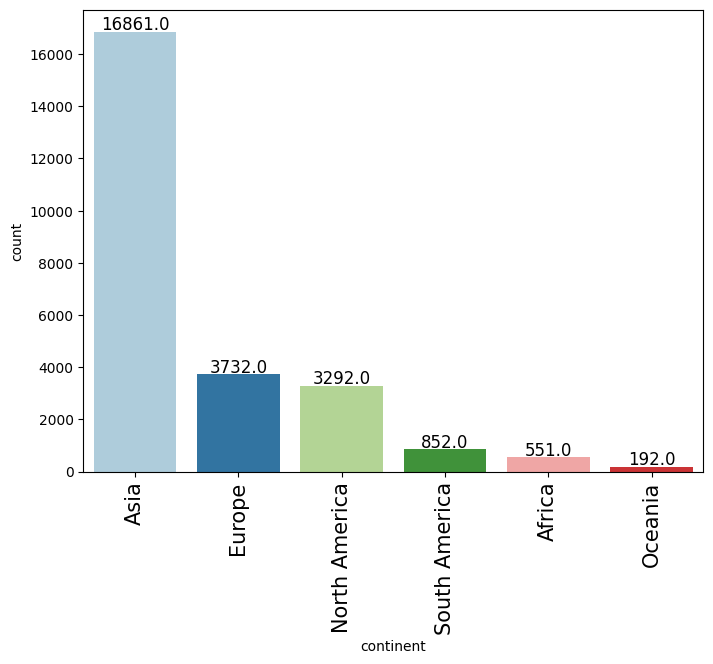

In [ ]:
# create barplot for continent column
labeled_barplot(data, 'continent')

A large majority of foreign workers in the US comes from Asia.

Education of Employee

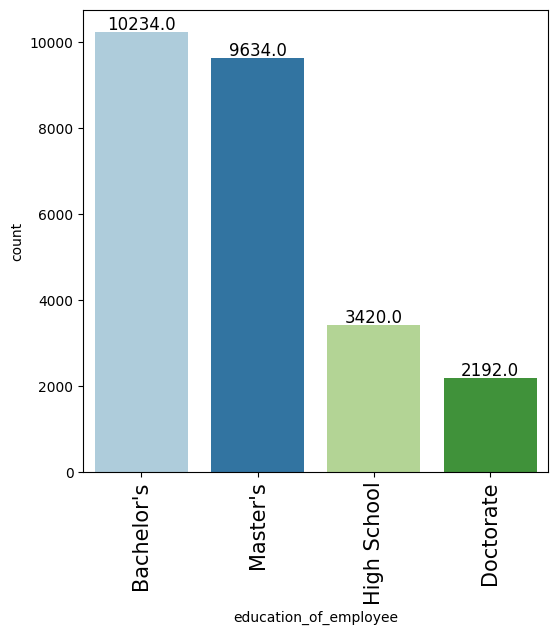

In [ ]:
# create barplot for education of employee column
labeled_barplot(data, 'education_of_employee')

Most foreign employees have either a bachelor's degree of master's degree, which makes sense because this indicates they have more knowledeg and skills which would increase their likelihood of passing the OFLC.

Has Job Experience

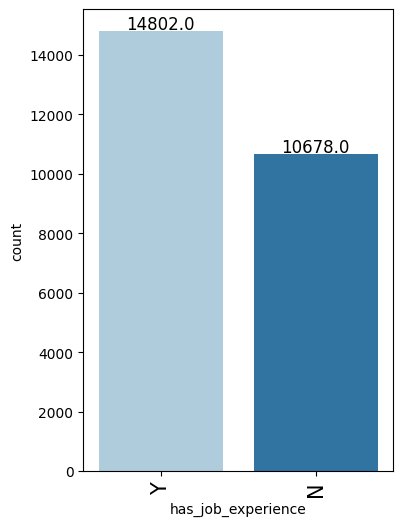

In [ ]:
# create barplot for has job experience column
labeled_barplot(data, 'has_job_experience')

More people were selected with prior job experience, which makes sense, but I would expect the disparity between the two categories to be larger (I expected more of the foreign workers to have job experience) because to pass the OFLC, you must have some skills that is not satisfied by other US workers, which often comes with working experience.

Requires Job Training

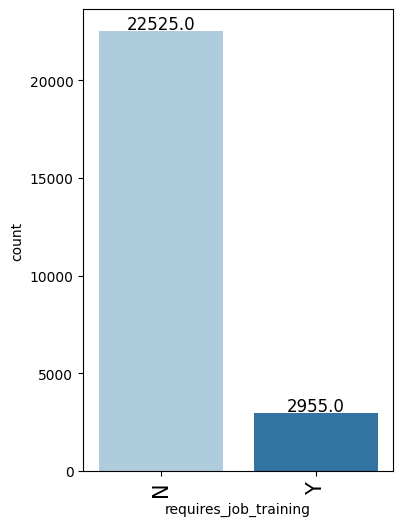

In [ ]:
#create barplot for requires job training column
labeled_barplot(data, 'requires_job_training')

Most foreign employees do not require job training, which makes sense since if they are passing the OFLC, they are likely to already know how to handle the job they are given.

Number of Employees

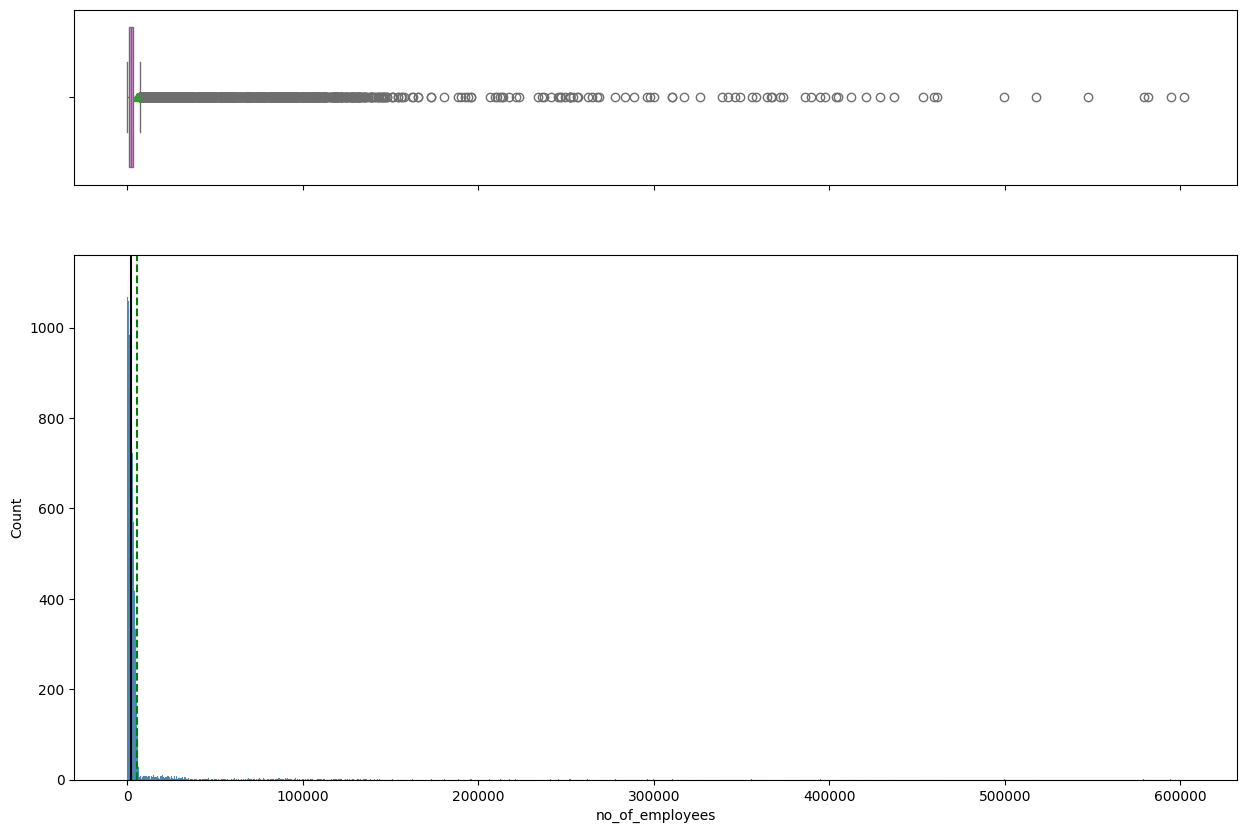

In [ ]:
# create boxplot and histogram for number of employees, since it is numerical data
histogram_boxplot(data, 'no_of_employees')

In [ ]:
# so many outliers, check statistics
data['no_of_employees'].describe()

count     25480.000000
mean       5667.089207
std       22877.917453
min          11.000000
25%        1022.000000
50%        2109.000000
75%        3504.000000
max      602069.000000
Name: no_of_employees, dtype: float64

It looks like the companies who are taking foreign workers typically have around 2000 employees, but there are many outliers in this column, some as high as complanies with 602069 workers.

Year of Establishment

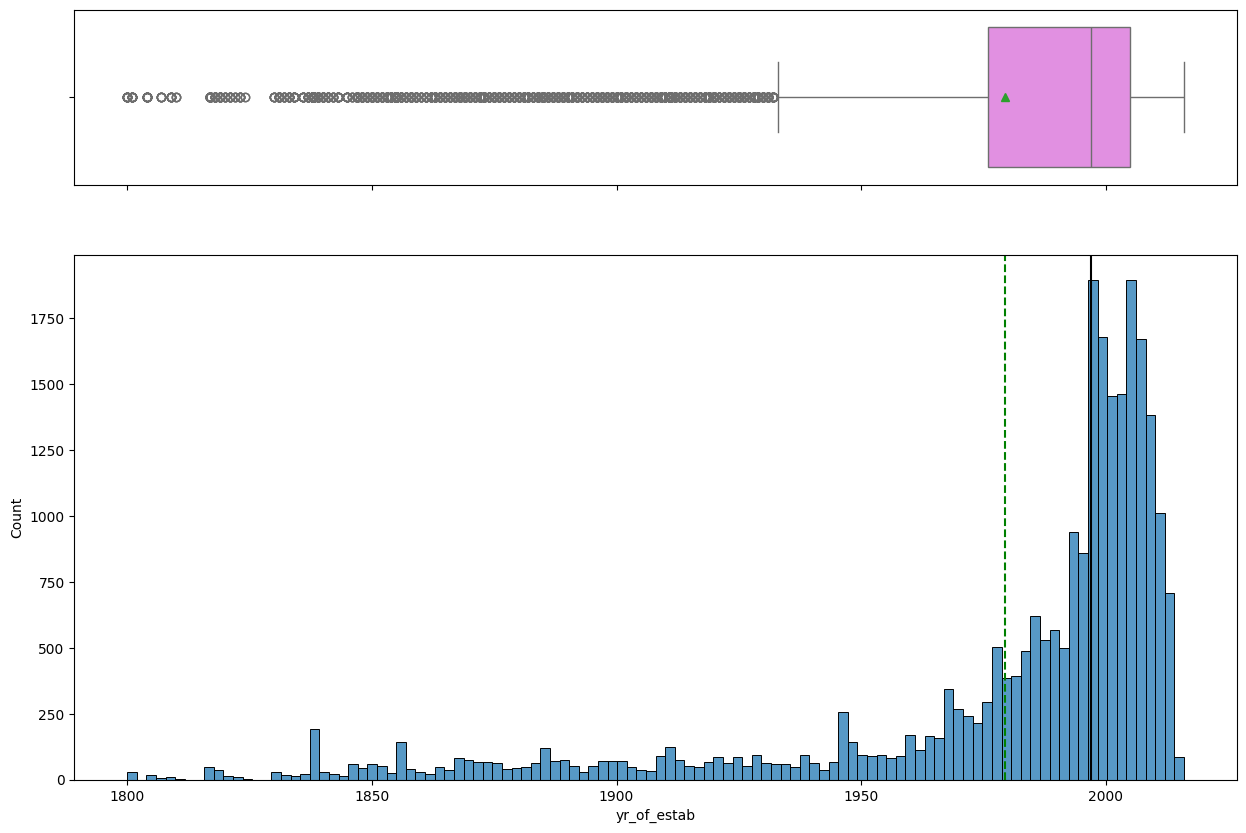

In [ ]:
# create boxplot and histogram for year established column
histogram_boxplot(data, 'yr_of_estab')

In [ ]:
# graphs are good for visualizations, but are semi-unclear, so I will check the exact statistics
data['yr_of_estab'].describe()

count    25480.000000
mean      1979.409929
std         42.366929
min       1800.000000
25%       1976.000000
50%       1997.000000
75%       2005.000000
max       2016.000000
Name: yr_of_estab, dtype: float64

Most companies were established around 1997. The earliest company was established in 1800, and the newest was in 2016. I predict this column will not have much influence in predicting whether or not the employee will get cleared byt the OFLC.

Region of Employment

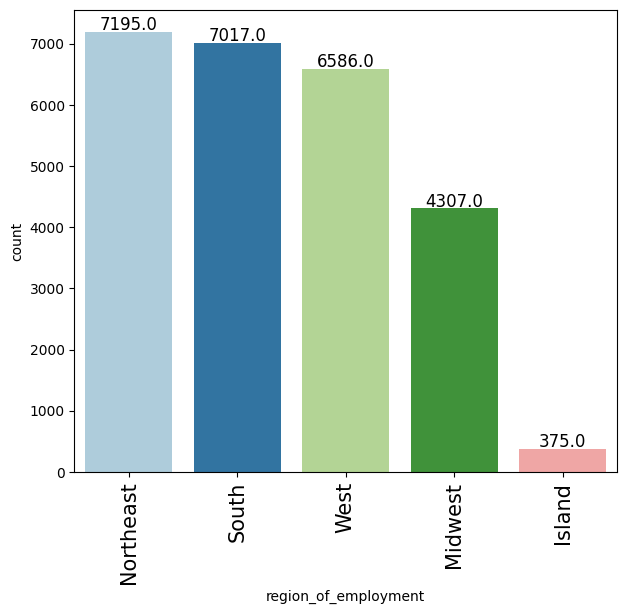

In [ ]:
# create barplot for region of employment since it is a categorical var
labeled_barplot(data, 'region_of_employment')

Most foreign employees are joining a company in the northeast, and the least amount are joining companies on islands. I assume this is not because island companies are less likely to be cleared, but just because the northeast has more concentrated companies; therefore, less data from islands. So, I predict this column will not be a great predictor either.

Prevailing Wage

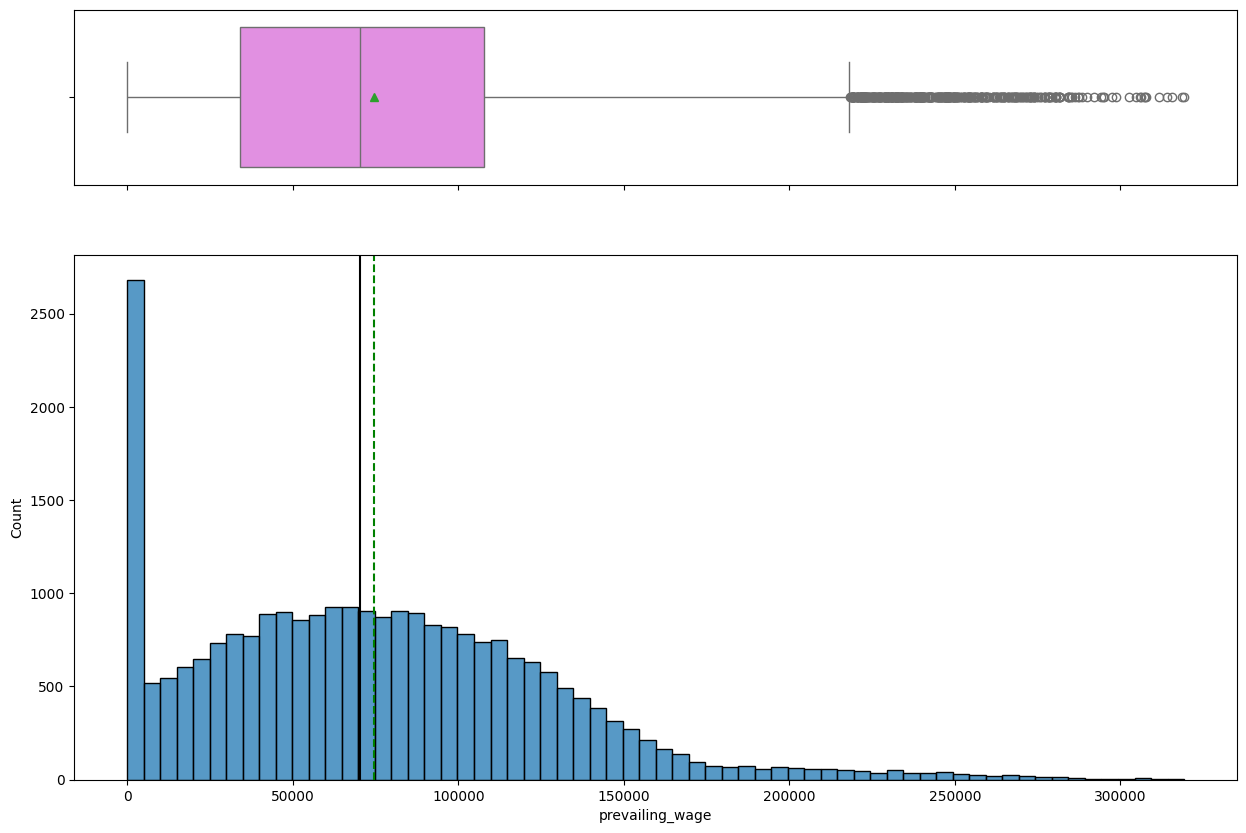

In [ ]:
# create boxplot and histogram for prevailing wage column
histogram_boxplot(data, 'prevailing_wage')

In [ ]:
# check statistics
data['prevailing_wage'].describe()

count     25480.000000
mean      74455.814592
std       52815.942327
min           2.136700
25%       34015.480000
50%       70308.210000
75%      107735.512500
max      319210.270000
Name: prevailing_wage, dtype: float64

This column shows the average wage paid to similarly employed workers in a specific occupation in the area of intended employment. It looks like the wages for the type of job being filled by foreign workers is relatively low, with the median lying at 70308. This could end up being an important var.

Unit of Wage

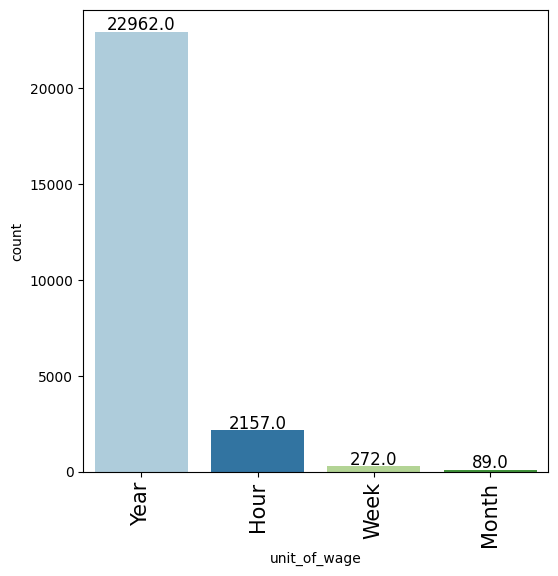

In [ ]:
# create barplot for unit of wage
labeled_barplot(data, 'unit_of_wage')

Most jobs recruiting foreign workers are paying yearly wages.

Full Time Position

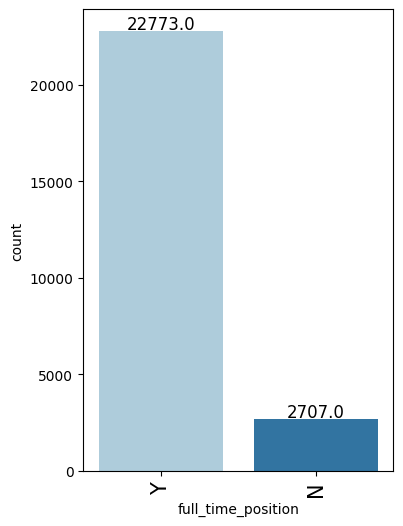

In [ ]:
# create barplot for full time position col
labeled_barplot(data, 'full_time_position')

Most positions recruiting foreign workers are full-time, which is expected because going through this process is a lot of work, so I would expect most people involved to do it for a full-time position.

Case Status

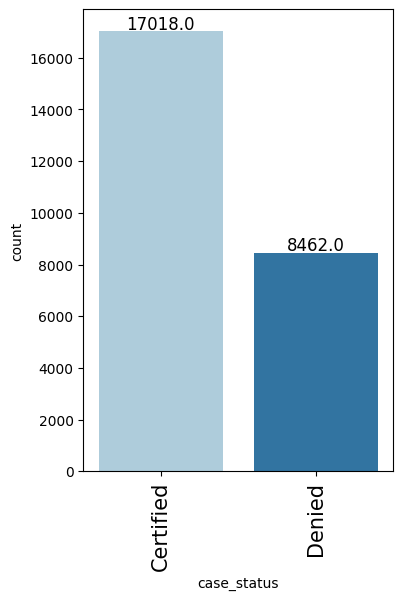

In [ ]:
# create barplot for case status column
labeled_barplot(data, 'case_status')

In [ ]:
# Check statistics, because I want to see these results normalized
data['case_status'].value_counts(normalize=True)

case_status
Certified    0.667896
Denied       0.332104
Name: proportion, dtype: float64

About 2/3 of cases submited were certified.

### Bivariate Data Analysis

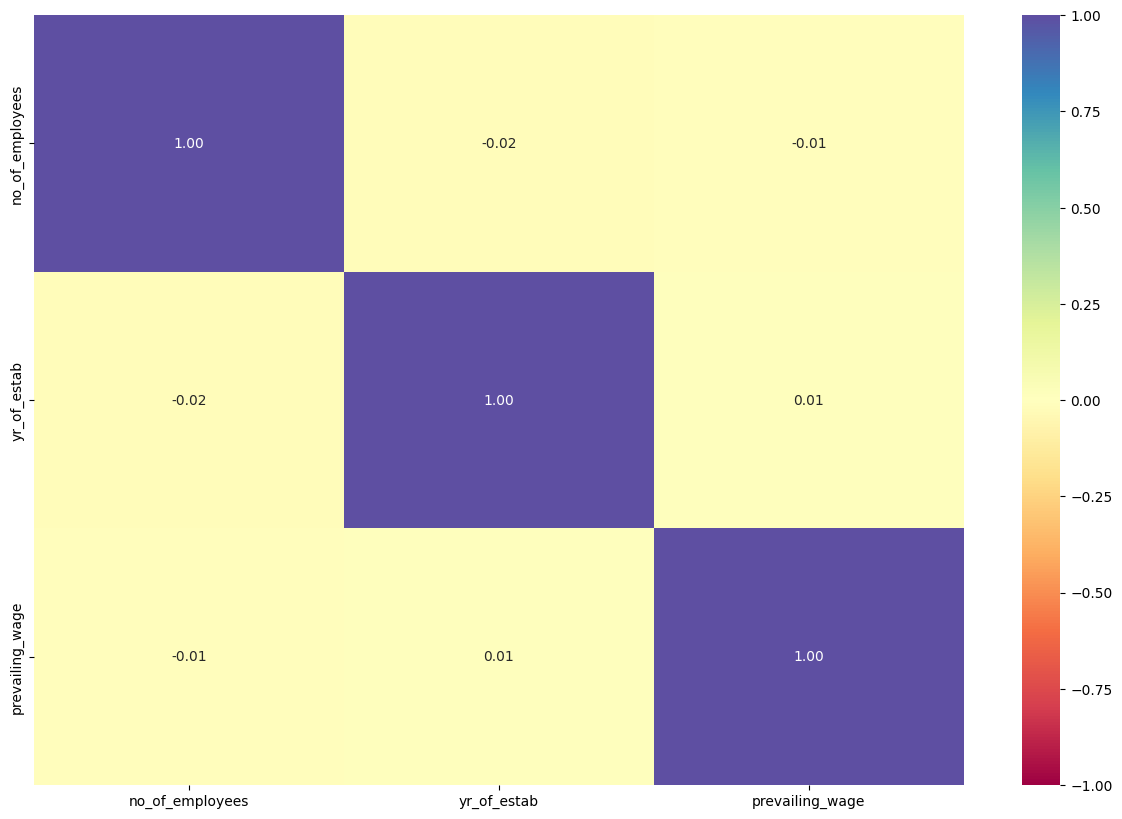

In [ ]:
# create heatmap to see corr bw all vars

num_vars = ['no_of_employees', 'yr_of_estab', 'prevailing_wage']

plt.figure(figsize=(15, 10))
sns.heatmap(data[num_vars].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

No significant correlations between any of the numerical variables.

In [ ]:
# define same function as always to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# define same function as always to create barplot with set categories within each bar

def stacked_barplot(data, predictor, target):

    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

Continent vs Education of Employee

education_of_employee  Bachelor's  Doctorate  High School  Master's    All
continent                                                                 
All                         10234       2192         3420      9634  25480
Asia                         7168        923         2290      6480  16861
Europe                       1299        846          490      1097   3732
North America                1225        258          401      1408   3292
South America                 333         89          137       293    852
Africa                        143         54           66       288    551
Oceania                        66         22           36        68    192
------------------------------------------------------------------------------------------------------------------------


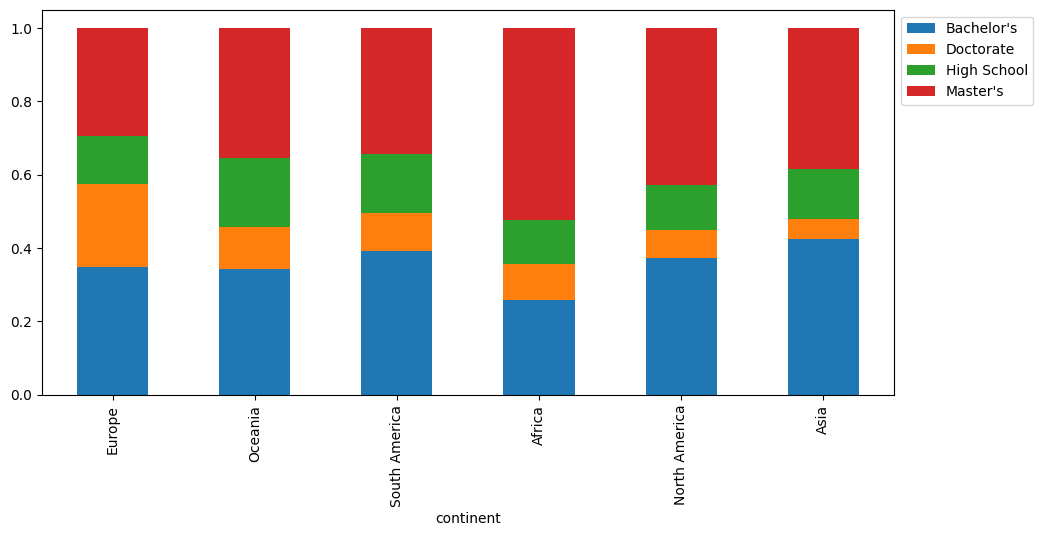

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "continent", "education_of_employee")

Not too drastic differences of level of education accross continents. Employees from Africa do tend to have more Master's degrees than employees hired from other countries.

Continent vs Has Job Experience

has_job_experience      N      Y    All
continent                              
All                 10678  14802  25480
Asia                 7071   9790  16861
Europe               1576   2156   3732
North America        1348   1944   3292
South America         377    475    852
Africa                217    334    551
Oceania                89    103    192
------------------------------------------------------------------------------------------------------------------------


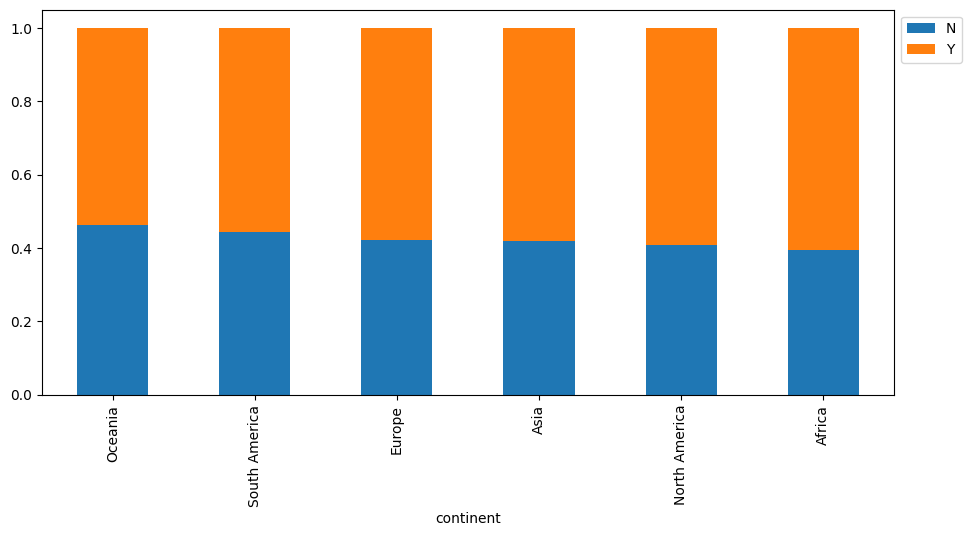

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "continent", "has_job_experience")

Again, pretty similar distribution across continents.

Continent vs Requires Job Training

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------


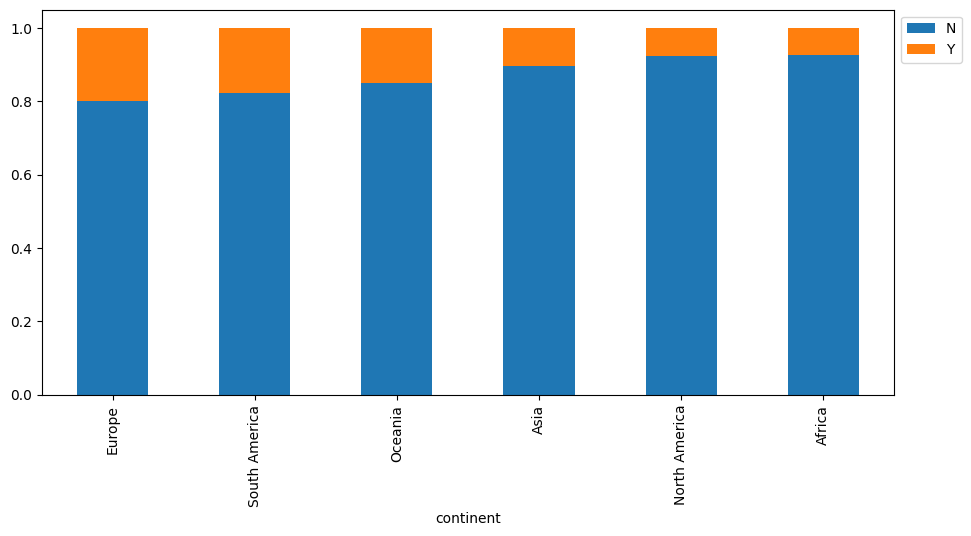

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "continent", "requires_job_training")

Again, a pretty even distribution of employees that require job training across continents, but employees from Africa tend to less often require job training, and employees from Europe tend to be most likely to require job training.

Continent vs number of employees

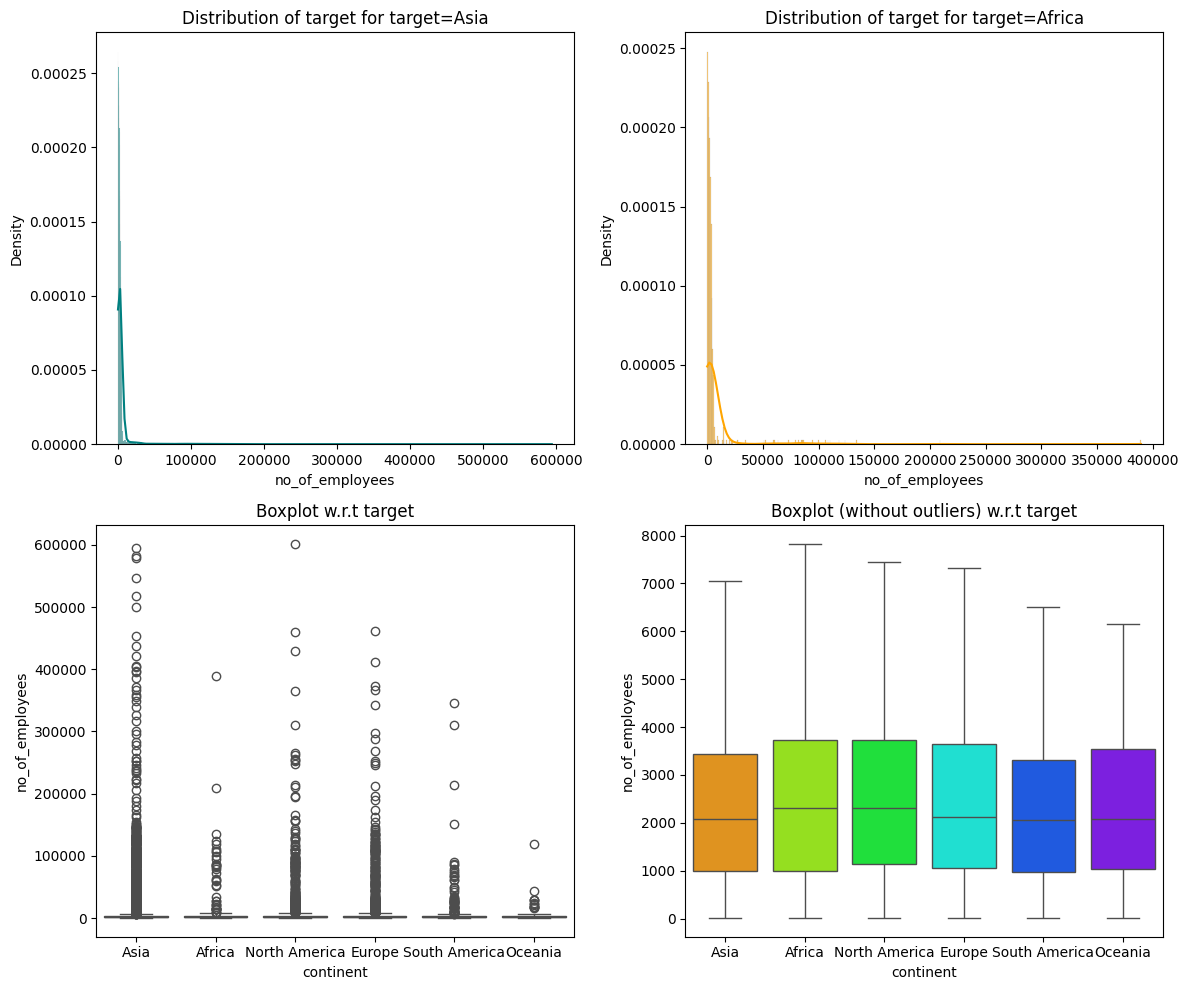

In [ ]:
# call on distribution plot funtion since this is a cat var and num var
distribution_plot_wrt_target(data, "no_of_employees", "continent")

Distribution for both Asia and Africa is right-skewed, meaning a small number of employees hired from these continents is very common in this dataset, but there are cases of large numbers of employees are hired from that continent. The boxplots show a preety similar median, 25th and 75th percentile of employees from each continent, but the boxplots with outliers show there are many extreme high outliers for Asia.

Continent vs year of establishment

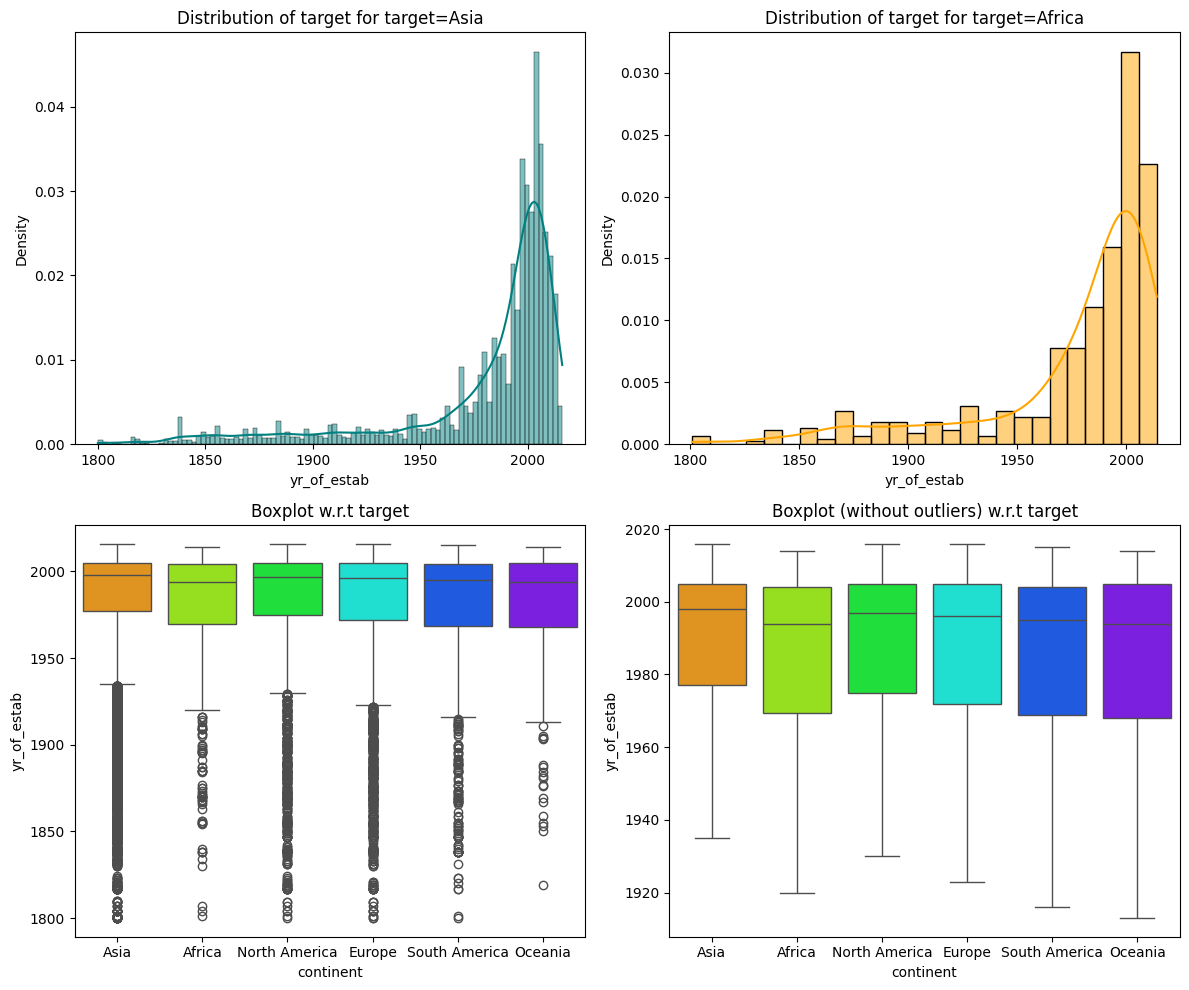

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "continent")

Most commonly, companies established around the 2000s were employing people from other countries. However, many outliers in the boxplot show there were many cases of foreign employees for companies as old as 1800.

Continent vs Region of Employment

region_of_employment  Island  Midwest  Northeast  South  West    All
continent                                                           
All                      375     4307       7195   7017  6586  25480
Asia                     226     3371       4589   4805  3870  16861
North America             82      392       1114    870   834   3292
Europe                    32      303        965    973  1459   3732
South America             23      111        266    223   229    852
Africa                     8       92        212    102   137    551
Oceania                    4       38         49     44    57    192
------------------------------------------------------------------------------------------------------------------------


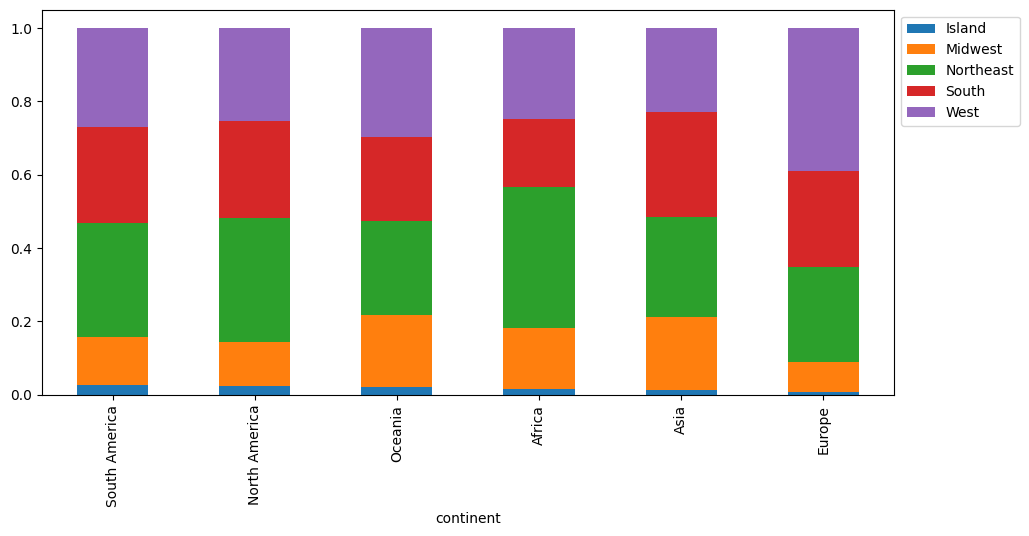

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "continent", "region_of_employment")

Graoh shows pretty similar distribution across continents. European employees may be slightly more likkley to be employed in the west, and less likley in midwest.

Continent vs Prevailing Wage

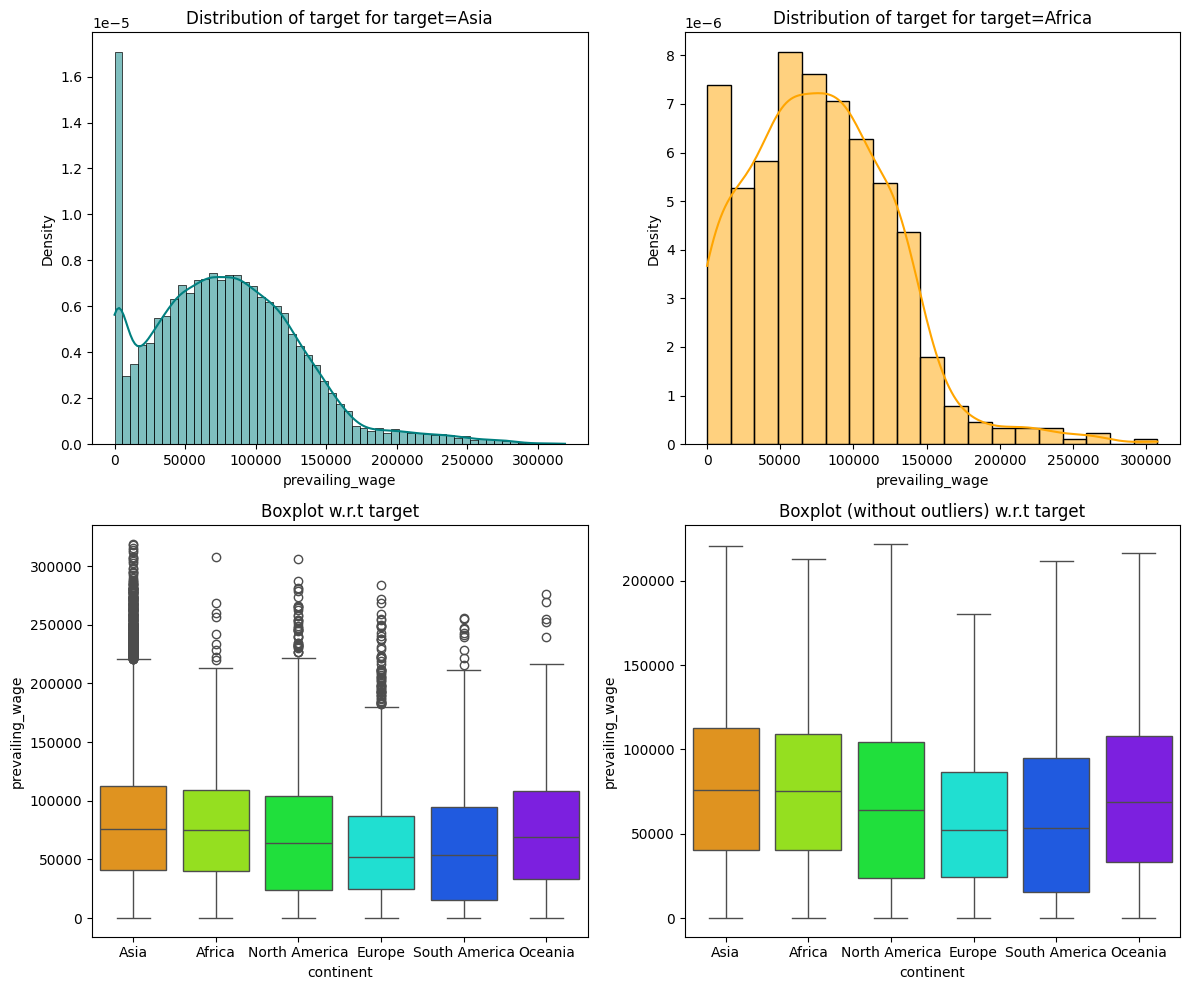

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "continent")

Prevailing wage does not follow a normal distribution, as the positions being filled by foreign employees are most commonly lower-paying jobs; However, after this spike at the beginning the graph begins to follow a more normal distribution, with a central tendency around 70k.

Continent vs Unit of Wage

unit_of_wage   Hour  Month  Week   Year    All
continent                                     
All            2157     89   272  22962  25480
Asia           1311     58   154  15338  16861
North America   495     17    75   2705   3292
Europe          140      7    17   3568   3732
Africa           36      3     8    504    551
Oceania          18      2     4    168    192
South America   157      2    14    679    852
------------------------------------------------------------------------------------------------------------------------


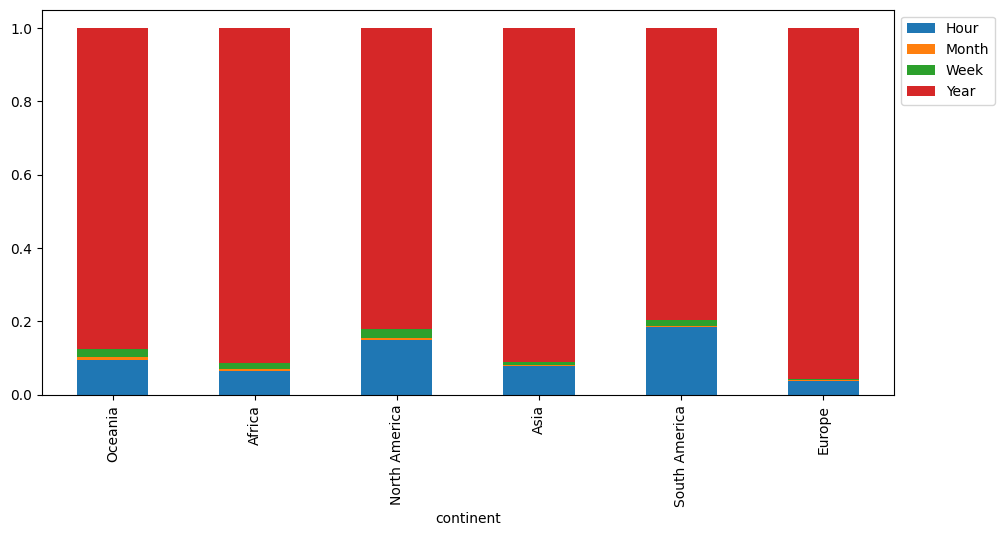

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "continent", "unit_of_wage")

European employees are more likley to be employed in positions with a yearly wage. South American employees are still more likley to be employed for positions with yearly wage, but they are the most likley employees to be payed hourly (very similar distribution to North America).

Continent vs Full Time Position

full_time_position     N      Y    All
continent                             
All                 2707  22773  25480
Asia                1941  14920  16861
North America        571   2721   3292
Europe               115   3617   3732
Africa                31    520    551
South America         31    821    852
Oceania               18    174    192
------------------------------------------------------------------------------------------------------------------------


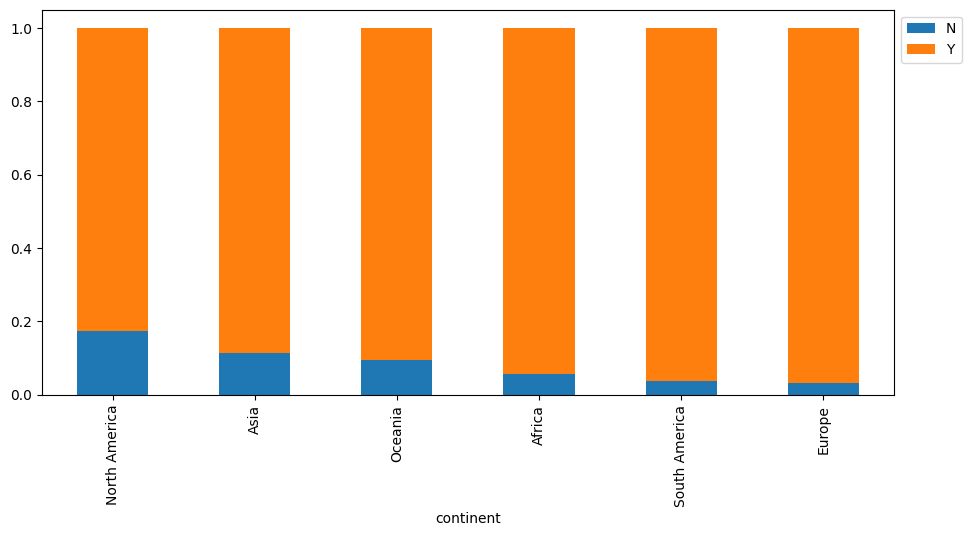

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "continent", "full_time_position")

North Americans are the least likely to be employes for a full-time position, which makes sense because people from other countries are less likley to move to another continent for a part-time position.

Continet vs Case Status

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


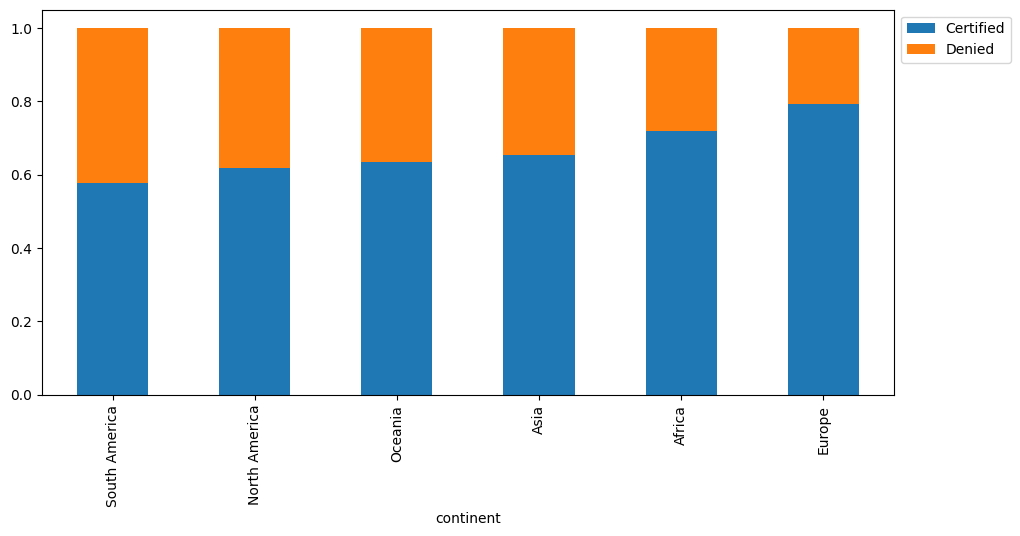

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "continent", "case_status")

Empployees from South America are the least likely to be certified, and European employees are the most likley to be certified.

Education of Employee vs Has Job Experience

has_job_experience         N      Y    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
------------------------------------------------------------------------------------------------------------------------


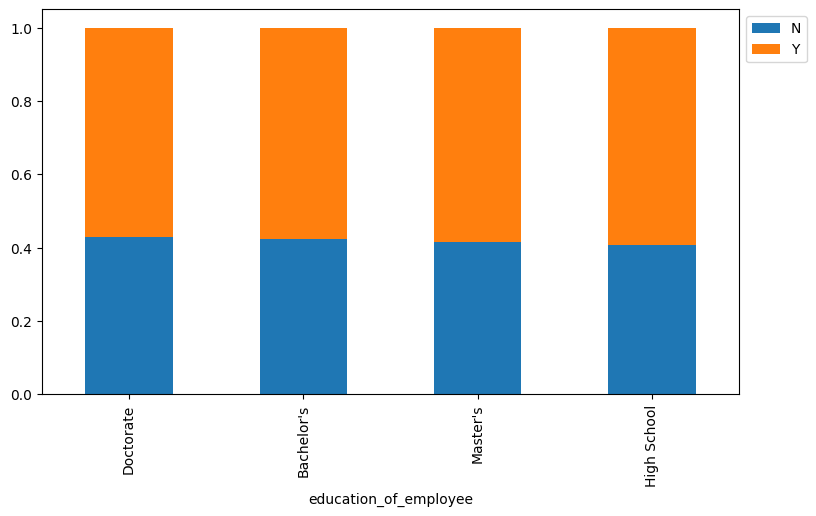

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "education_of_employee", "has_job_experience")

Whether or not the employee has job experience does not seem to have a relationship with their degree.

Education of Employee vs Requires Job Training

requires_job_training      N     Y    All
education_of_employee                    
All                    22525  2955  25480
Bachelor's              8971  1263  10234
Master's                8786   848   9634
High School             2990   430   3420
Doctorate               1778   414   2192
------------------------------------------------------------------------------------------------------------------------


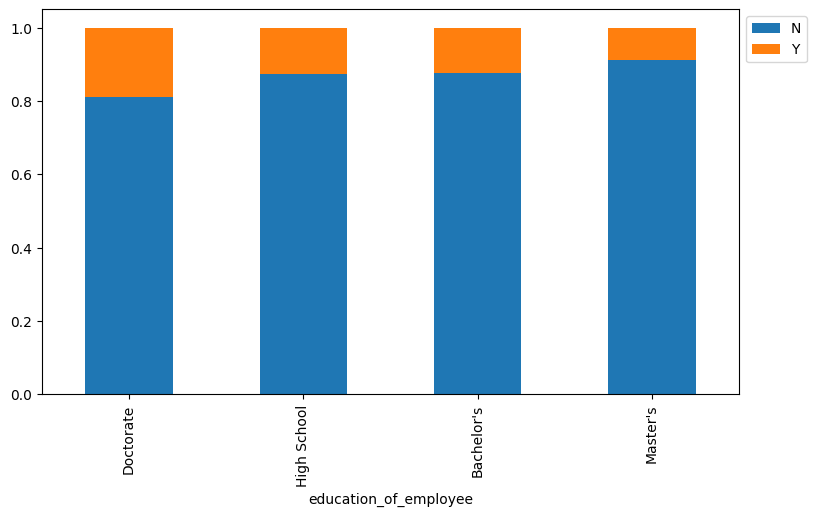

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "education_of_employee", "requires_job_training")

People with Master's are less likely to require job training, while people with Doctorate's are more likley to require training. This could be due to people with a higher degree being hired for more complex jobs that require more training.

Education of Employee vs Number of Employees

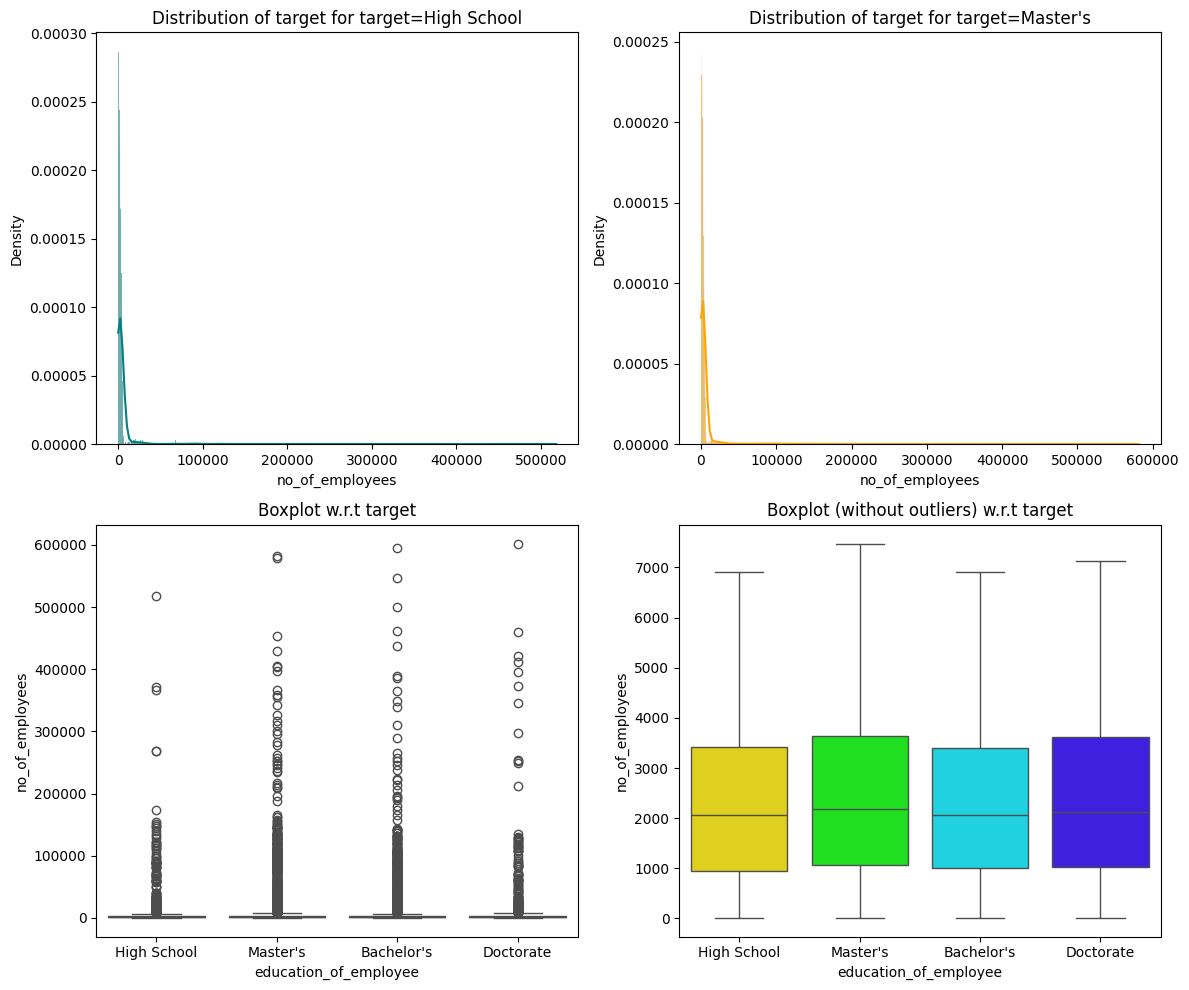

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "no_of_employees", "education_of_employee")

There seems to be not much of a relationship here. If anything, people with a Master's may be slightly more likely to be hired to a company with more employees.

Education of Employee vs Year of Establishment

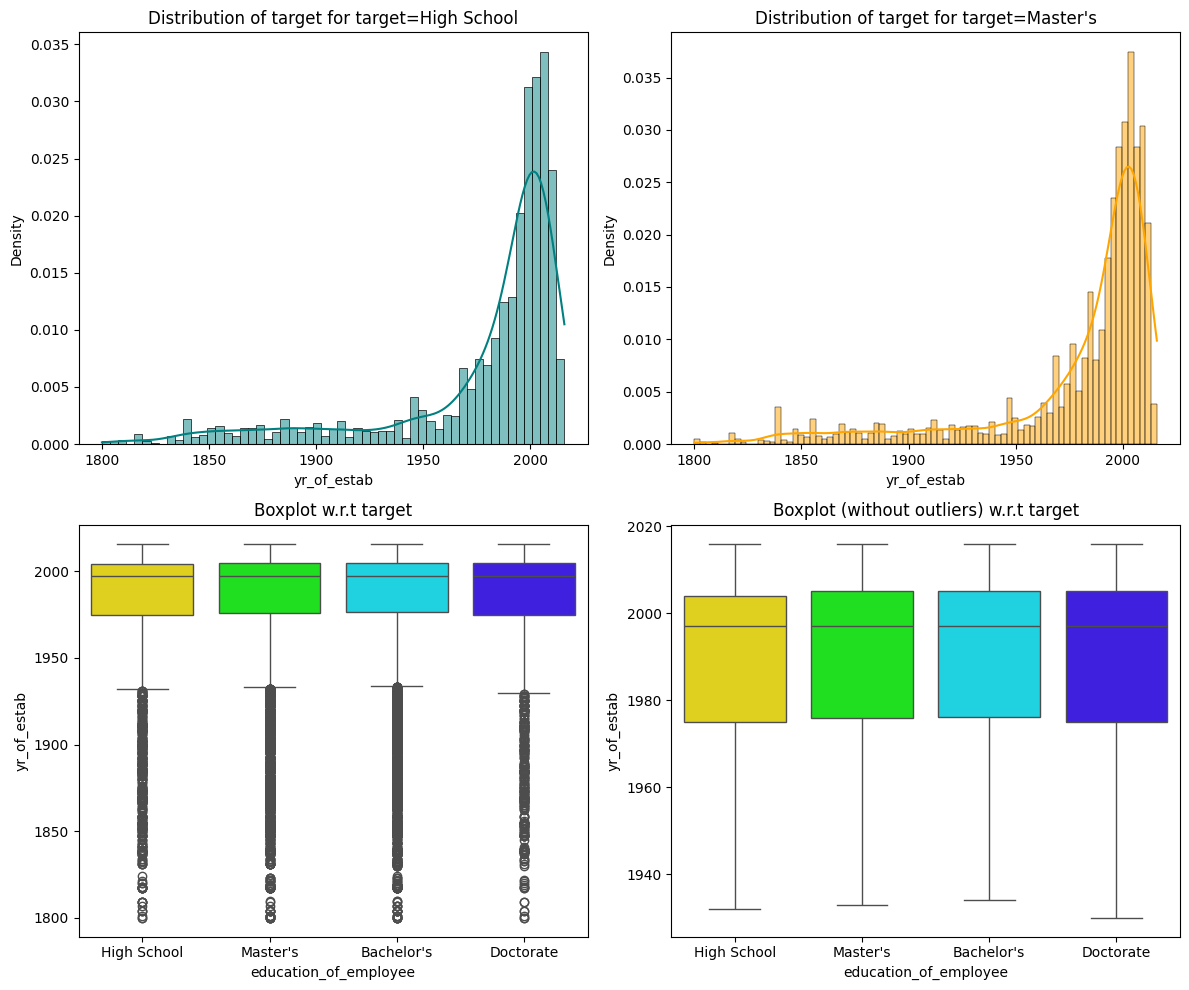

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "education_of_employee")

No clear relationship.

Education of Employee vs Region of Employment

region_of_employment   Island  Midwest  Northeast  South  West    All
education_of_employee                                                
All                       375     4307       7195   7017  6586  25480
Master's                  161     2000       2760   2551  2162   9634
Bachelor's                129     1315       2874   2991  2925  10234
High School                60      736        905    934   785   3420
Doctorate                  25      256        656    541   714   2192
------------------------------------------------------------------------------------------------------------------------


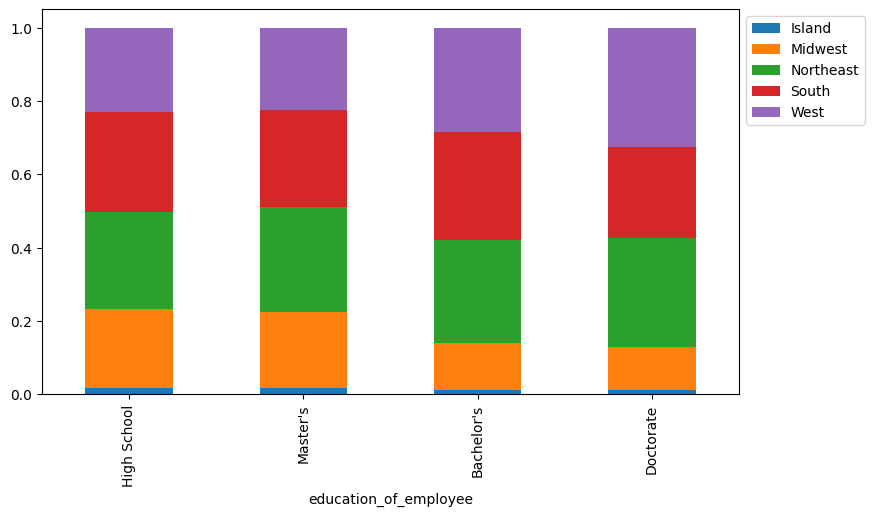

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "education_of_employee", "region_of_employment")

Slight variation, but no clear relationship.

Education of Employee vs Prevailing Wage

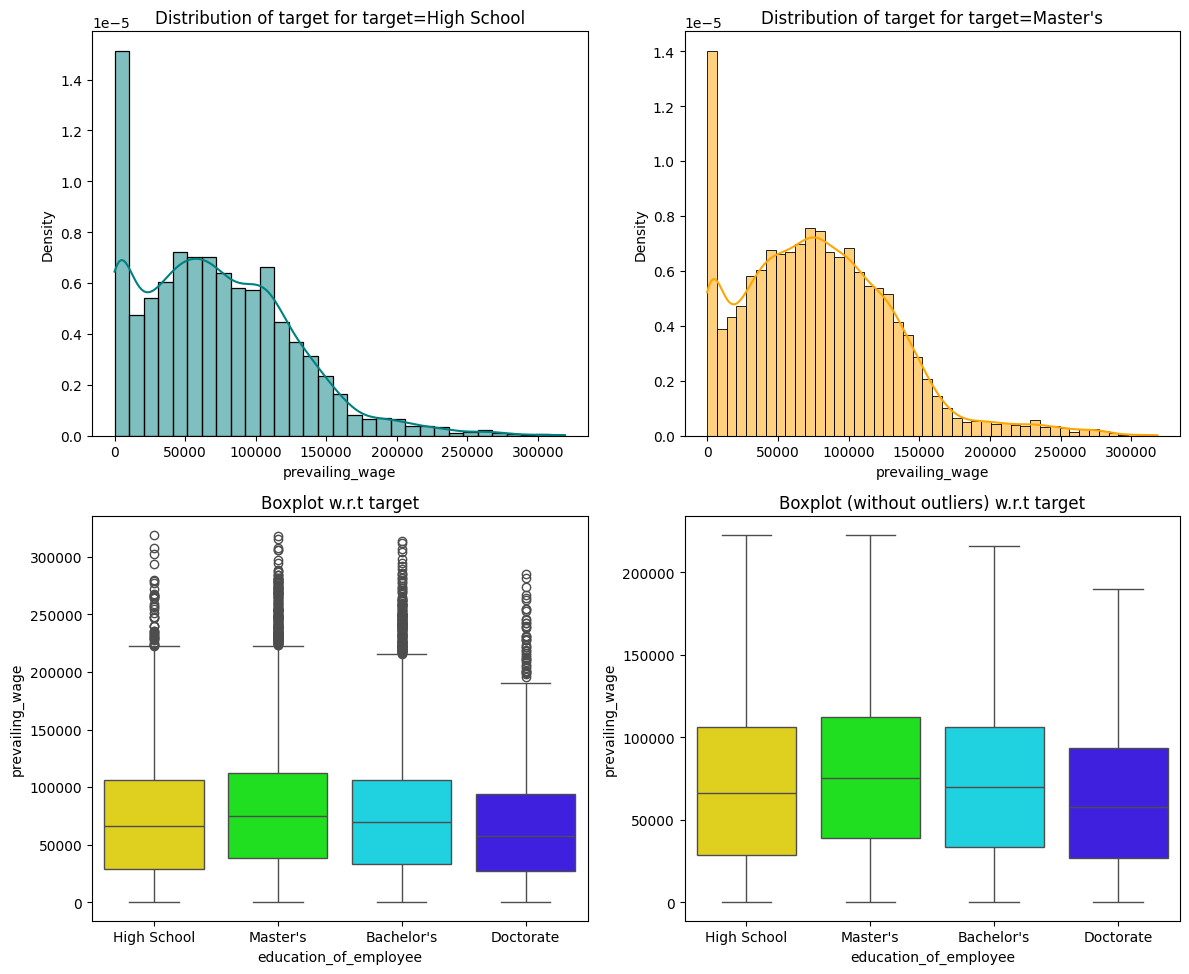

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "education_of_employee")

People with Master's are more likely to be hired to positions with higher prevailing wage than people with Doctorates. This is surprising.

Education of Employee vs Unit of Wage


unit_of_wage           Hour  Month  Week   Year    All
education_of_employee                                 
All                    2157     89   272  22962  25480
Bachelor's              981     41   126   9086  10234
Master's                685     30   106   8813   9634
High School             395     13    32   2980   3420
Doctorate                96      5     8   2083   2192
------------------------------------------------------------------------------------------------------------------------


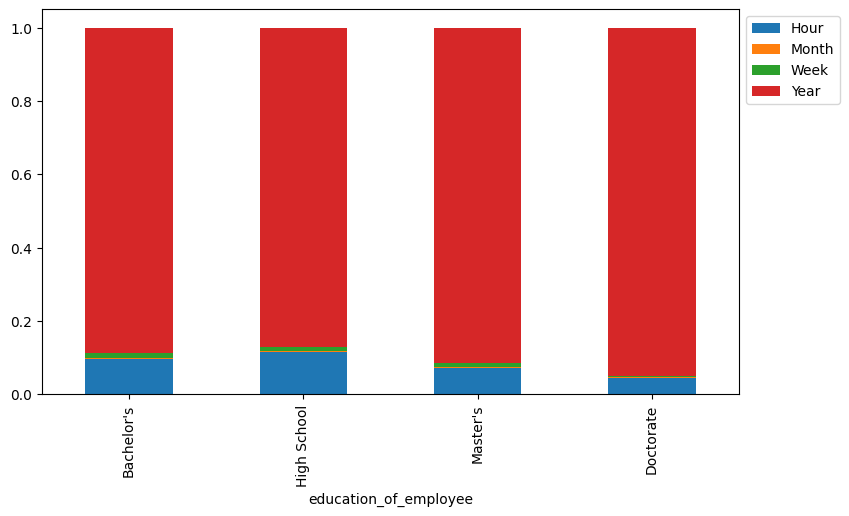

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "education_of_employee", "unit_of_wage")

People with Doctorate degrees are less likley to be hired to jobs with an hourly wage, which makes sense.

Education of Employee vs Full Time Position

full_time_position        N      Y    All
education_of_employee                    
All                    2707  22773  25480
Master's               1738   7896   9634
Bachelor's              683   9551  10234
High School             206   3214   3420
Doctorate                80   2112   2192
------------------------------------------------------------------------------------------------------------------------


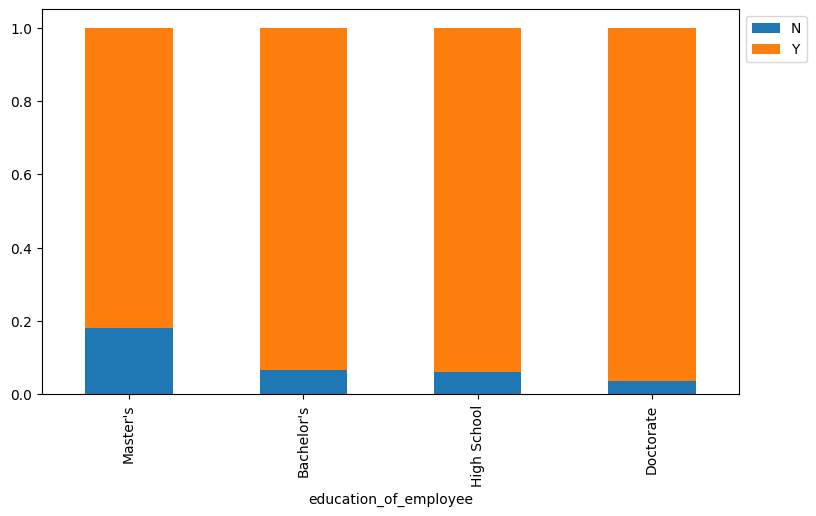

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "education_of_employee", "full_time_position")

People with Doctorate degrees are more liekly to be hired for full time positions, which makes sense. However, people with Master's are the most likley group to be hired for part-time positions, which is surprising. These could include research positions in the US, though.

Education of Employee vs Case Status

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


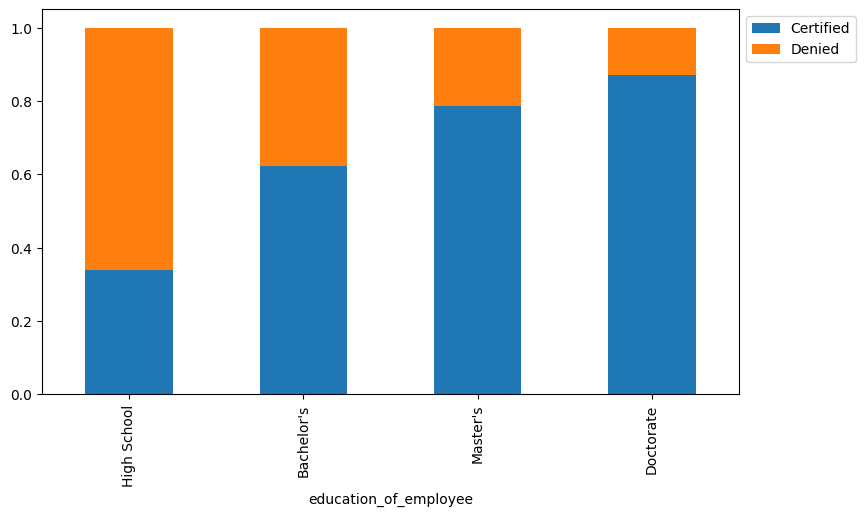

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "education_of_employee", "case_status")

People with only a Highschool degree are much more likely to be denied, and the higher level of the degree, the more likely the employee is to be certified.

Has Job Experience vs Requires Job Training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


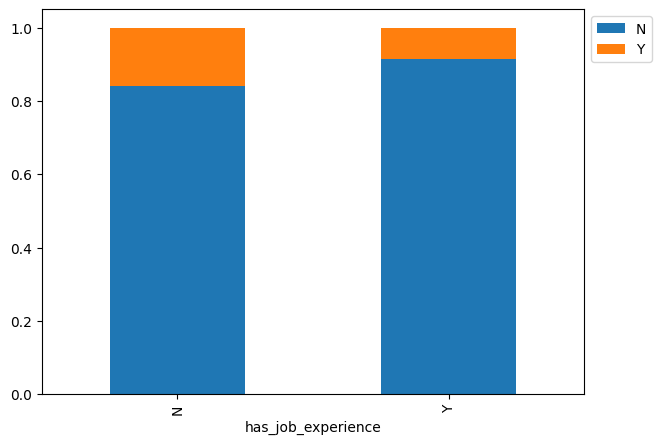

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "has_job_experience", "requires_job_training")

If the employee had previous job experience, they are less likley to need job training.

Has Job Experience vs Number of Employees

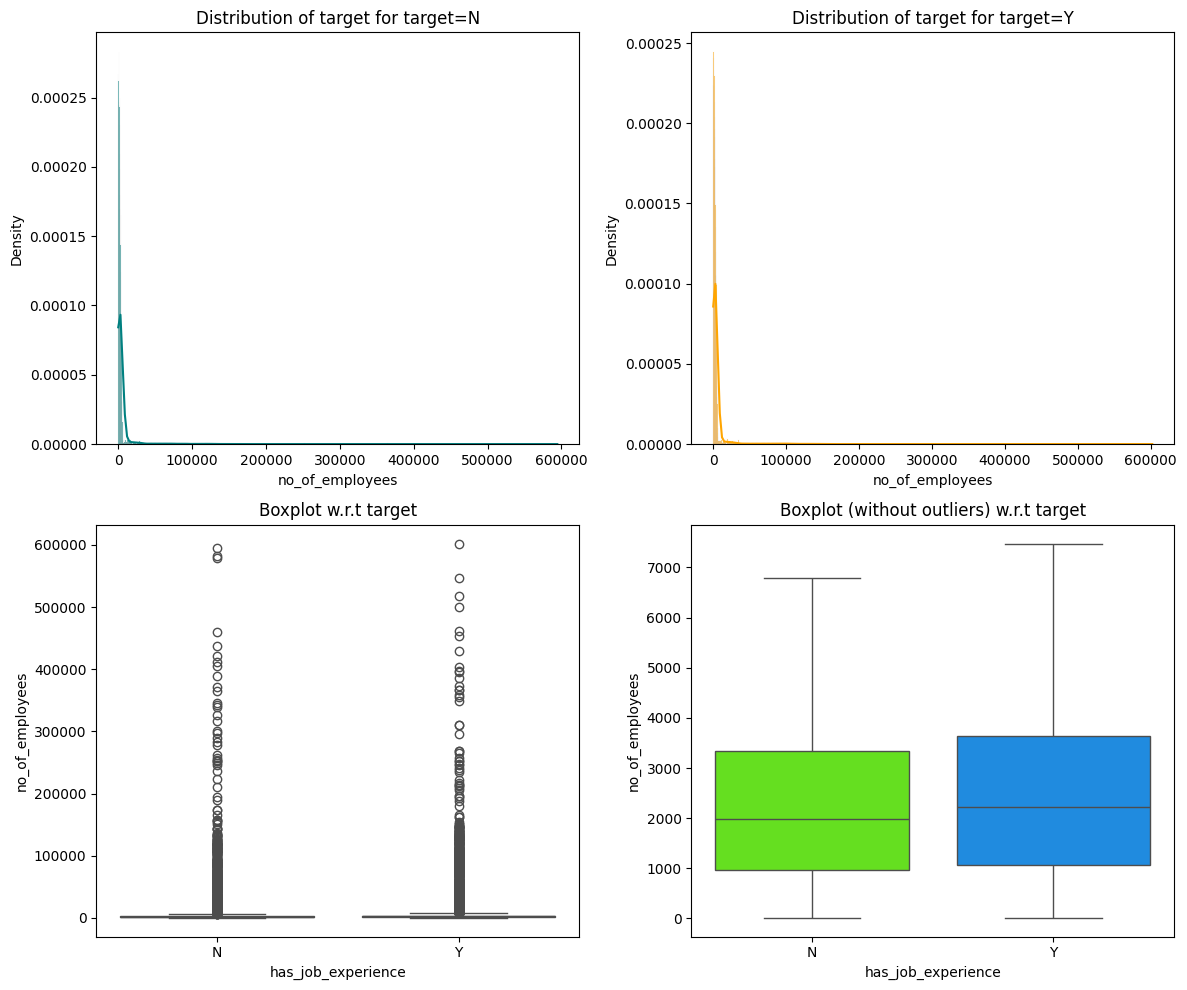

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "no_of_employees", "has_job_experience")

The histograms of employees who do not have job experience and those who do are pretty similar.

Has Job Experience vs Year of Establishment

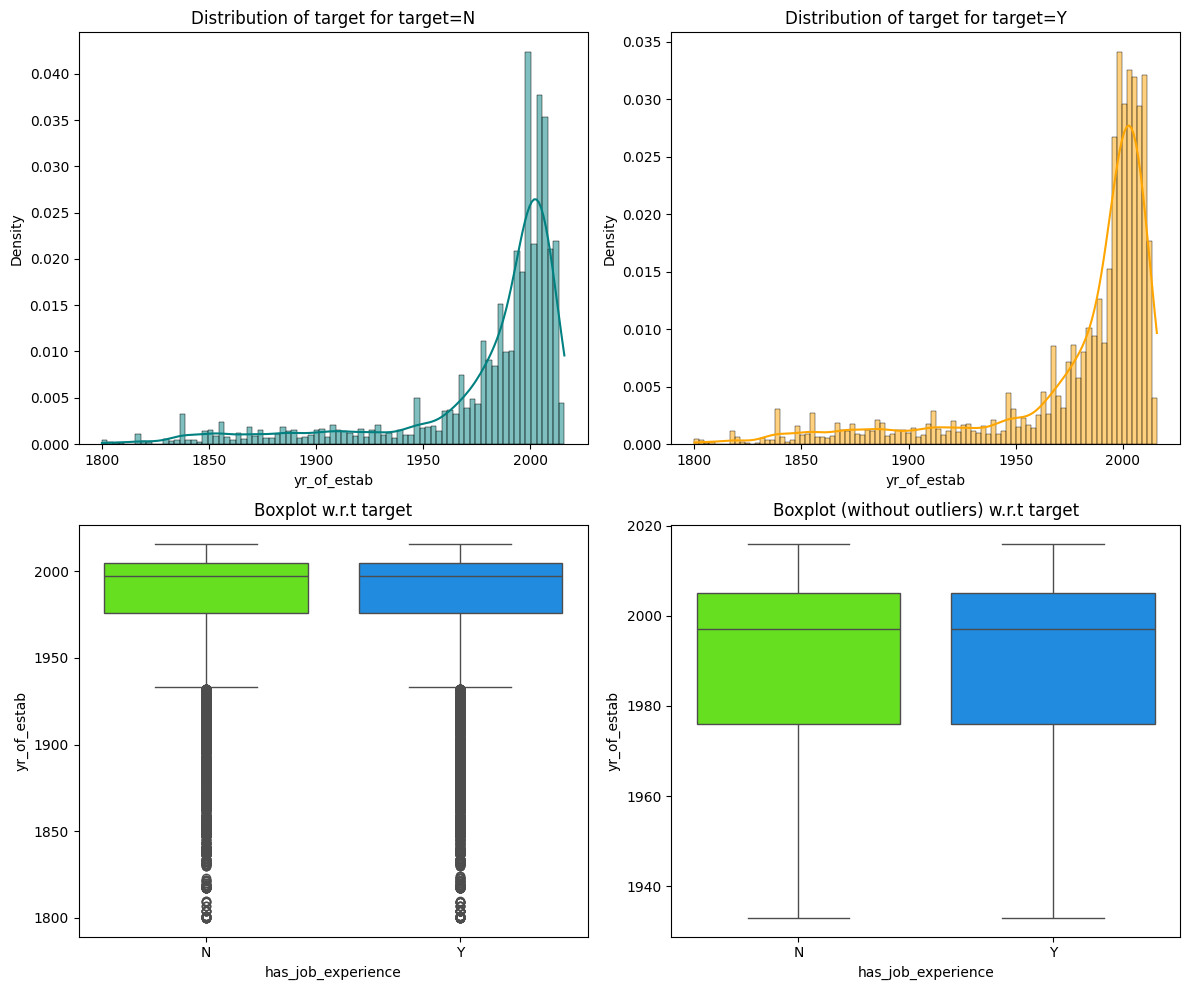

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "has_job_experience")

Similar graphs between employees with and without prior job experience.

Has Job Experience vs Region of Employment

region_of_employment  Island  Midwest  Northeast  South  West    All
has_job_experience                                                  
All                      375     4307       7195   7017  6586  25480
Y                        220     2343       4261   4097  3881  14802
N                        155     1964       2934   2920  2705  10678
------------------------------------------------------------------------------------------------------------------------


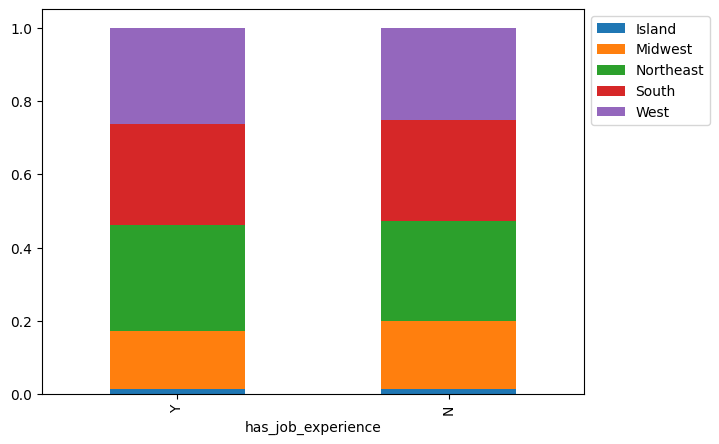

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "has_job_experience", "region_of_employment")

Very similar graphs. No signifant difference visually.

Has Job Experience vs Prevailing Wage

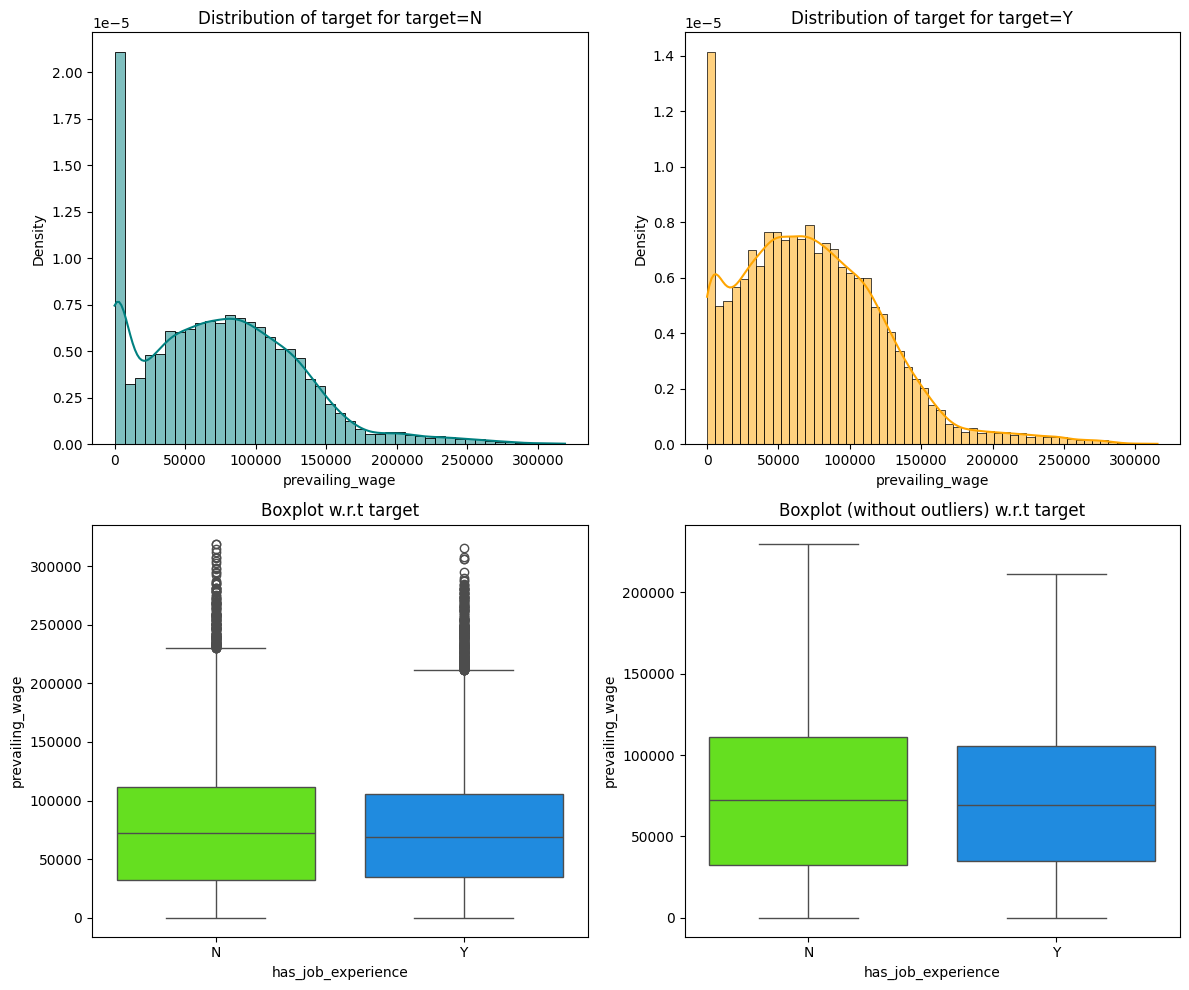

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "has_job_experience")

People with no previous job experience are slighlty more likely to be hired to a position with a higher prevailing wage. This is counterintuitive.

Has Job Experience vs Unit of Wage

unit_of_wage        Hour  Month  Week   Year    All
has_job_experience                                 
All                 2157     89   272  22962  25480
Y                    792     57   199  13754  14802
N                   1365     32    73   9208  10678
------------------------------------------------------------------------------------------------------------------------


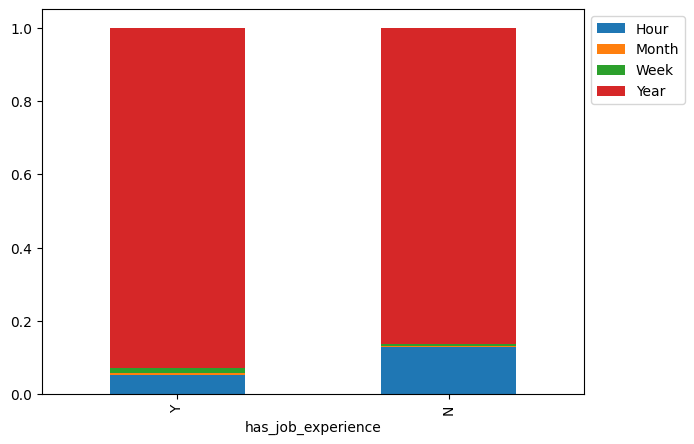

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "has_job_experience", "unit_of_wage")

People with no job experience are more likley to be paid an hourly wage, which makes sense because these tend to be more minimum wage jobs, which you have to be less qualified to do.

Has Job Experience vs Full Time Position

full_time_position     N      Y    All
has_job_experience                    
All                 2707  22773  25480
Y                   1410  13392  14802
N                   1297   9381  10678
------------------------------------------------------------------------------------------------------------------------


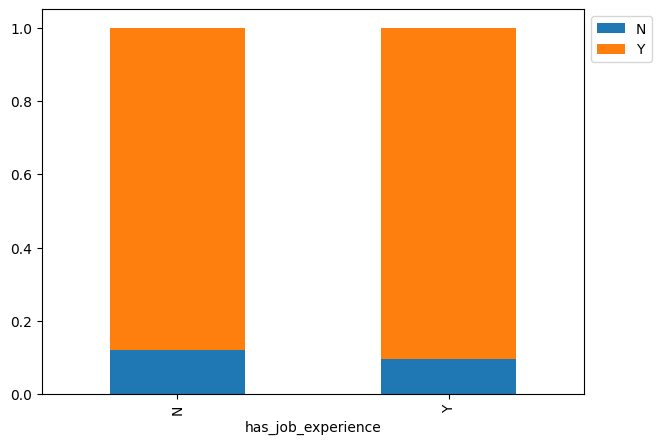

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "has_job_experience", "full_time_position")

People with prior job experience are more likely to receive a full time position, which makes sense.

Has Job Experience vs Case Status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


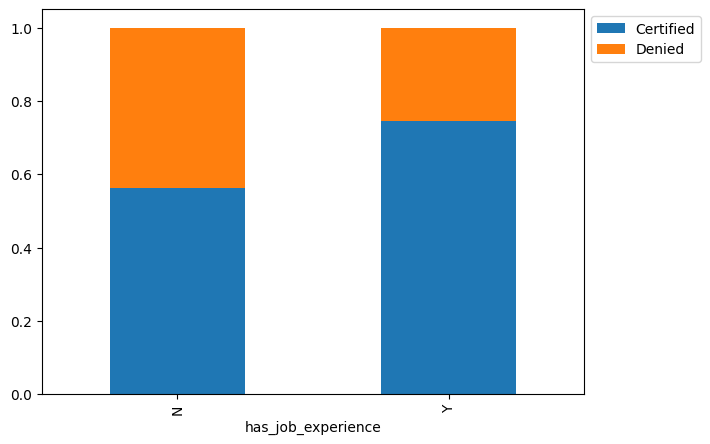

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "has_job_experience", "case_status")

People with job experience are more likley to be certified. This makes sense because prior job experience is indicative of being more qualified, and more likely to have skills or knowledge, making it advantageous to hire outside of the country.

Requires Job Training vs Number of Employees

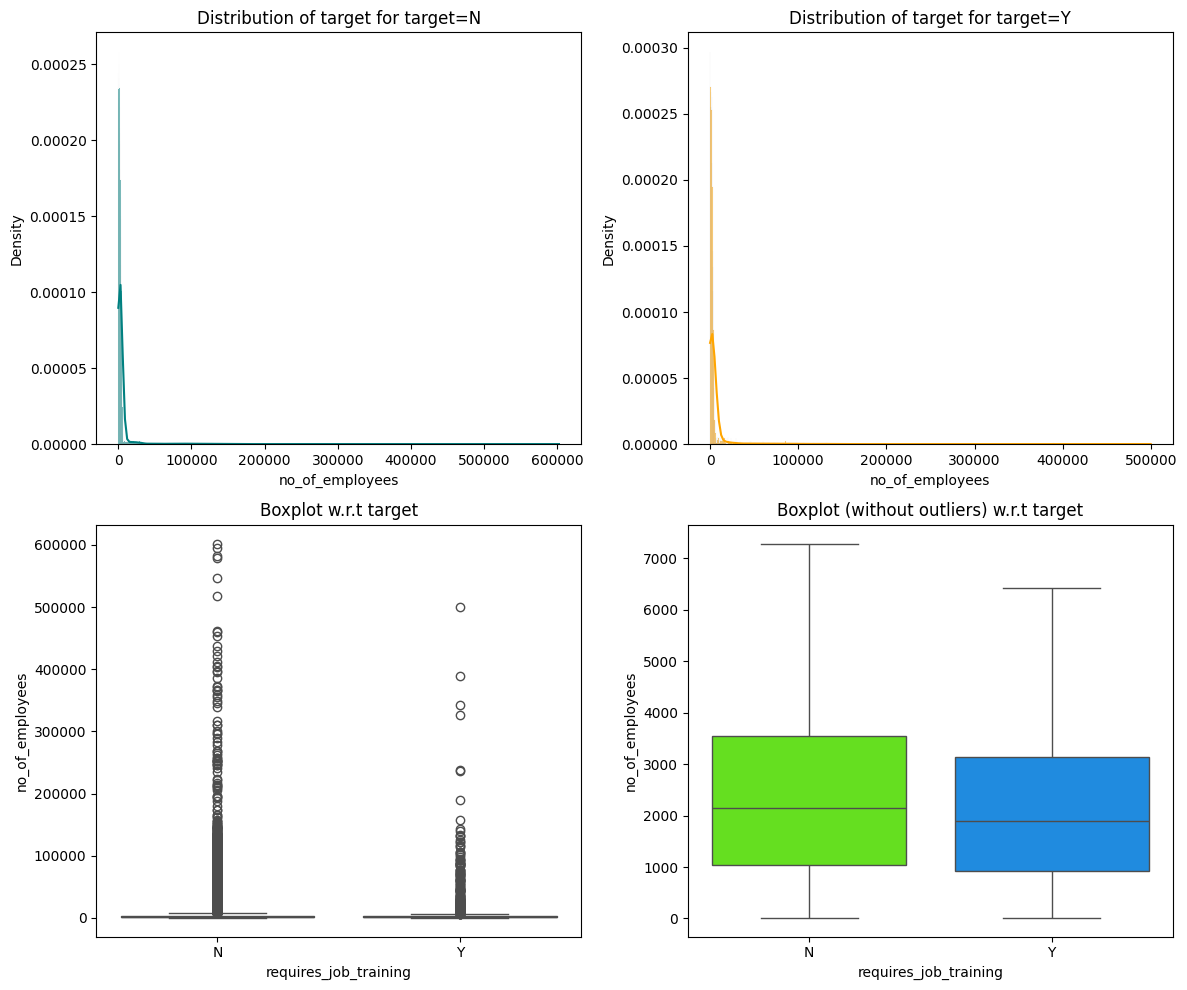

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "no_of_employees", "requires_job_training")

It looks like employees who do not require job training tend to be hired to companies with a greater number of employees than employees who do require job training.

Requires Job Training vs Year of Establish

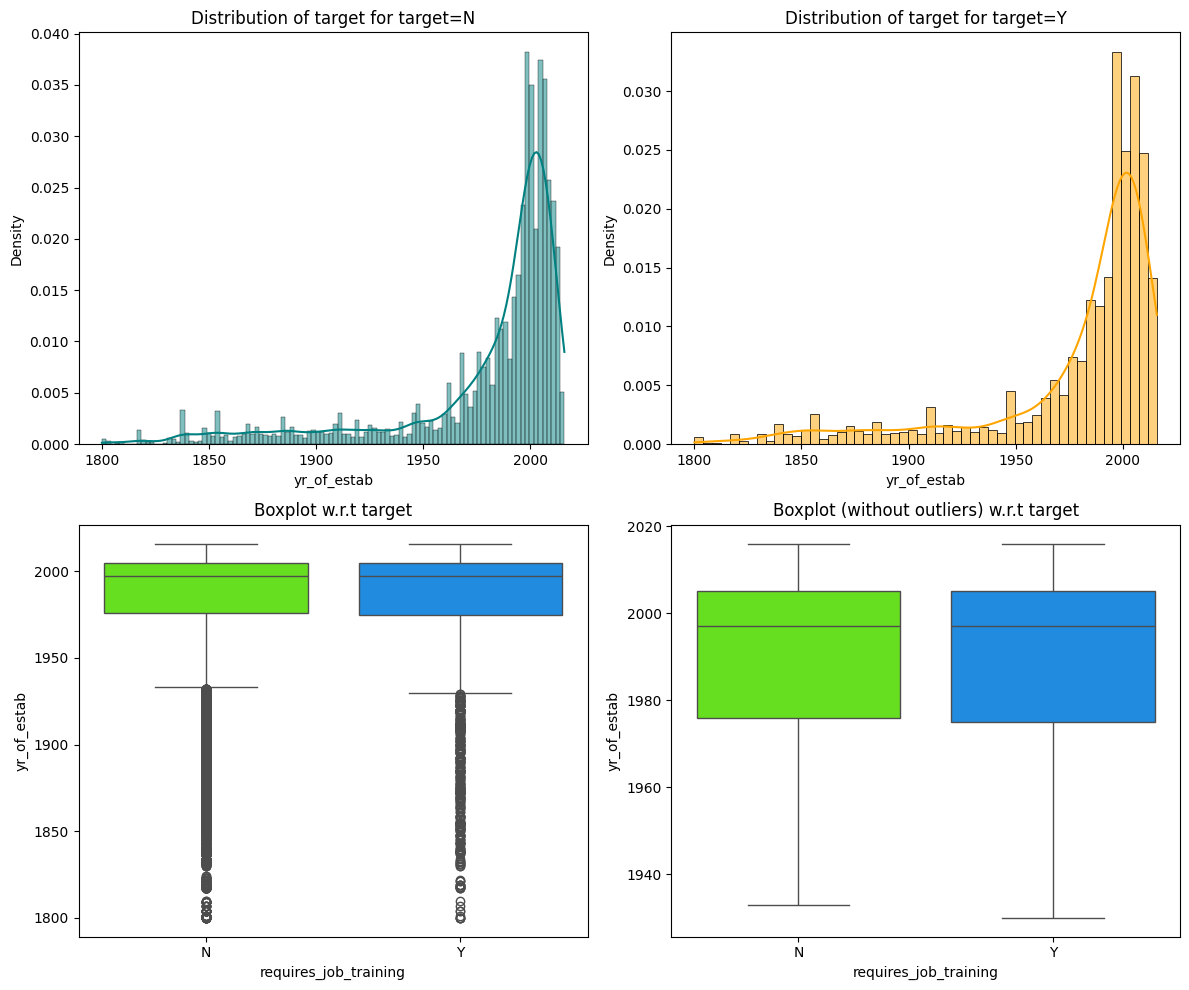

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "requires_job_training")

People who do not require job training tend to be hired to companies that were established more recently.

Has Job Experience vs Region of Employment

region_of_employment   Island  Midwest  Northeast  South  West    All
requires_job_training                                                
All                       375     4307       7195   7017  6586  25480
N                         353     4074       6589   5877  5632  22525
Y                          22      233        606   1140   954   2955
------------------------------------------------------------------------------------------------------------------------


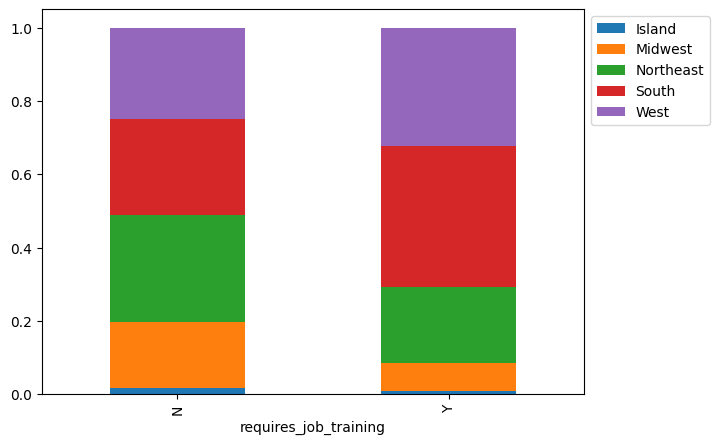

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "requires_job_training", "region_of_employment")

Slight difference in graphs. People who do not require job training tend to be hired to companies in the midwest and Northeast more than people who do require job training.

Requires Job Training vs Prevailing Wage

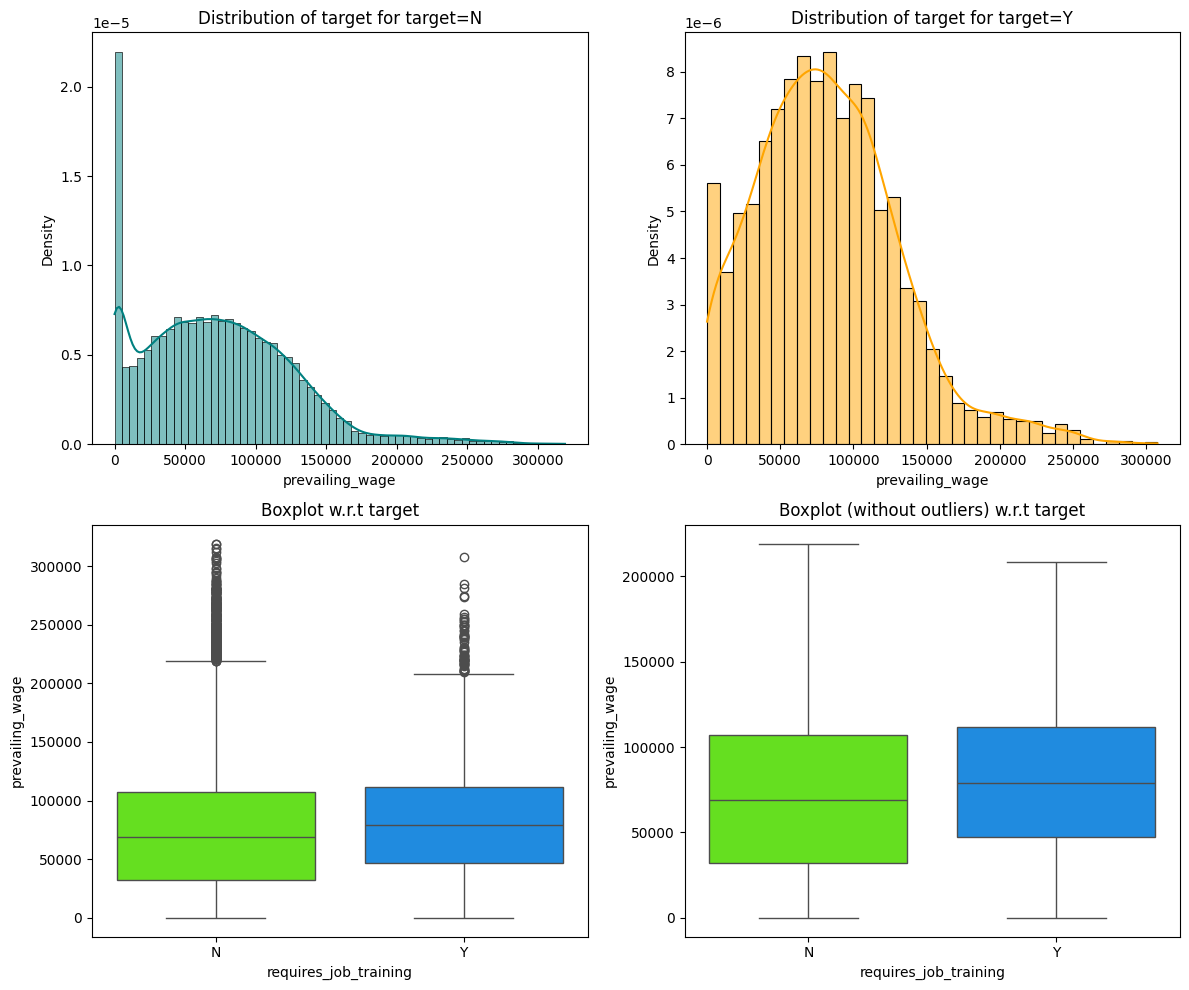

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "requires_job_training")

These graphs do show a significant difference between people who do and no not require job training. For people who do require job training, there is a normal distribution of the prevailing wages. However, people who do not require job training have a prevailing wage concentrated toward lower wages, which could be an indication that these jobs may be simpler or more common jobs, and that is why there is no training required, and often lower wages. However, according to the boxplots, the plot for people who do not require training has many outliers on the higher end, indicating there are many instances of employees being hired with no prior experience to jobs with a high prevailing wage.

Requires Job Training vs Unit of Wage

unit_of_wage           Hour  Month  Week   Year    All
requires_job_training                                 
All                    2157     89   272  22962  25480
N                      2086     85   267  20087  22525
Y                        71      4     5   2875   2955
------------------------------------------------------------------------------------------------------------------------


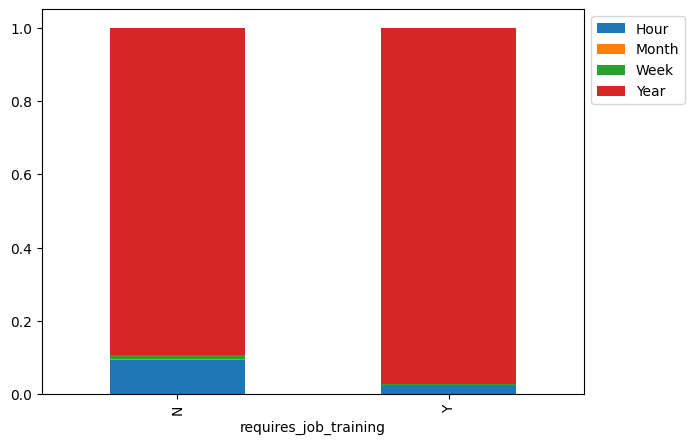

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "requires_job_training", "unit_of_wage")

People who do require job training tend to be paid a yearly salary. My assumption that the jobs that are paid hourly are minimum wage jobs is supported by this graph because those jobs usually do not require training.

Requires Job Training vs Full Time Position

full_time_position        N      Y    All
requires_job_training                    
All                    2707  22773  25480
N                      2656  19869  22525
Y                        51   2904   2955
------------------------------------------------------------------------------------------------------------------------


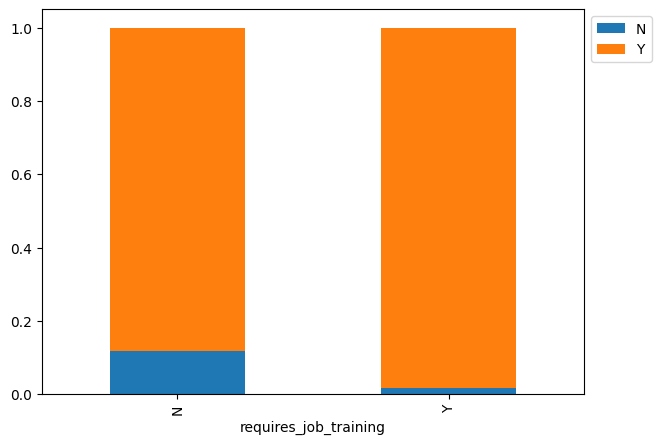

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "requires_job_training", "full_time_position")

People who do require job training are more likley to be hired for a full time position. This supports my assumption that the jobs that do require training are more complex jobs, meaning the employees may have more qualifications, and the required training has to do with the complexity of the job, not their expertise.

Requires Job Training vs Case Status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


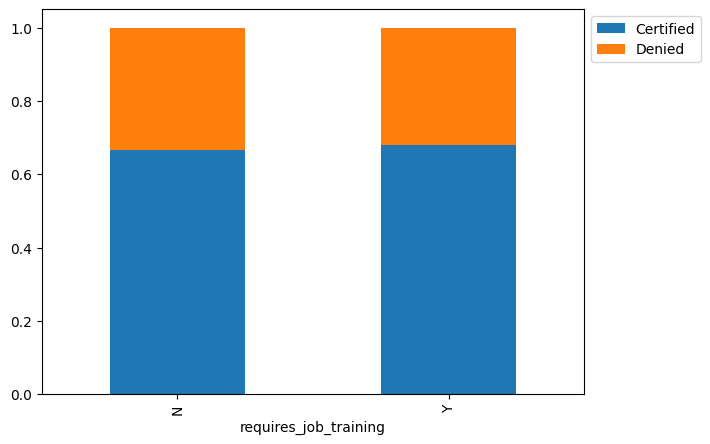

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "requires_job_training", "case_status")

Whether or not an employee was certified does not seem to be at all dependent on if they require job training.

Number of Employees vs Region of Employment

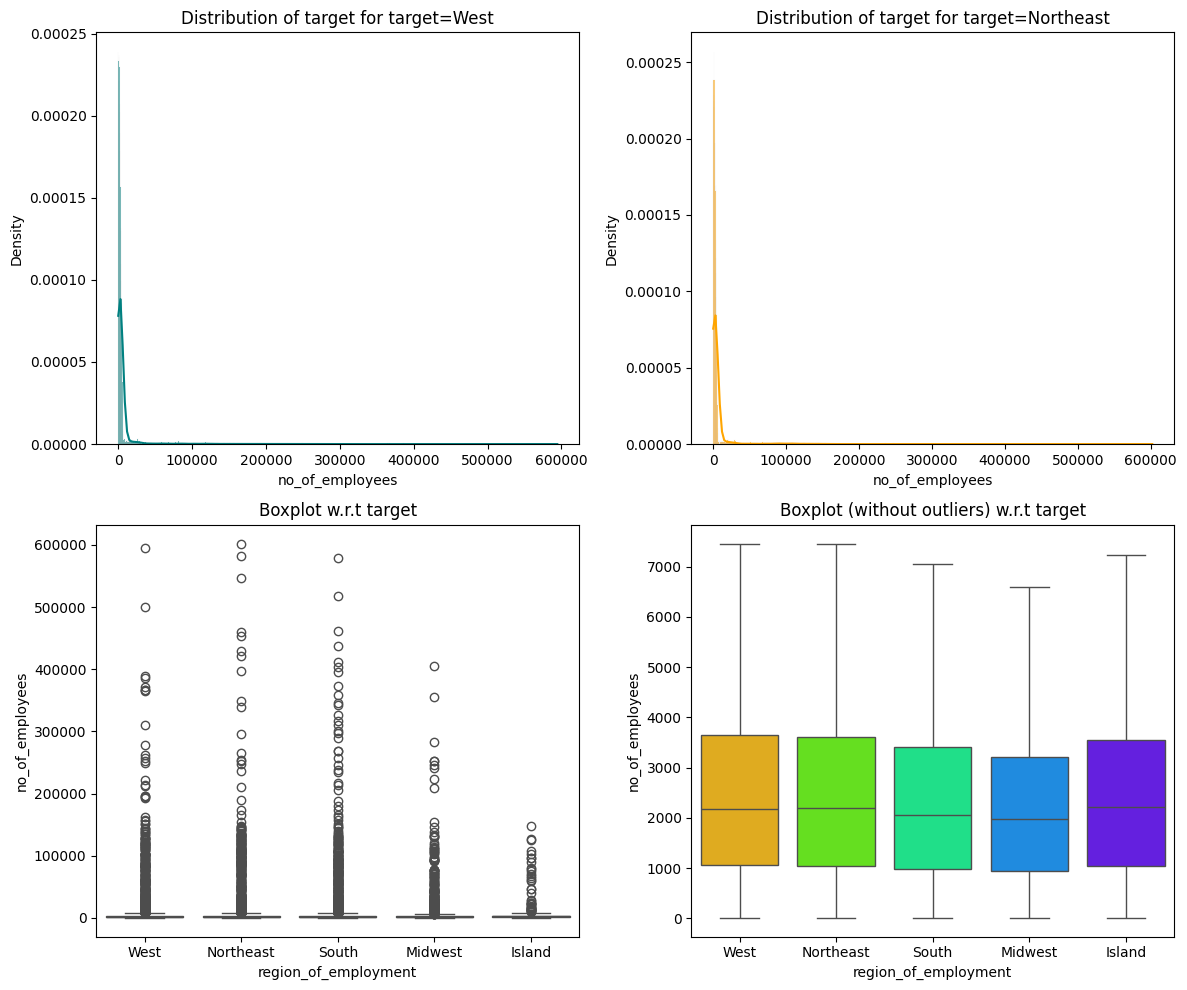

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "no_of_employees", "region_of_employment")

Number of employees does not seem to vary much based on region.

Number of Employees vs Unit of Wage

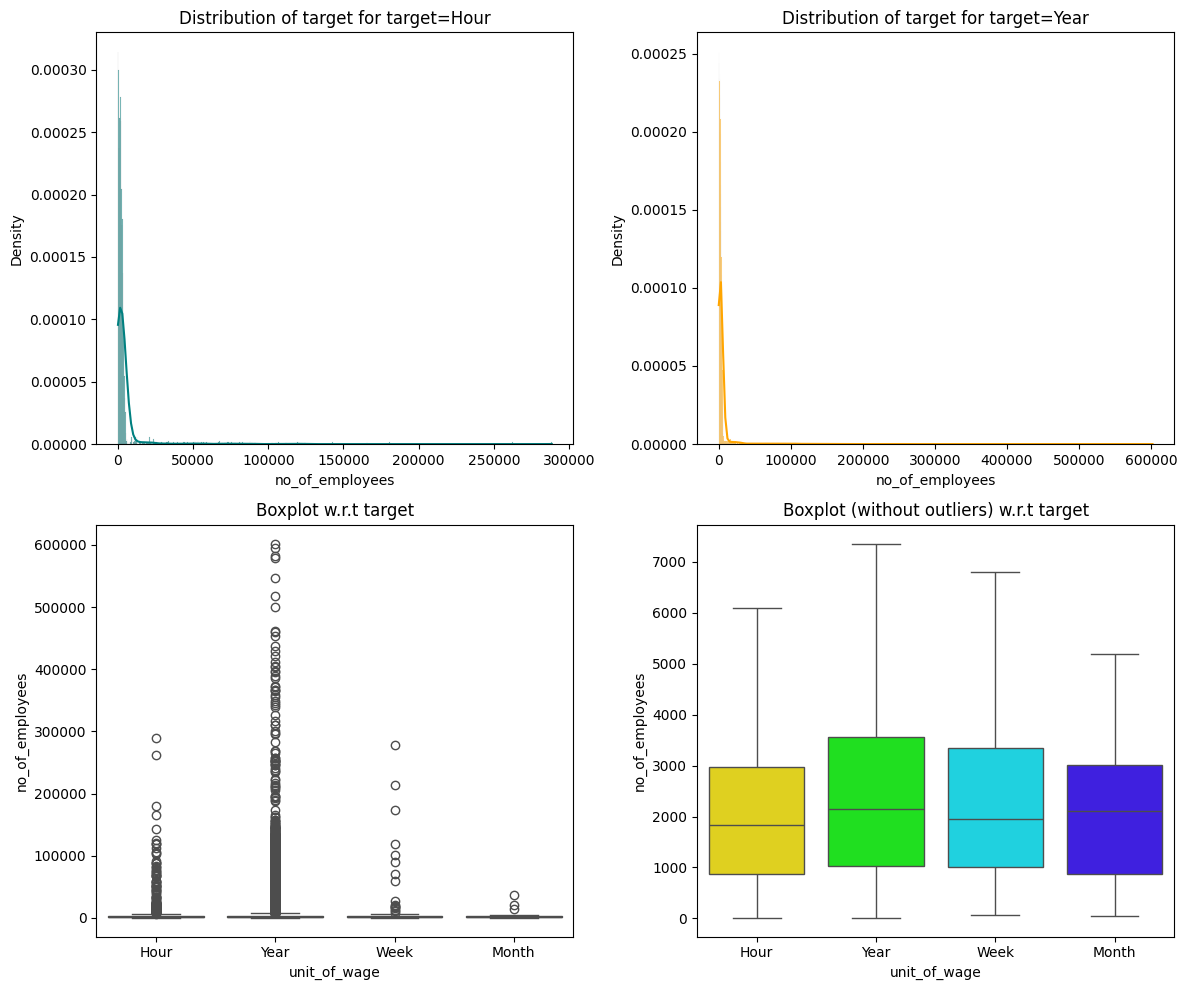

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "no_of_employees", "unit_of_wage")

For hourly wage jobs, it is more common to have a large number of employees.
Based on the boxplots, jobs with yearly wages tend to have higher number of employees, with many extreme high outliers.

Number of Employees vs Full Time Position

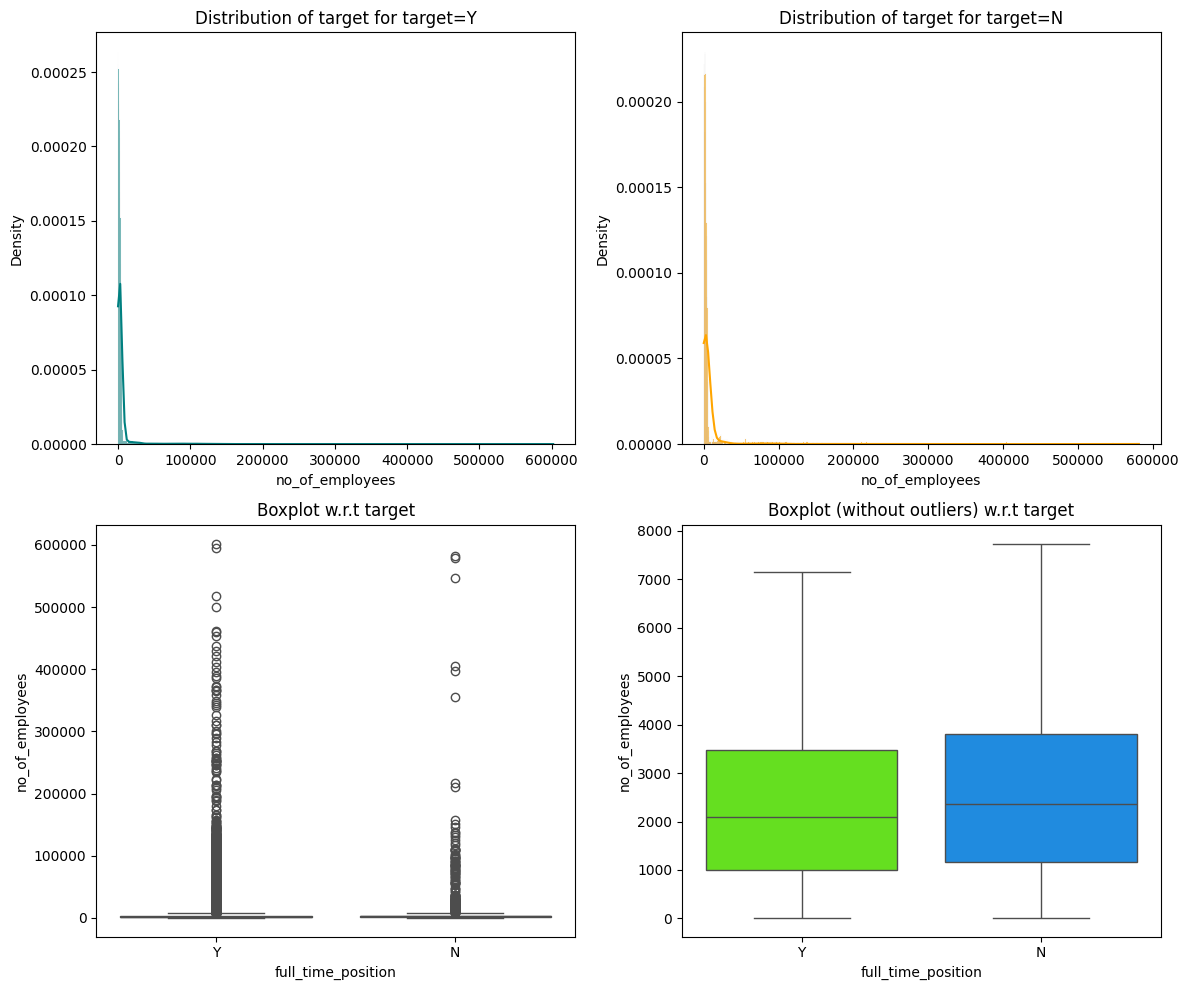

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "no_of_employees", "full_time_position")

Part-time jobs more often have hgher number of employees, but full-time jobs have many outliers with companies with extremely high numbers of employees.

Number of Employees vs Case Status

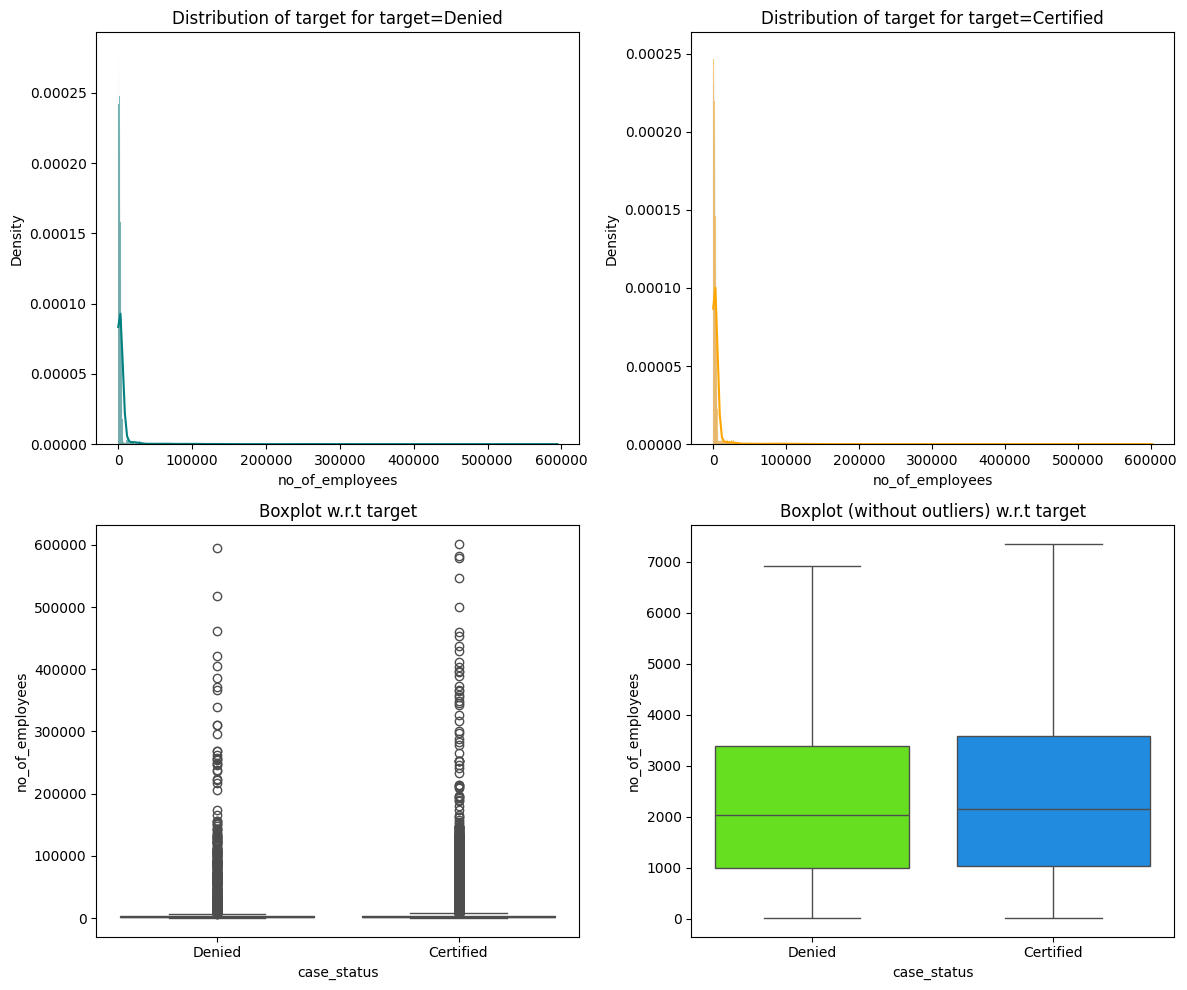

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "no_of_employees", "case_status")

Very similar graphs; indicating the numbers of employees is not a determining factor in whether or not the employee is certified.

Year Established vs Region of Employment

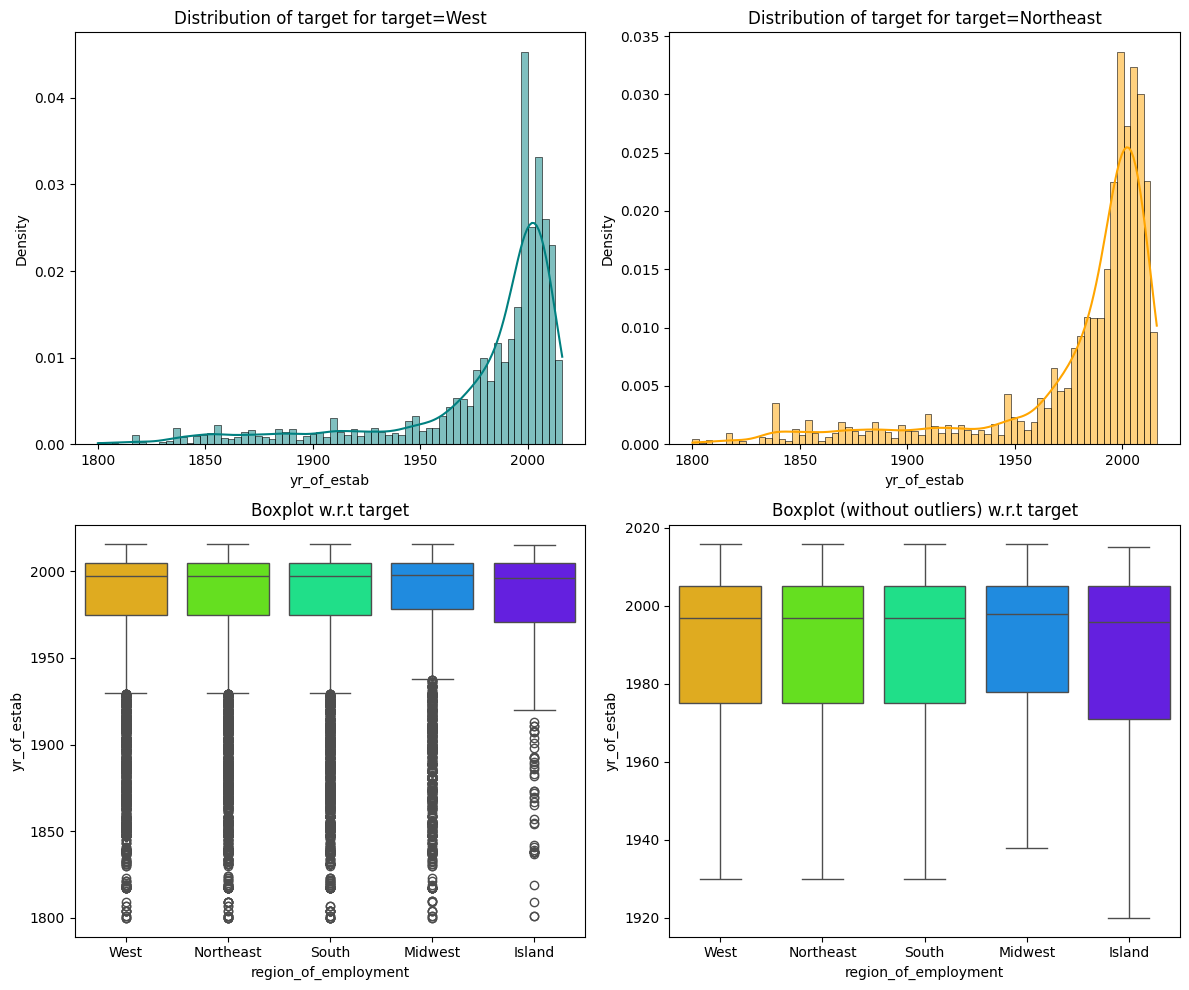

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "region_of_employment")

All graphs seem relatively similar, meaning that employees were hired in a similar pattern across regions in companies of all ages.

Year Established vs Unit of Wage

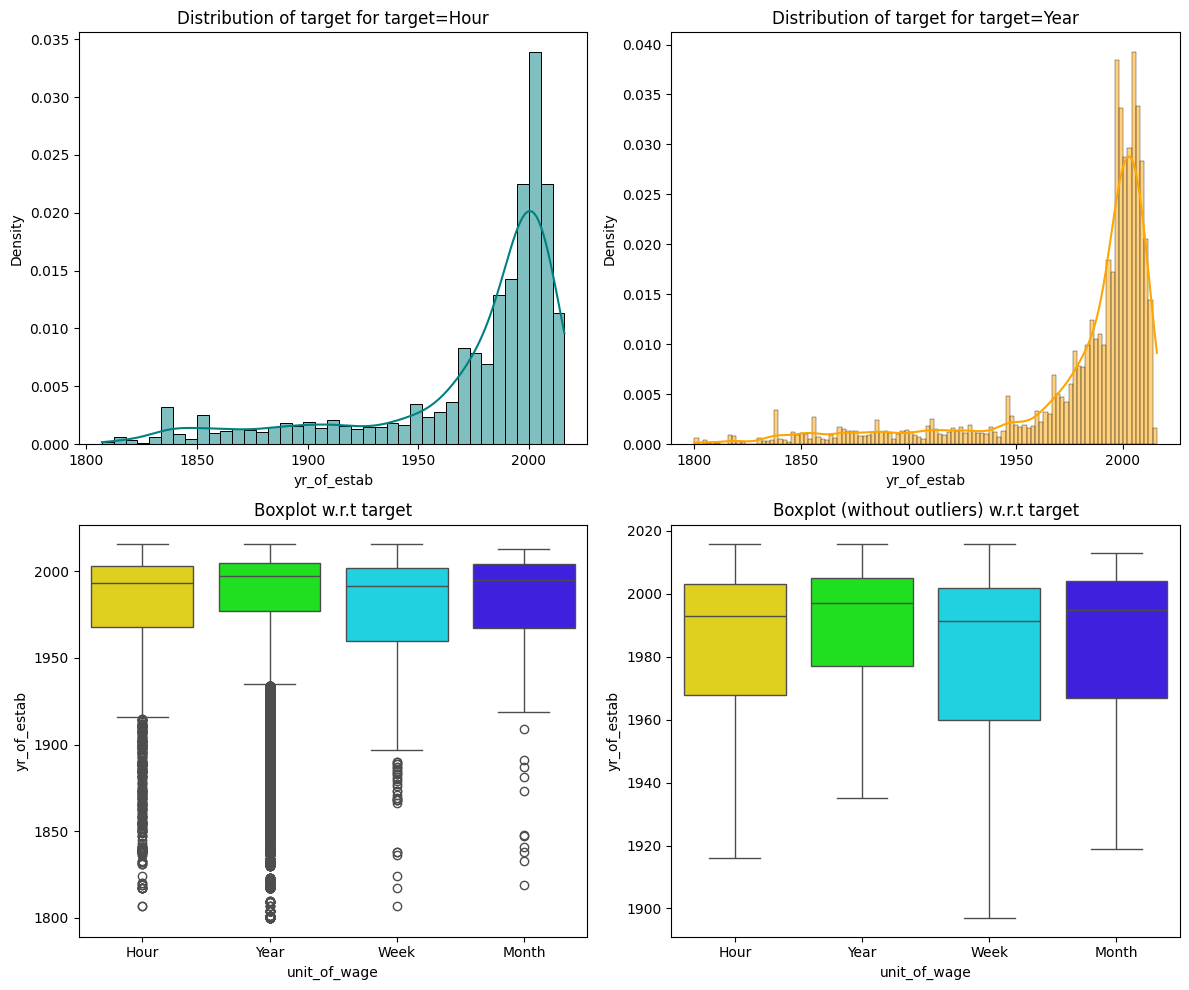

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "unit_of_wage")

For positions with a yearly wage, employees were highered more frequently right before 2000 and right after 2000, but in between there was a decrease in highering foreign employees. So, this graph is bimodal. However, for hourly wage jobs, the distribution is left skewed, but follows a normal distribution pattern.

Year Established vs Full Time Position

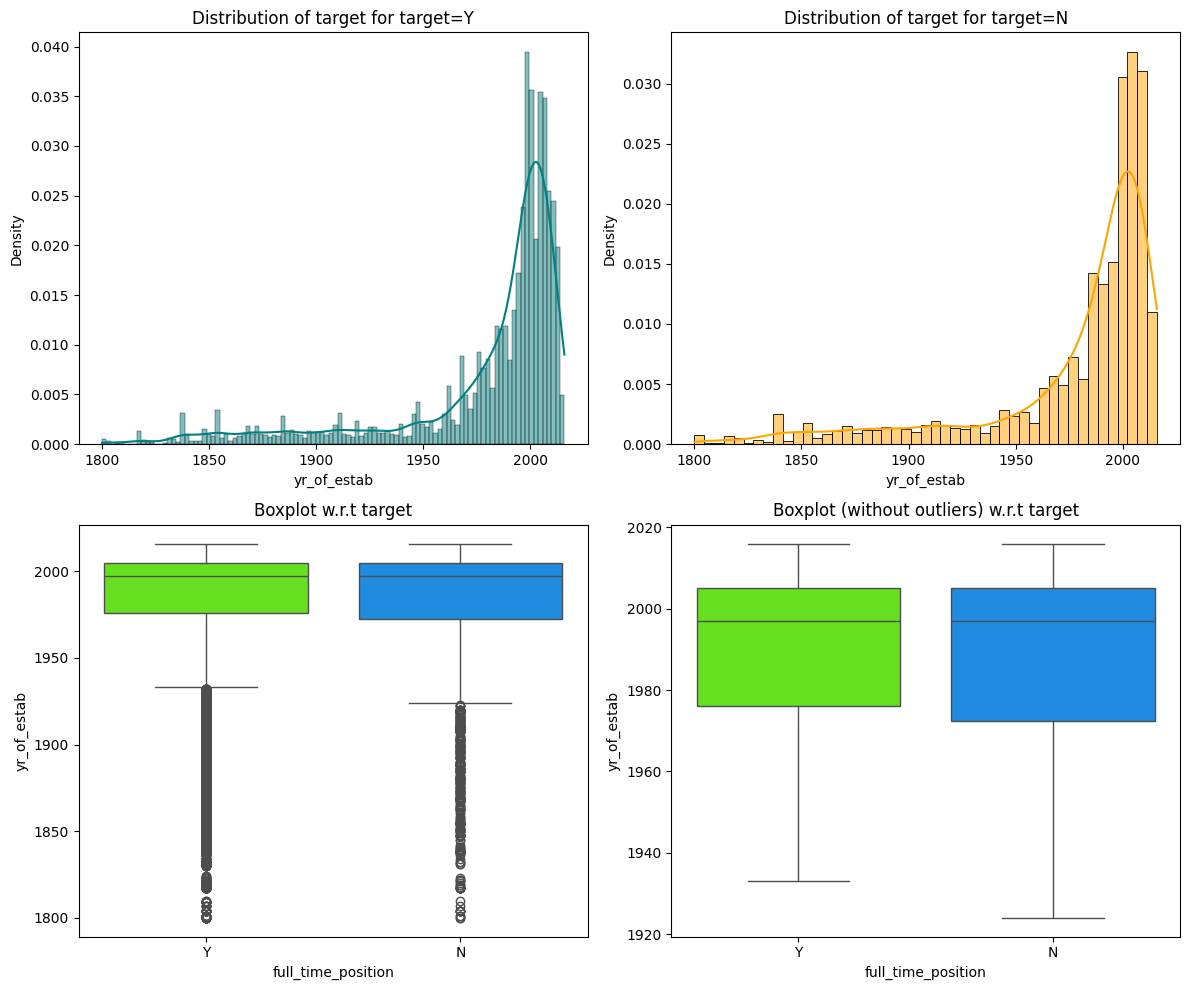

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "full_time_position")

More instances of part time jobs in older companies.

Year Established vs Case Status

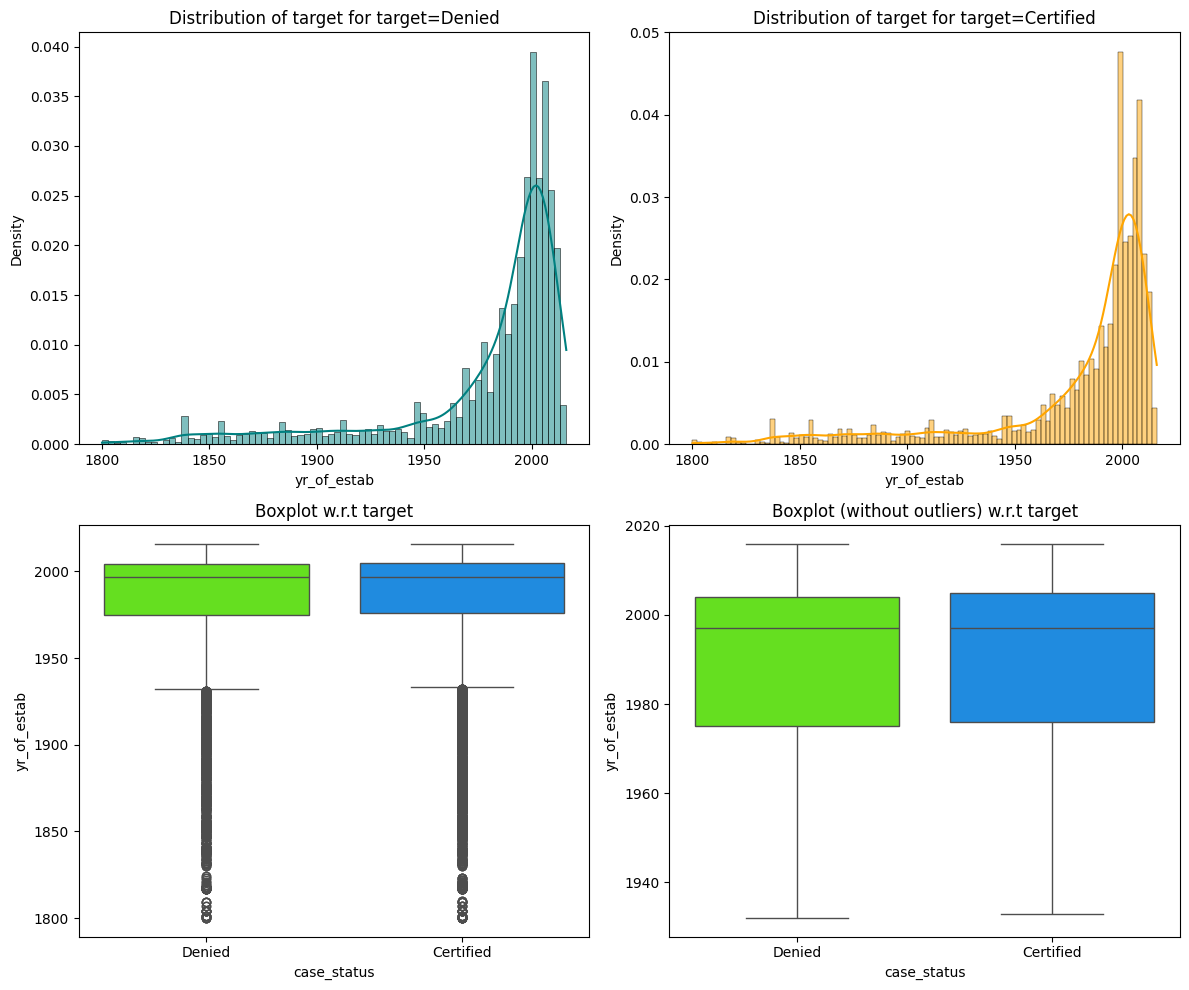

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "yr_of_estab", "case_status")

Very similar graphs. Whether or not the employee was certified does not seem to be dependent on when the company was established.

Region of Employment vs Prevailing Wage

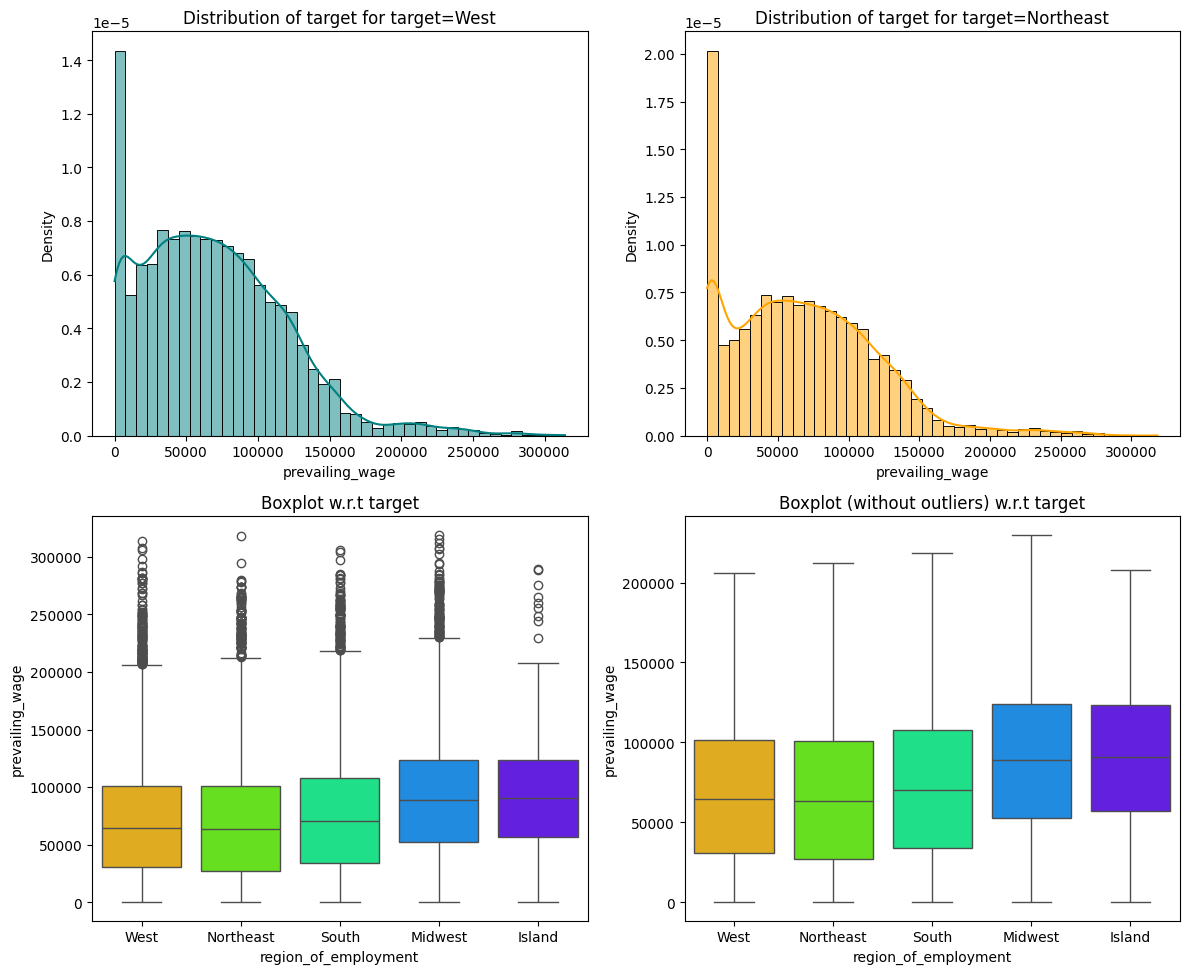

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "region_of_employment")

Very similar histograms. Islands and the Midwest may hire for positions with slightly higher wages more commonly, although not a noticeable difference.

Region of Employment vs Unit of Wage

unit_of_wage          Hour  Month  Week   Year    All
region_of_employment                                 
All                   2157     89   272  22962  25480
Northeast              865     29    92   6209   7195
South                  696     28    68   6225   7017
West                   432     19    77   6058   6586
Midwest                146     13    32   4116   4307
Island                  18      0     3    354    375
------------------------------------------------------------------------------------------------------------------------


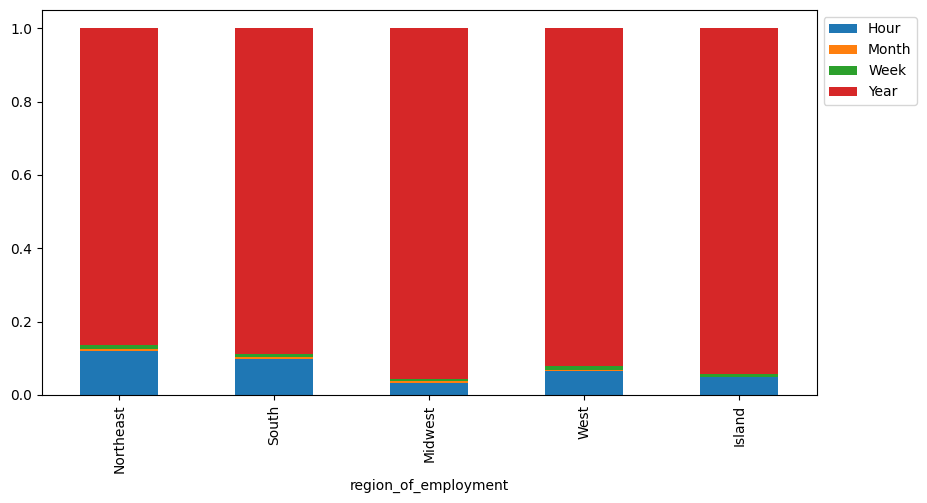

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "region_of_employment", "unit_of_wage")

idwest most commonly hires foreign employees for yearly wages.

Region of Employment vs Full Time Position

full_time_position       N      Y    All
region_of_employment                    
All                   2707  22773  25480
South                  935   6082   7017
Northeast              804   6391   7195
West                   473   6113   6586
Midwest                450   3857   4307
Island                  45    330    375
------------------------------------------------------------------------------------------------------------------------


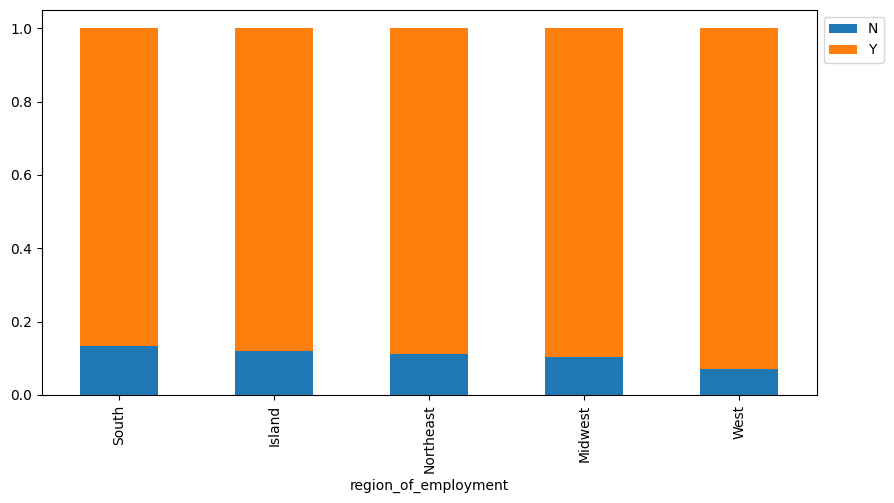

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "region_of_employment", "full_time_position")

South most commonly hires foreign employees for part-time positions.

Region of Employment vs Case Status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


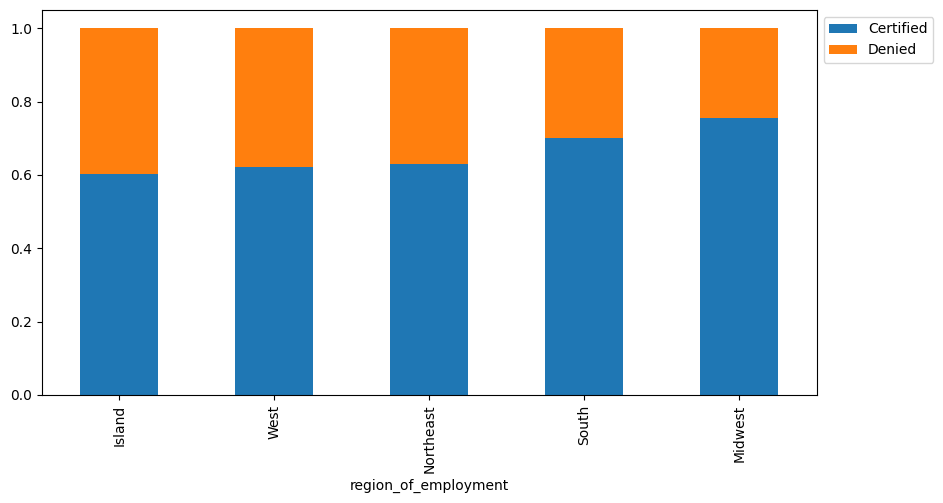

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "region_of_employment", "case_status")

The midwest has a slightly higher certification rate, but for the most part this does not seem to be dependent on region.

Prevailing Wage vs Unit of Wage

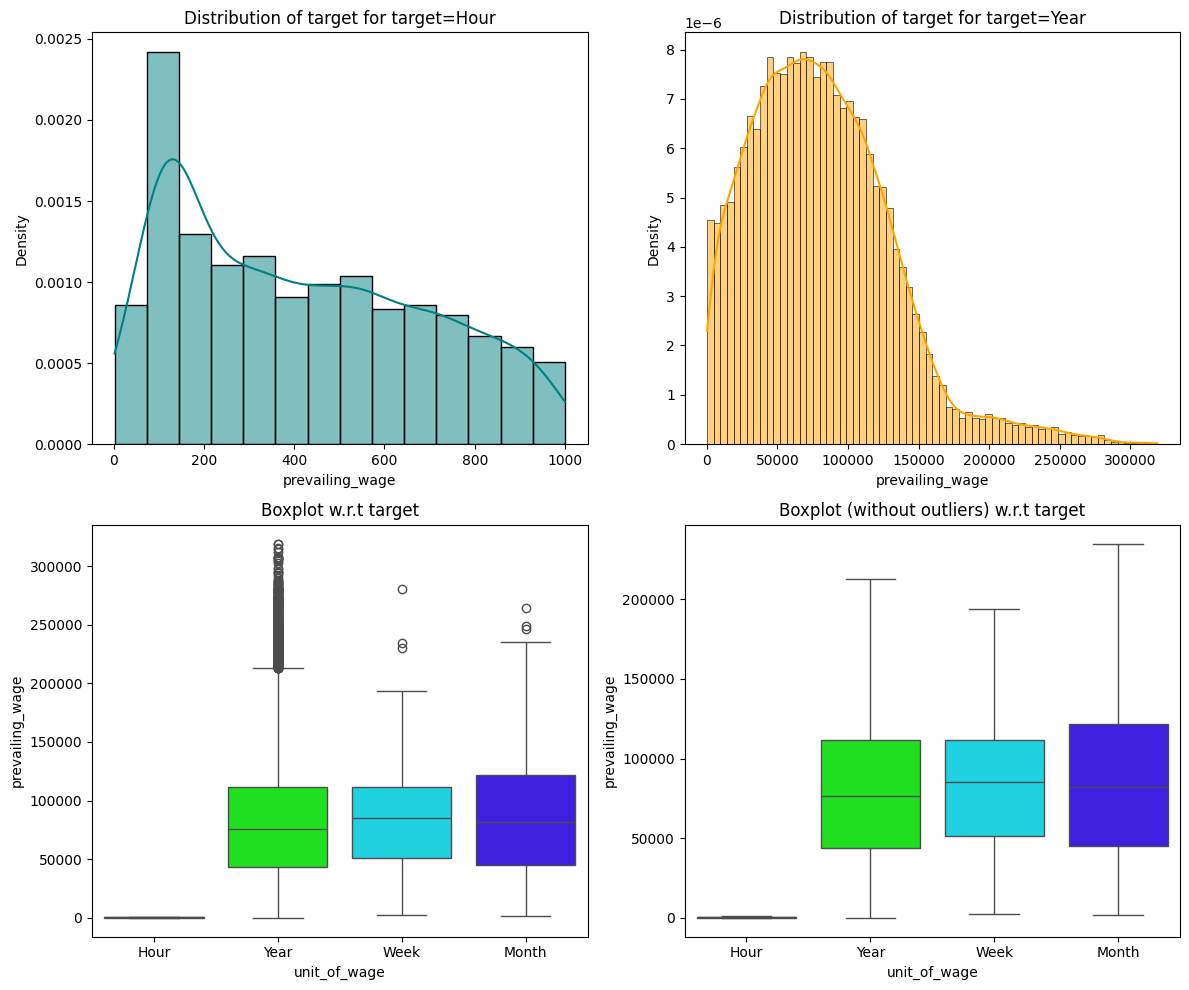

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "unit_of_wage")

Based on both the histograms and boxplots, we can see the jobs that pay hourly have a significantly lower wage. This supports my assumptions earlier on that the hourly paying jobs were probably minimum wage, which is why they more commonly did not require previous experience or job training.

Prevailing Wage vs Full Time Position

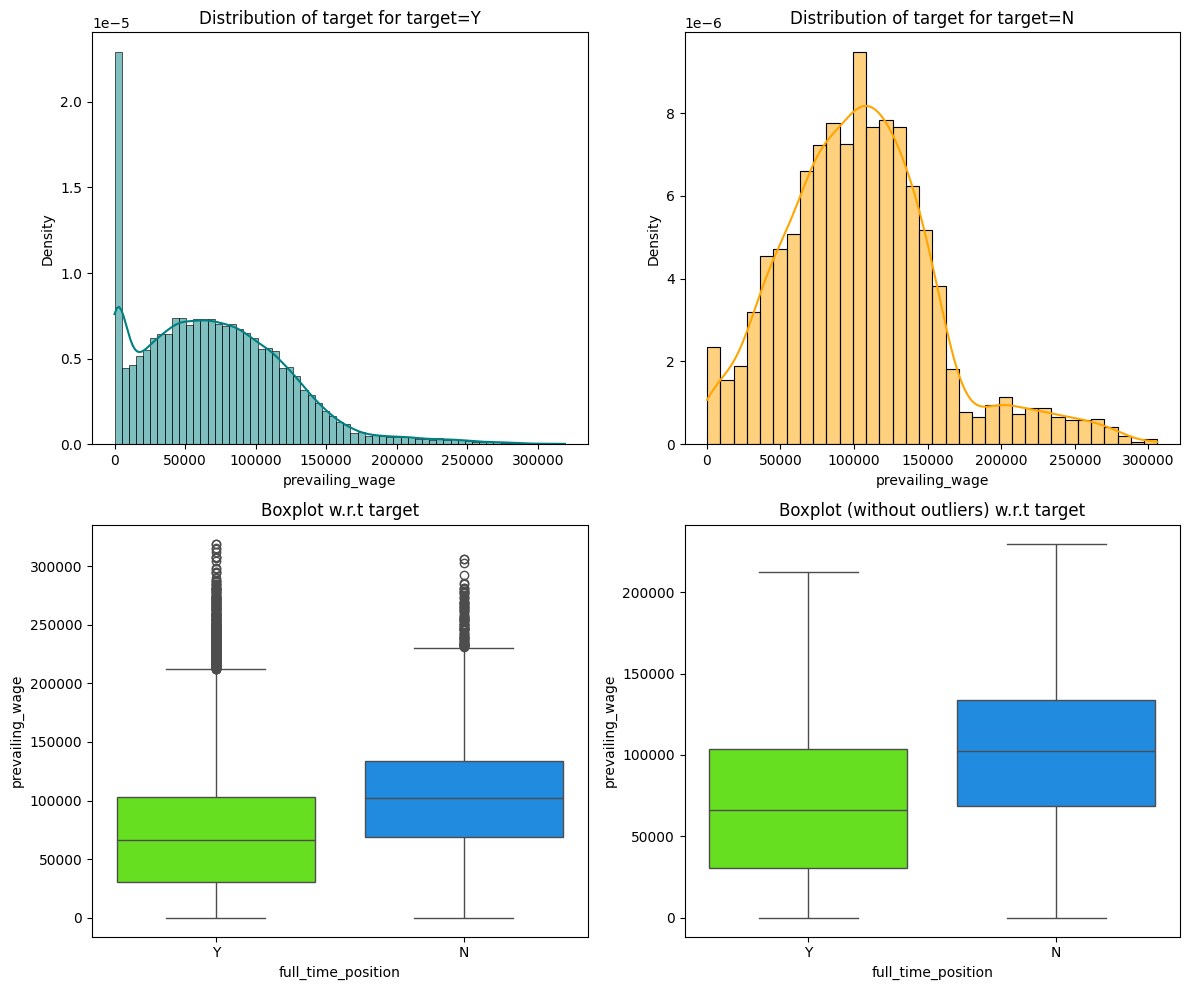

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "full_time_position")

Part-time positions tend to have a higher prevailing wage, which is confirmed by other graphs, but is not what I initially expected. I am guessing these jobs could be hiring foreign employees for more complex, maybe research, positions.

Prevailing Wage vs Case Status

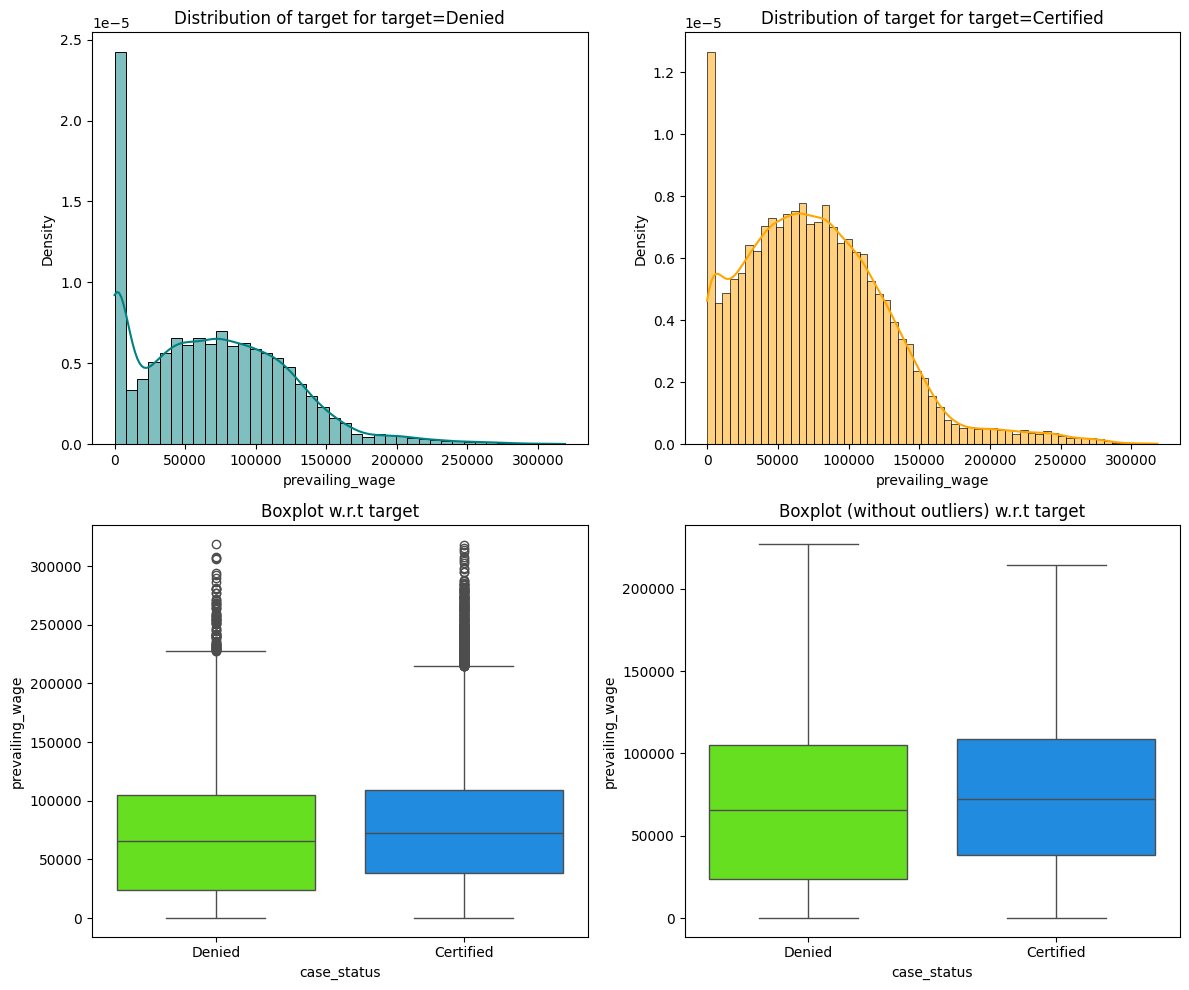

In [ ]:
# call on distribution plot funtion for these vars
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Based on the histograms, people denied were more commonly applying for jobs with lower prevailing wages. However, people who were certified applied for many lower prevailing wages, but also many positions with higher prevailing wages.

Unit of Wage vs Full Time Position

full_time_position     N      Y    All
unit_of_wage                          
All                 2707  22773  25480
Year                2673  20289  22962
Hour                  19   2138   2157
Week                  10    262    272
Month                  5     84     89
------------------------------------------------------------------------------------------------------------------------


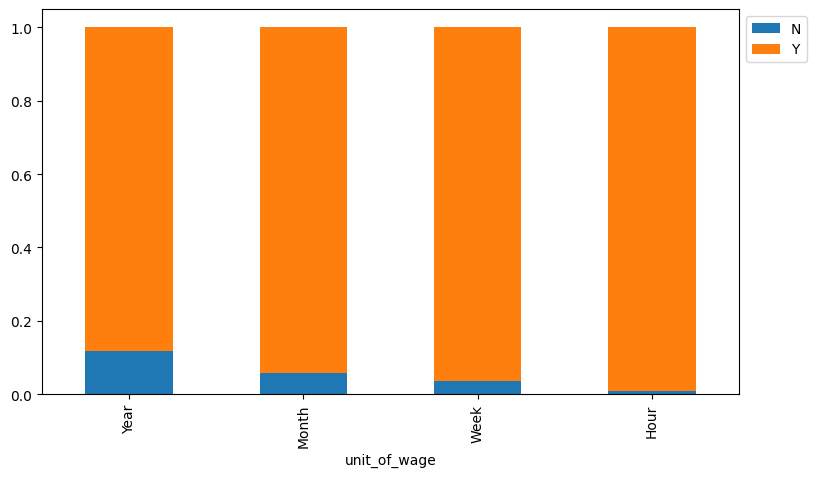

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "unit_of_wage", "full_time_position")

The hourly wage jobs (which we determined are likley mostly minimum wage jobs) are more likley to be full time. The jobs that pay yearly are more likely than other wages to be part-time.

Unit of Wage vs Case Status

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


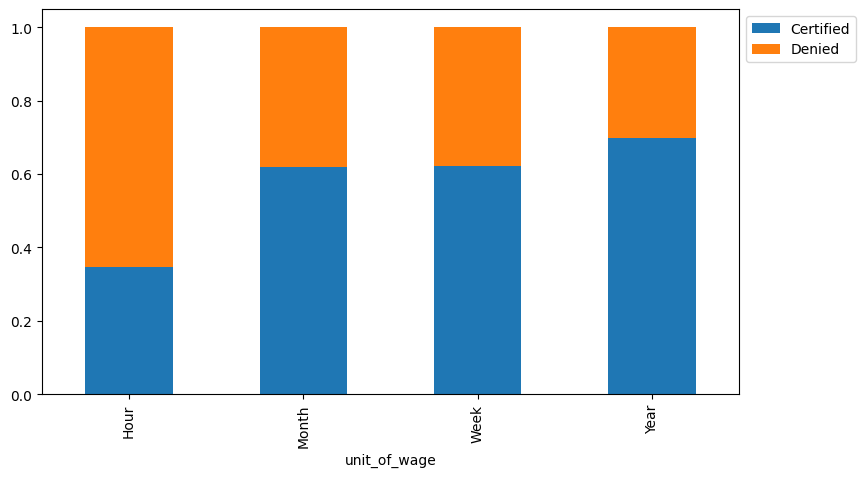

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "unit_of_wage", "case_status")

Jobs that are paid by the hour are much less likely to be certified, and jobs that are paid yearly are most likley to be certified.

Full Time Position vs Case Status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


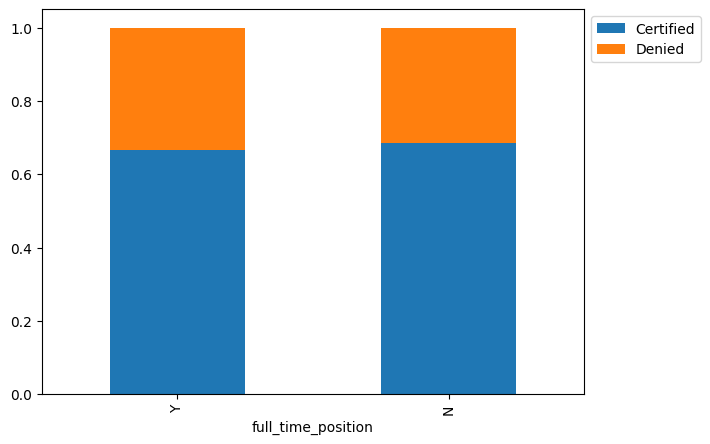

In [ ]:
# call stacked barplot fuction for these two vars
stacked_barplot(data, "full_time_position", "case_status")

Whether or not the job is full-time does not seem to be a determing factor in whether or not the employee gets approved.

Answering Questions


- Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
- How does the visa status vary across different continents?
- Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
- In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
- The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


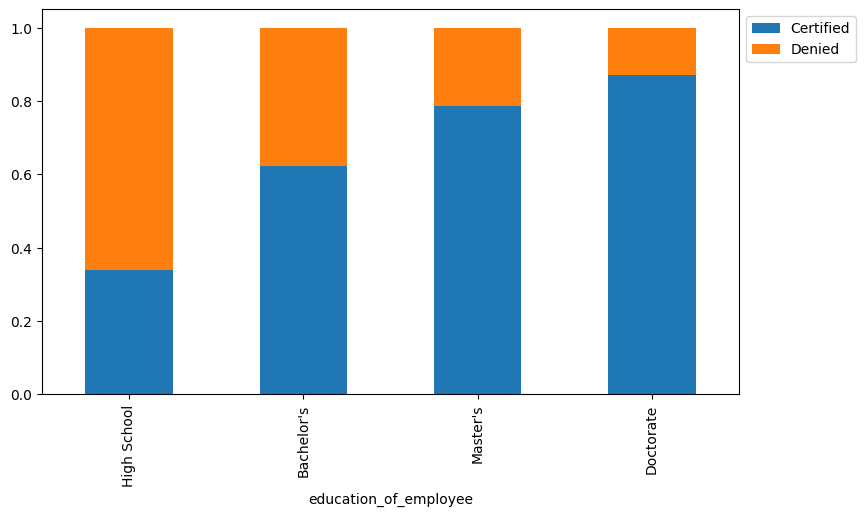

In [ ]:
# create graph for education vs case status
stacked_barplot(data, "education_of_employee", "case_status")

Education does play a role in Visa certification. According to the barplot, the higher level of degree the employee has, the mosre likely there are to be certified.

How does the visa status vary across different continents?

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


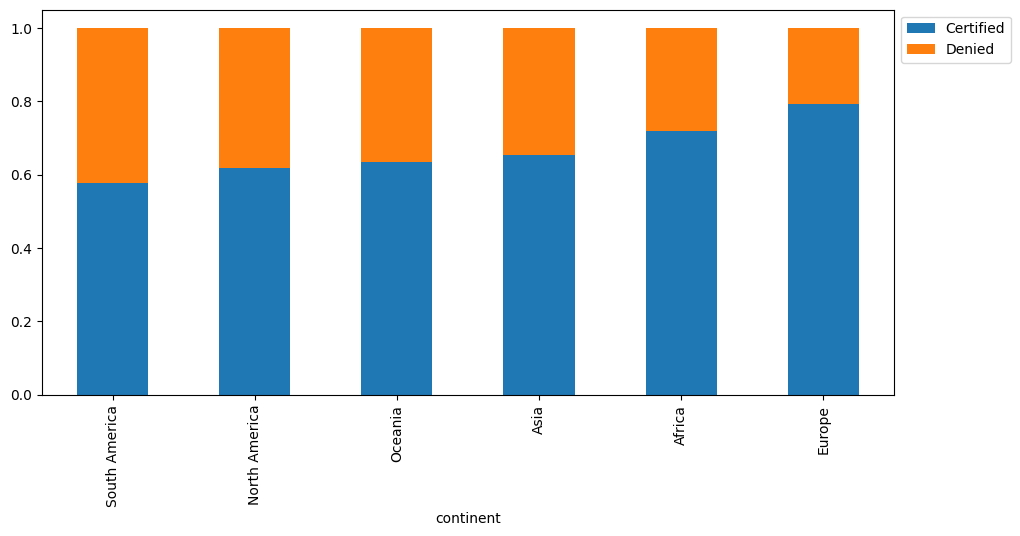

In [ ]:
# create graph for continent vs case status
stacked_barplot(data, "continent", "case_status")

According to the bargraph, European employees are most likely to be certified, followed by Africa, then Asia, then Oceania, then North America, and the continent that is least likely to be certified is South America.

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


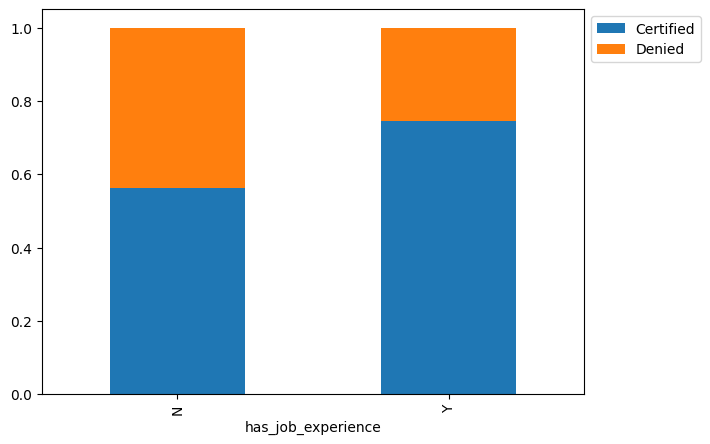

In [ ]:
# create graph for work experience vs case status
stacked_barplot(data, "has_job_experience", "case_status")

Work experience does influence visa status. If the employee has prior work experience, they are more likley to be certified according to this graph.

In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


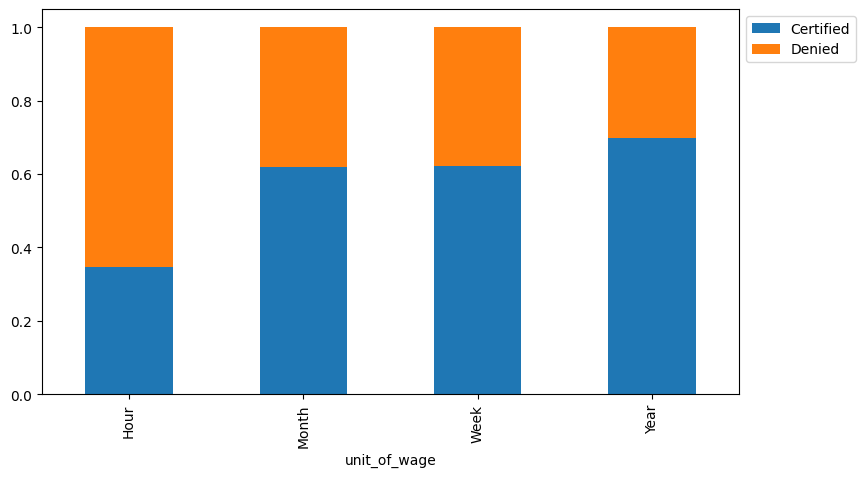

In [ ]:
# create graph for unit of wage vs case status
stacked_barplot(data, "unit_of_wage", "case_status")

People applying for a job with yearly pay are most likley to be certified.

The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

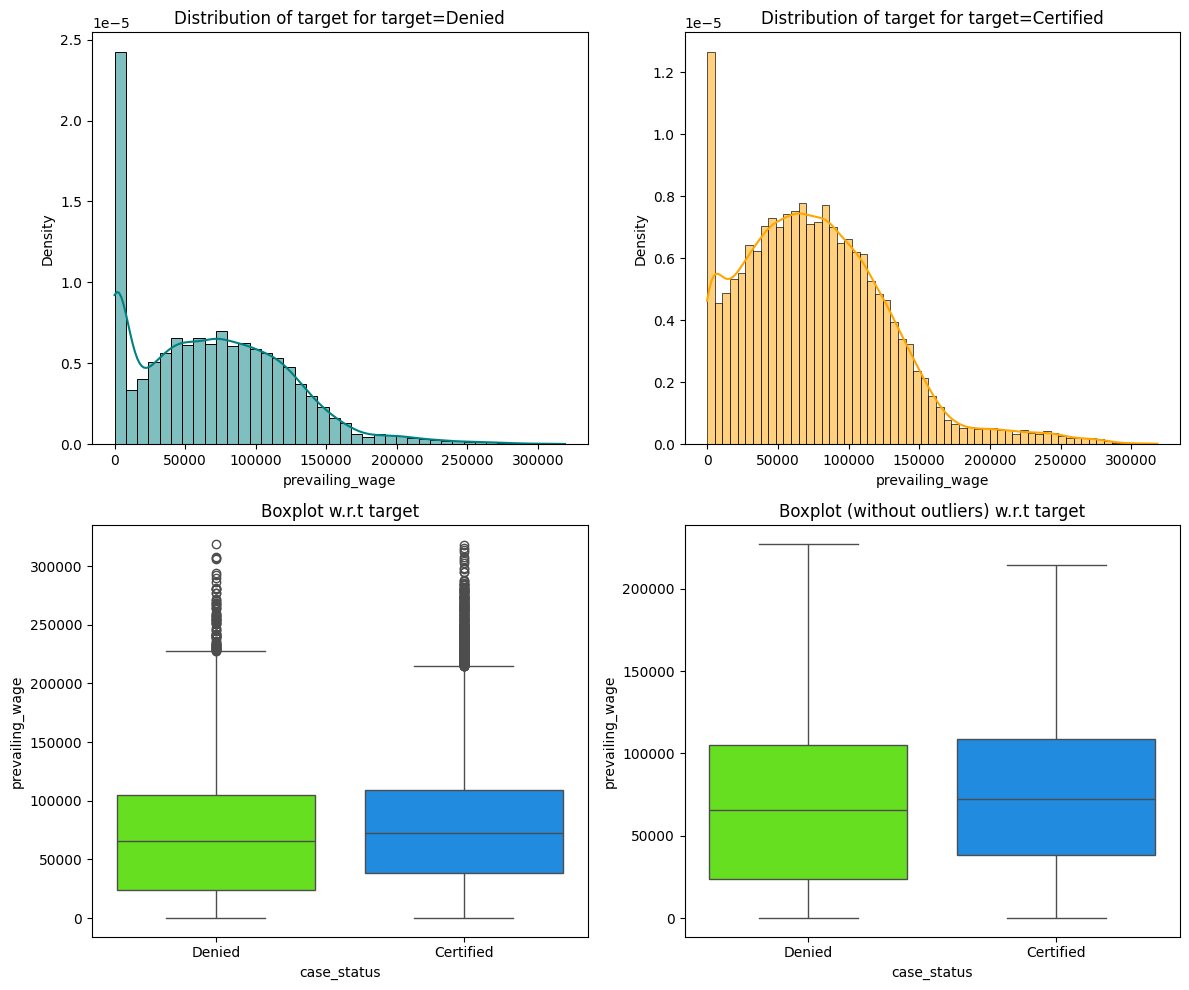

In [ ]:
# create graph for prevailing wage vs case status
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Employees who were certified were more often applying for jobs with a higher prevailing wage than those who were denied.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

In [ ]:
#check if any null values
data.isnull().sum()

continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

No null values in the data.

Feature Engineering

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


In [ ]:
# convert object columns to categorical columns
for col in data.columns: # loop through all columns in the dataframe
    if data[col].dtype == 'object': # identify columns with strings
        data[col] = pd.Categorical(data[col]) # replace strings with category
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour                  Y      Denied  
1         Year                  Y   Certified  
2         Year                  Y      Denied  
3         Year                  Y      Denied  
4         Year                  Y   Certified

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 797.7 KB


Object variables now converted to categorical vars

In [ ]:
#show each category amount for each categorical variable
print(data['continent'].value_counts())
print(data['education_of_employee'].value_counts())
print(data['has_job_experience'].value_counts())
print(data['requires_job_training'].value_counts())
print(data['region_of_employment'].value_counts())
print(data['unit_of_wage'].value_counts())
print(data['full_time_position'].value_counts())
print(data['case_status'].value_counts())

continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
requires_job_training
N    22525
Y     2955
Name: count, dtype: int64
region_of_employment
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: count, dtype: int64
unit_of_wage
Year     22962
Hour      2157
Week       272
Month       89
Name: count, dtype: int64
full_time_position
Y    22773
N     2707
Name: count, dtype: int64
case_status
Certified    17018
Denied        8462
Name: count, dtype: int64


To make this more neat, I want to:

- use one hot encoding on continent, education of employee, has job experience, requires job training, region of employment, unit of wage, and full time position
- change case status to 0 for denied, 1 for certified

Outlier detection and treatment

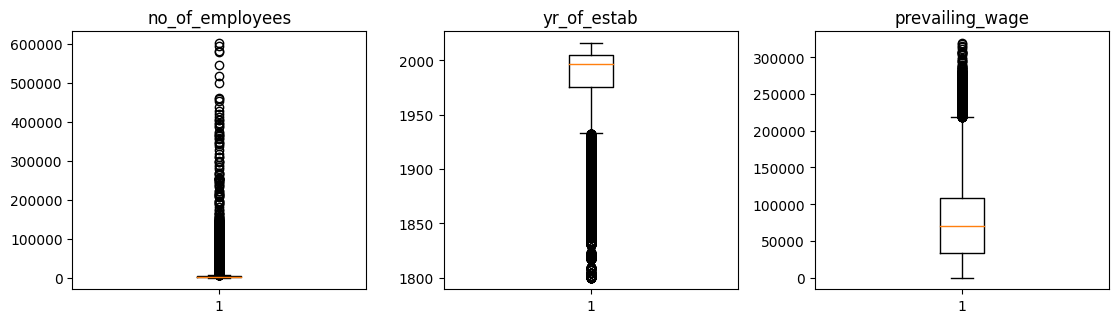

<Figure size 640x480 with 0 Axes>

In [ ]:
#outlier detection using boxplot

num_vars2 = data.select_dtypes(include=np.number).columns.tolist()

#leave out year bc it is a temporal variable
num_vars2.remove('yr_of_estab')

plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_vars):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()
plt.savefig("outliers.png")

There are many outliers, but there are clearly all real cases and there are so many of them, so I will not remove.

Preparing data for modeling

In [ ]:
#create dictionary for new structure for each series in dataframe I want to change
new_structure = {"case_status": {"Denied": 0, "Certified": 1 }}

In [ ]:
#replace old structure with new structure
data = data.replace(new_structure)
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour                  Y           0  
1         Year                  Y           1  
2         Year                  Y           0  
3         Year                  Y           0  
4         Year                  Y           1

In [ ]:
data.head()

continent education_of_employee has_job_experience requires_job_training  \
0      Asia           High School                  N                     N   
1      Asia              Master's                  Y                     N   
2      Asia            Bachelor's                  N                     Y   
3      Asia            Bachelor's                  N                     N   
4    Africa              Master's                  Y                     N   

   no_of_employees  yr_of_estab region_of_employment  prevailing_wage  \
0            14513         2007                 West         592.2029   
1             2412         2002            Northeast       83425.6500   
2            44444         2008                 West      122996.8600   
3               98         1897                 West       83434.0300   
4             1082         2005                South      149907.3900   

  unit_of_wage full_time_position case_status  
0         Hour                  Y           0  
1         Year                  Y           1  
2         Year                  Y           0  
3         Year                  Y           0  
4         Year                  Y           1

In [ ]:
#make case_status int instead of cat
data['case_status'] = data['case_status'].astype(int)

In [ ]:
#ensure it changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  int64   
dtypes: category(7), float64(1), int64(3)
memory usage: 971.7 KB


## EDA

- It is a good idea to explore the data once again after manipulating it.

Re-answer these questions:
- Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?
- How does the visa status vary across different continents?
- Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?
- In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?
- The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

case_status               0      1    All
education_of_employee                    
All                    8462  17018  25480
Bachelor's             3867   6367  10234
High School            2256   1164   3420
Master's               2059   7575   9634
Doctorate               280   1912   2192
------------------------------------------------------------------------------------------------------------------------


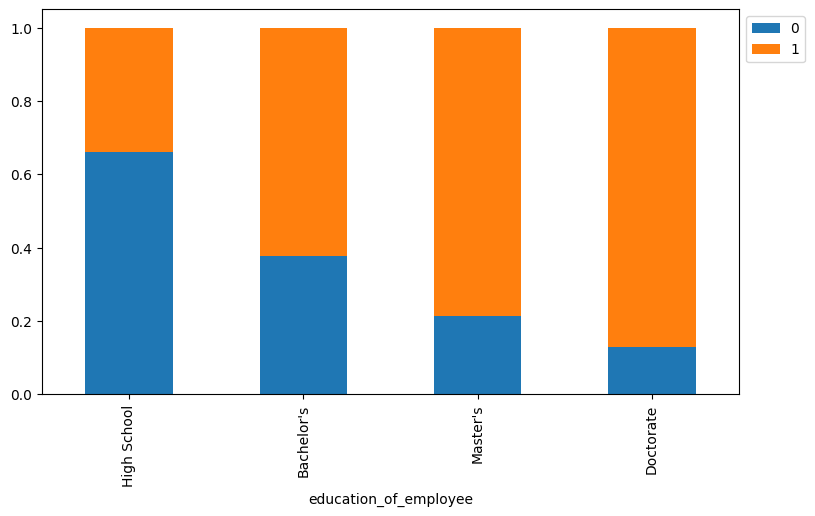

In [ ]:
# create graph for education vs case status
stacked_barplot(data, "education_of_employee", "case_status")

Nothing changed.

How does the visa status vary across different continents?

case_status       0      1    All
continent                        
All            8462  17018  25480
Asia           5849  11012  16861
North America  1255   2037   3292
Europe          775   2957   3732
South America   359    493    852
Africa          154    397    551
Oceania          70    122    192
------------------------------------------------------------------------------------------------------------------------


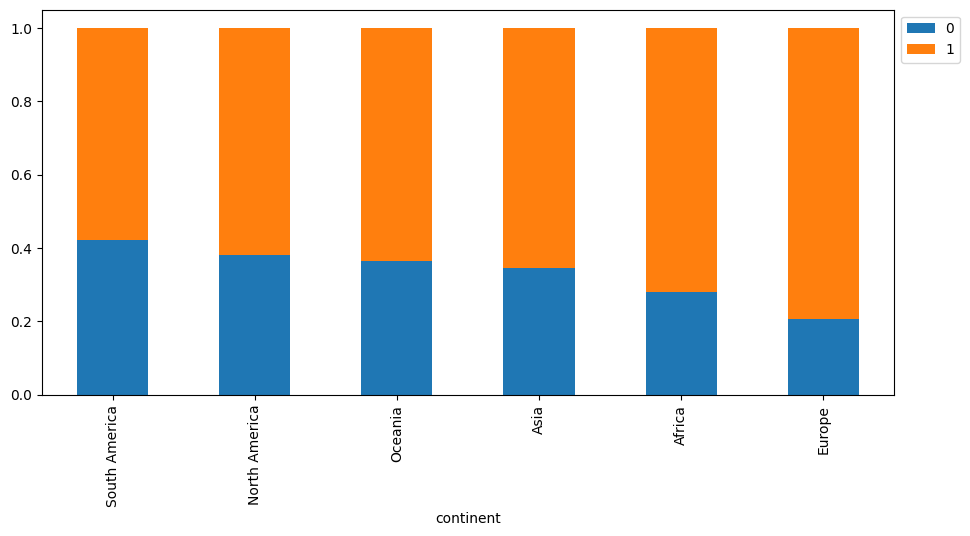

In [ ]:
# create graph for continent vs case status
stacked_barplot(data, "continent", "case_status")

Nothing changed.

Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

case_status            0      1    All
has_job_experience                    
All                 8462  17018  25480
N                   4684   5994  10678
Y                   3778  11024  14802
------------------------------------------------------------------------------------------------------------------------


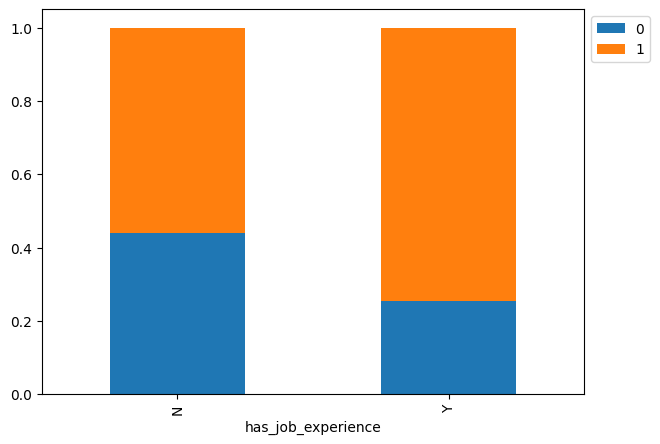

In [ ]:
# create graph for work experience vs case status
stacked_barplot(data, "has_job_experience", "case_status")

Nothing changed.

In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?


case_status      0      1    All
unit_of_wage                    
All           8462  17018  25480
Year          6915  16047  22962
Hour          1410    747   2157
Week           103    169    272
Month           34     55     89
------------------------------------------------------------------------------------------------------------------------


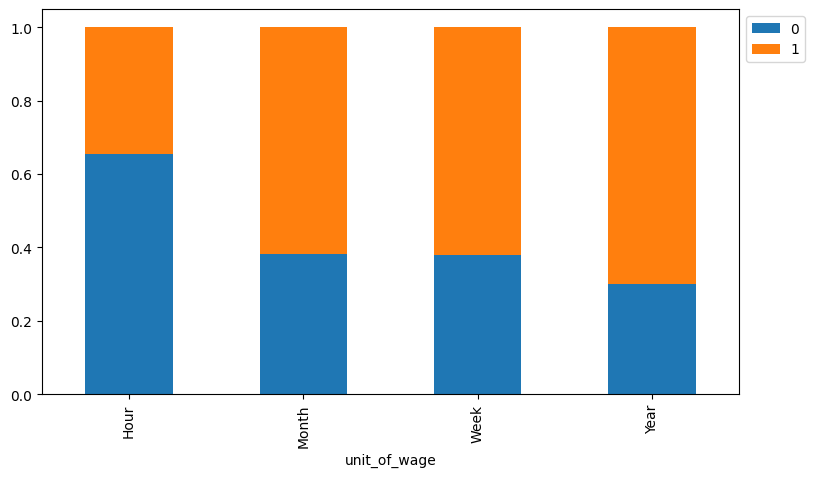

In [ ]:
# create graph for unit of wage vs case status
stacked_barplot(data, "unit_of_wage", "case_status")

Nothing changed.

The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

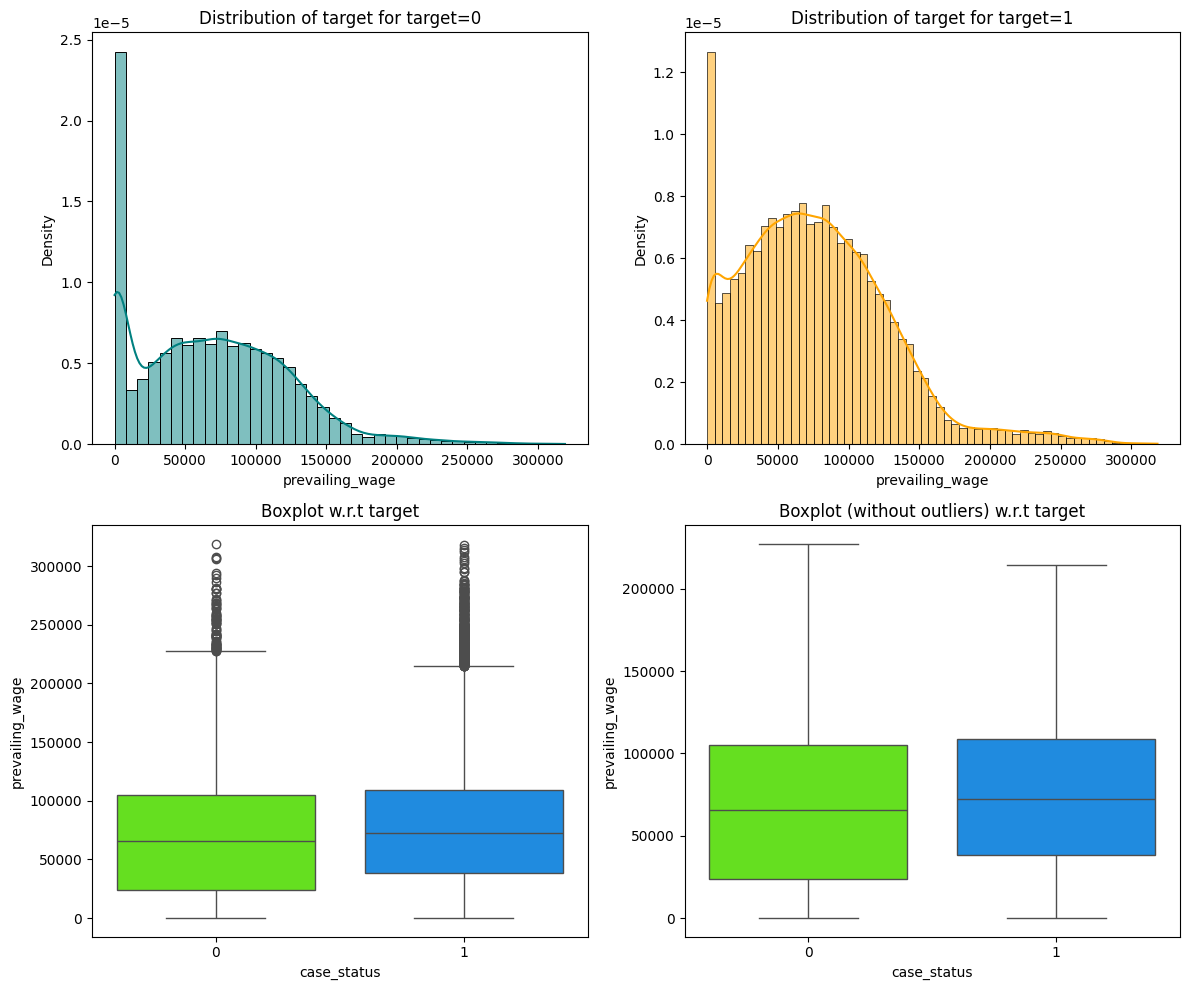

In [ ]:
# create graph for prevailing wage vs case status
distribution_plot_wrt_target(data, "prevailing_wage", "case_status")

Nothing changed (graphs appear opposite of original graph).

## Data Preparation for model building

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   continent              25480 non-null  category
 1   education_of_employee  25480 non-null  category
 2   has_job_experience     25480 non-null  category
 3   requires_job_training  25480 non-null  category
 4   no_of_employees        25480 non-null  int64   
 5   yr_of_estab            25480 non-null  int64   
 6   region_of_employment   25480 non-null  category
 7   prevailing_wage        25480 non-null  float64 
 8   unit_of_wage           25480 non-null  category
 9   full_time_position     25480 non-null  category
 10  case_status            25480 non-null  int64   
dtypes: category(7), float64(1), int64(3)
memory usage: 971.7 KB


In [ ]:
#make x and y variables
X = data.drop(['case_status'], axis=1)
Y = data['case_status']

In [ ]:
#get dummy variables
X = pd.get_dummies(data, columns=["continent", "education_of_employee", "has_job_experience", "requires_job_training", "region_of_employment", "unit_of_wage", "full_time_position"], drop_first=True, dtype=int)

In [ ]:
X = X.drop(['case_status'], axis=1)

In [ ]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1, stratify=Y)

In [ ]:
X.columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America', 'education_of_employee_Doctorate',
       'education_of_employee_High School', 'education_of_employee_Master's',
       'has_job_experience_Y', 'requires_job_training_Y',
       'region_of_employment_Midwest', 'region_of_employment_Northeast',
       'region_of_employment_South', 'region_of_employment_West',
       'unit_of_wage_Month', 'unit_of_wage_Week', 'unit_of_wage_Year',
       'full_time_position_Y'],
      dtype='object')

In [ ]:
#Checking to see how data was split
print('Shape of Training set:', X_train.shape)
print('Shape of test set:', X_test.shape)
print('Percentage of classes in training set:')
print(y_train.value_counts(normalize=True))
print('Percentage of classes in test set:')
print(y_test.value_counts(normalize=True))

Shape of Training set: (17836, 21)
Shape of test set: (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score - using F1 score bc both incorrectly predicting denied and incorrectly predicting certified are equally problematic errors

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):

    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model

In [ ]:
#build model
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

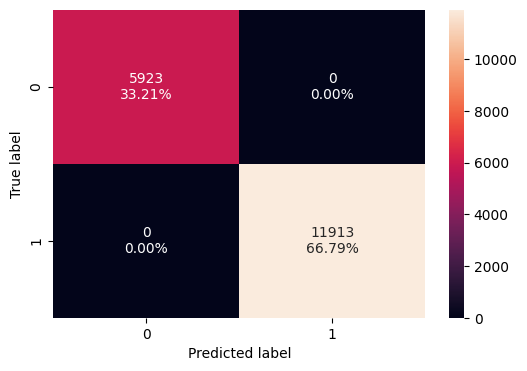

In [ ]:
#check training set perfomance w confusuion matrix before any pruning

confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
#check measure scores for training set
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

These scores are perfect, meaning there is a lot of overfitting occuring.

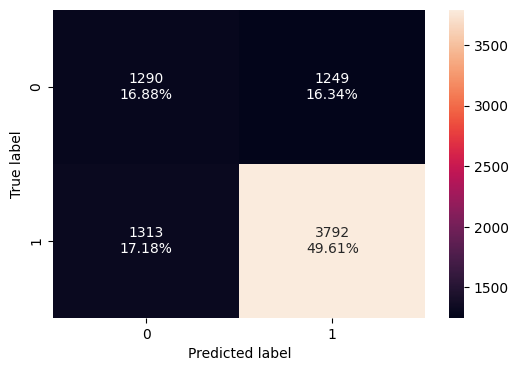

In [ ]:
#check model performance on test set
confusion_matrix_sklearn(model, X_test, y_test)

In [ ]:
#check measure scores for test set
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487

For training data, all the measures were perfect. For testing data, Accuracy is 0.66, Recall is 0.74, Precision is 0.75, and F1 is 0.75. These are not great scores. The meaasure we are mainly concearned with is F1, and 0.75 is not too bad, but the main issue is overfitting since there is such a major disparity bewtween the training and testing data scores. Not good model.

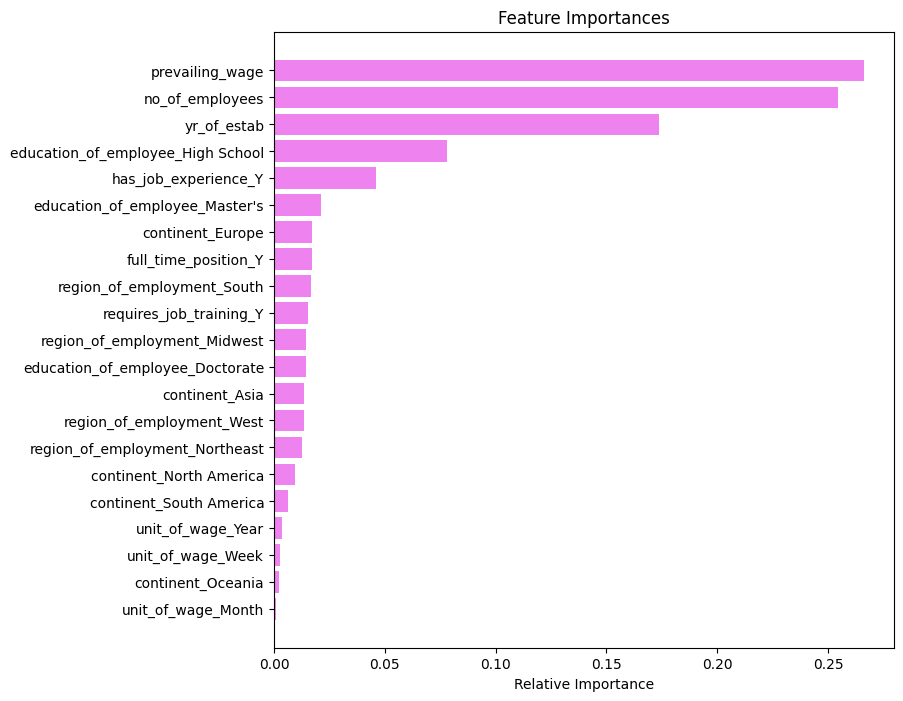

In [ ]:
#check important features

feature_names = list(X_train.columns)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

For this model, prevailing wage, num of employees, and year established are the most important vars.

### Hyperparameter tuning

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(10, 20, 5),
    "min_samples_leaf": [3, 5],
    "max_leaf_nodes": [2, 3, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}

# Type of scoring used to compare parameter combinations
f1_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=f1_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, max_leaf_nodes=2,
                       min_impurity_decrease=0.0001, min_samples_leaf=3,
                       random_state=1)

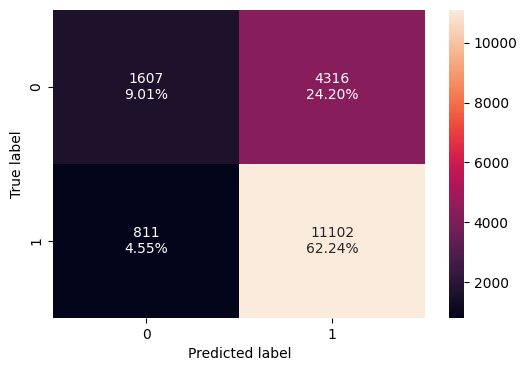

In [ ]:
#make confusion matrix for training data
confusion_matrix_sklearn(dtree_estimator, X_train, y_train)

In [ ]:
#check measure scores on test set

decision_tree_tune_perf_train = model_performance_classification_sklearn(dtree_estimator, X_train, y_train)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411

These scores are not too bad.

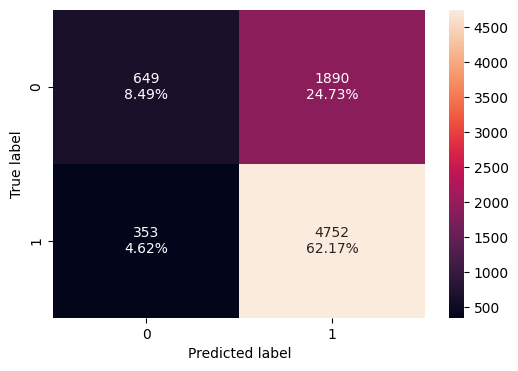

In [ ]:
#make confusion matrix on test set
confusion_matrix_sklearn(dtree_estimator, X_test, y_test)

In [ ]:
#check measure scores on test set

decision_tree_tune_perf_test = model_performance_classification_sklearn(dtree_estimator, X_test, y_test)
decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058

The test scores match the training scores very well. No overfitting!

This means the model is able to provide more generaalizeable results, so it can more accureately predict on unseen data.

## Building bagging and boosting models

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Bagging Model

In [ ]:
#make bagging classifier for train data
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

BaggingClassifier(random_state=1)

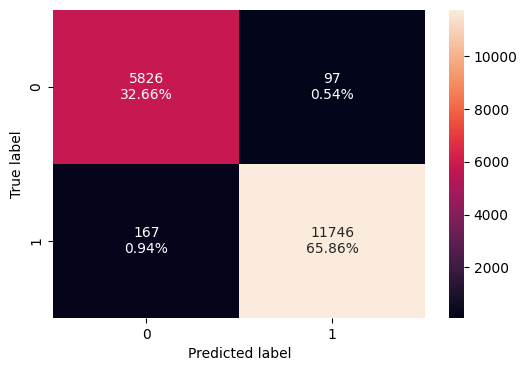

In [ ]:
#check model performance

#create confusion matrix for train data
confusion_matrix_sklearn(bagging_classifier, X_train, y_train)

In [ ]:
#check performance on train data
bagging_classifier_model_train_perf = model_performance_classification_sklearn(bagging_classifier, X_train, y_train)
bagging_classifier_model_train_perf

Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887

Very high training data scores. Could indicate overfitting.

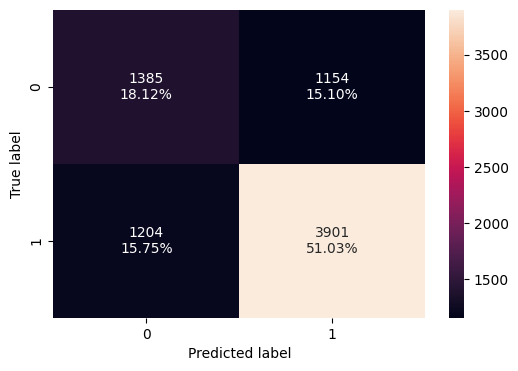

In [ ]:
#create confusion matrix for test data
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

In [ ]:
#check performance on test data
bagging_classifier_model_test_perf = model_performance_classification_sklearn(bagging_classifier, X_test, y_test)
bagging_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913

Much lower scores for test data. Definitely overfitting present.

### Hyperparameter tuning

In [ ]:
# Choose the type of classifier.
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_samples": [0.7, 0.8],
    "max_features": [0.5,0.7,1],
    "n_estimators": np.arange(50,110,25),
}

# Type of scoring used to compare parameter combinations
f1_scorer2 = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=f1_scorer2, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

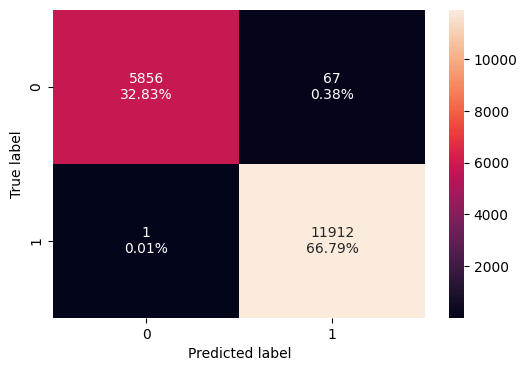

In [ ]:
#check performance

#create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_train, y_train)

In [ ]:
#check performance for train data on tuned estimator
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_train, y_train)
bagging_estimator_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0  0.996187  0.999916   0.994407  0.997154

Still quite high scores. Possible overfitting again.

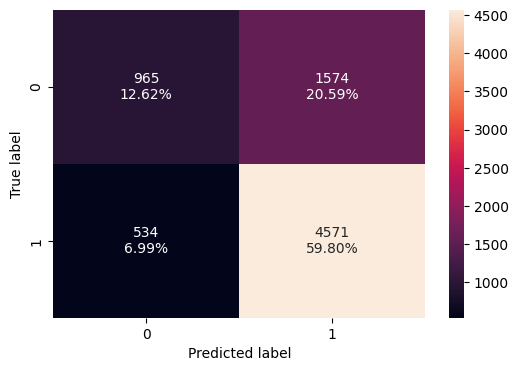

In [ ]:
#check test data performance

#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

In [ ]:
#check performance for test data on tuned estimator
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(bagging_estimator_tuned, X_test, y_test)
bagging_estimator_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.724228  0.895397   0.743857  0.812622

Definitely still overfitting present even after tuning model.

### Random Forrest

In [ ]:
#define random forest with class weight balanced
rf_estimator = RandomForestClassifier(random_state=1, class_weight="balanced")
#fit random forest on the train data
rf_estimator.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=1)

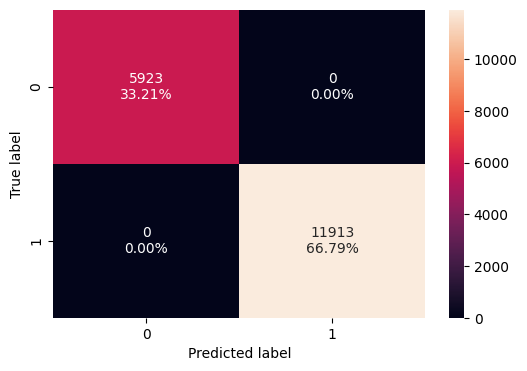

In [ ]:
#check model performance on train data

#create confusion matrix for train data
confusion_matrix_sklearn(rf_estimator, X_train, y_train)

In [ ]:
#check performance on train data
rf_estimator_model_train_perf = model_performance_classification_sklearn(rf_estimator, X_train, y_train)
rf_estimator_model_train_perf

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

This model has perfect scores for training data. Stong indication of overfitting.

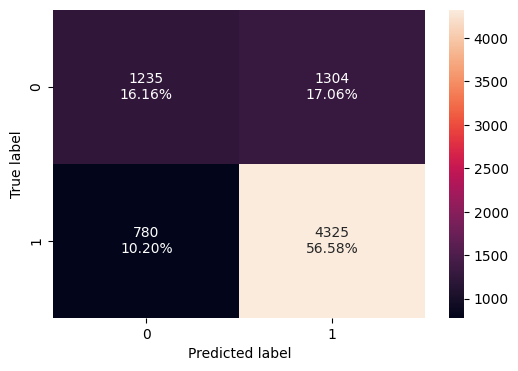

In [ ]:
#check model performance on test data

#create confusion matrix for test data
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

In [ ]:
#check performance for test data
rf_estimator_model_test_perf = model_performance_classification_sklearn(rf_estimator, X_test, y_test)
rf_estimator_model_test_perf

Accuracy    Recall  Precision        F1
0  0.727368  0.847209   0.768343  0.805851

These are okay scores, but because training data is so high, there is a lot of overfitting ocurring here, whihc means it is not a good model.

### hyperparameter tunng for random forrest

In [ ]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(random_state=1, oob_score=True, bootstrap=True)

parameters = {
    "max_depth": list(np.arange(5, 15, 5)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [3, 5, 7],
    "n_estimators": np.arange(10, 40, 10),
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=acc_scorer, cv=5, n_jobs = -1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=7, n_estimators=20,
                       oob_score=True, random_state=1)

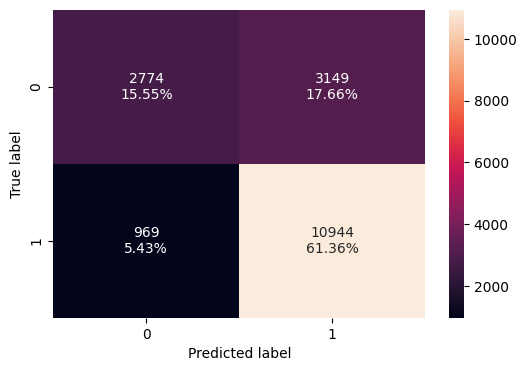

In [ ]:
#check model performance after hypertuning

#create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_train, y_train)

In [ ]:
#check performance for train data on tuned estimator
rf_tuned_model_train_perf = model_performance_classification_sklearn(rf_tuned, X_train, y_train)
rf_tuned_model_train_perf

Accuracy   Recall  Precision        F1
0  0.769119  0.91866   0.776556  0.841652

These scores are lower than before, but this could be a good sign that overfitting is gone.

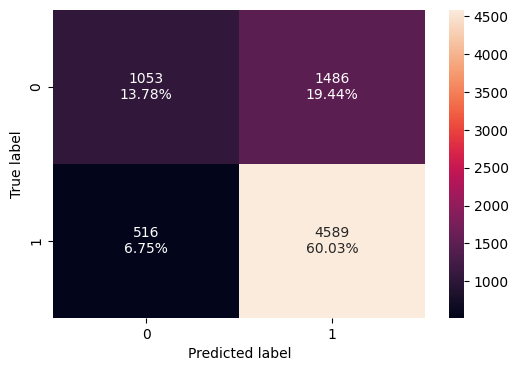

In [ ]:
#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

In [ ]:
#check performance for test data on tuned estimator
rf_tuned_model_test_perf = model_performance_classification_sklearn(rf_tuned, X_test, y_test)
rf_tuned_model_test_perf

Accuracy    Recall  Precision       F1
0  0.738095  0.898923   0.755391  0.82093

Overfitting is gone, and our f1 score is still relatively high! Good model.

### Boosting

#### Adaboost

In [ ]:
#define AdaBoost Classifier
ab_classifier = AdaBoostClassifier(random_state=1)
#fit
ab_classifier.fit(X_train, y_train)

AdaBoostClassifier(random_state=1)

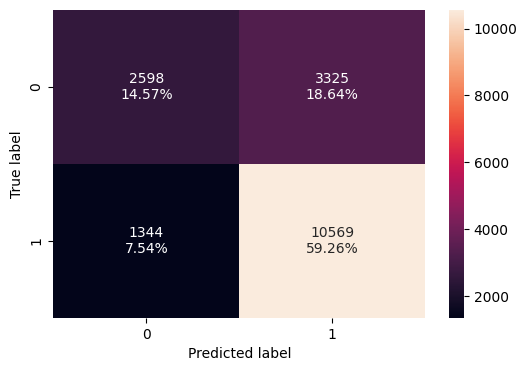

In [ ]:
#check performance

#create confusion matrix for train data
confusion_matrix_sklearn(ab_classifier, X_train, y_train)

In [ ]:
#check performance on train data
ab_classifier_model_train_perf = model_performance_classification_sklearn(ab_classifier, X_train, y_train)
ab_classifier_model_train_perf

Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908

Relatively good scores.

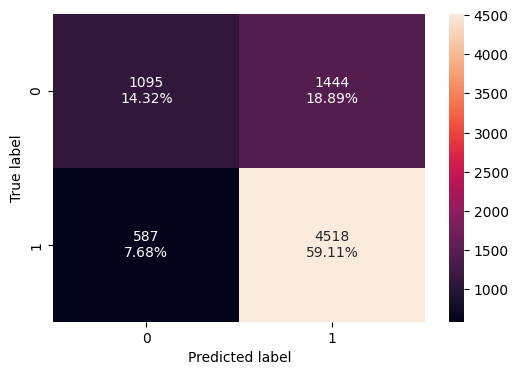

In [ ]:
#check performance on test set

#create confusion matrix for test data
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

In [ ]:
#check performance for test data
ab_classifier_model_test_perf = model_performance_classification_sklearn(ab_classifier, X_test, y_test)
ab_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481

The scores between train and test sets are very similar. This is a very good sign for generalizability of model.

#### Hyperparameter tuning adaboost model

In [ ]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": np.arange(0.01,0.1,0.05),
}

# Type of scoring used to compare parameter  combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=3,
                                                         random_state=1),
                   learning_rate=0.060000000000000005, n_estimators=100,
                   random_state=1)

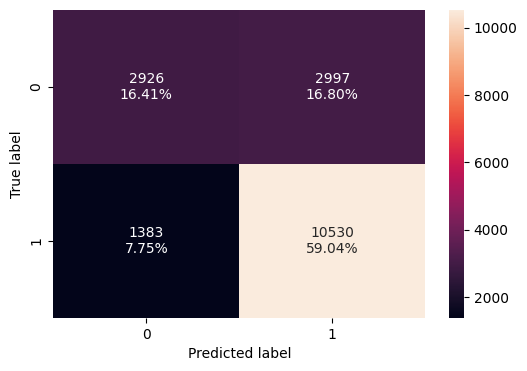

In [ ]:
#check performance on train set

#create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_train, y_train)

In [ ]:
#check performance for train data on tuned estimator
abc_tuned_model_train_perf = model_performance_classification_sklearn(abc_tuned, X_train, y_train)
abc_tuned_model_train_perf

Accuracy    Recall  Precision       F1
0  0.754429  0.883908   0.778443  0.82783

Scores similar to what we saw before hyperparameter tuning.

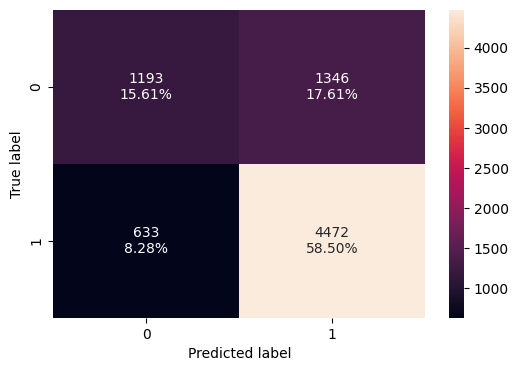

In [ ]:
#check perfomance on test set

#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

In [ ]:
#check performance for test data on tuned estimator
abc_tuned_model_test_perf = model_performance_classification_sklearn(abc_tuned, X_test, y_test)
abc_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.741104  0.876004   0.768649  0.818823

Scores still match train set very well; however, they were evn closer before tuning.

#### Gradient Boosting Classifier

In [ ]:
#define Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=1)
#fit
gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(random_state=1)

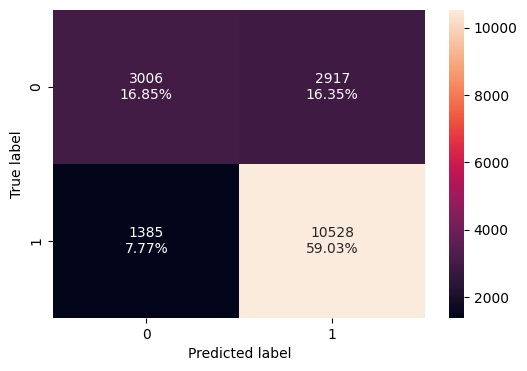

In [ ]:
#check performance on train set

#create confusion matrix for train data
confusion_matrix_sklearn(gb_classifier, X_train, y_train)

In [ ]:
#check performance on train data
gb_classifier_model_train_perf = model_performance_classification_sklearn(gb_classifier, X_train, y_train)
gb_classifier_model_train_perf

Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349

Good scores.

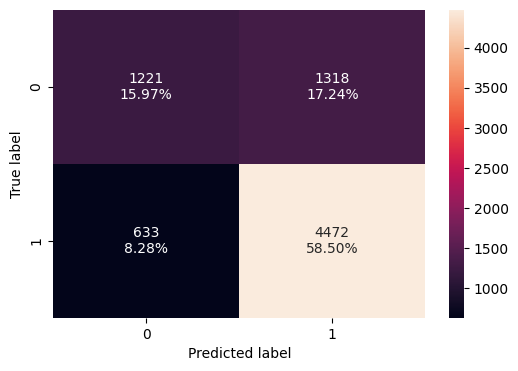

In [ ]:
#check performance on test set

#create confusion matrix for test data
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

In [ ]:
#check performance for test data
gb_classifier_model_test_perf = model_performance_classification_sklearn(gb_classifier, X_test, y_test)
gb_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927

Not our best model because scores are okay, but the training and testing sets are not close enough in their scores, which means not much generalizability with this model (before hyperparameter tuning at least).

#### Hyperparameter tuning Gradient Boost

In [ ]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "subsample": [0.7,0.9],
    "max_features": [0.7, 0.8, 0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=acc_scorer, cv=5)
#fit
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=50, random_state=1,
                           subsample=0.9)

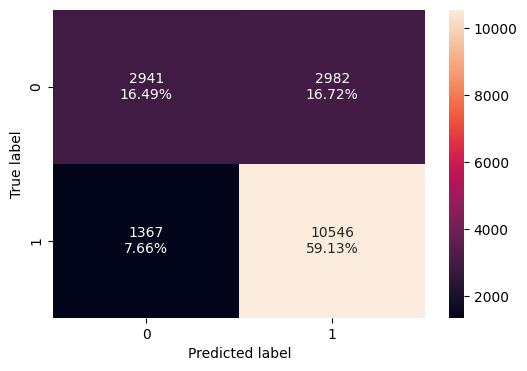

In [ ]:
#check tuned model training set perfomance

#create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(gbc_tuned, X_train, y_train)

In [ ]:
#check performance for train data on tuned estimator
gbc_tuned_model_train_perf = model_performance_classification_sklearn(gbc_tuned, X_train, y_train)
gbc_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0  0.756167  0.885251   0.779568  0.829055

Good scores.

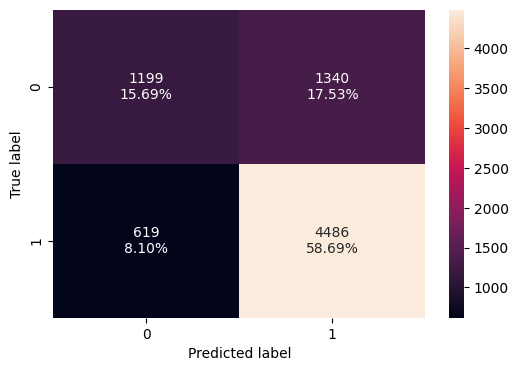

In [ ]:
#check tuned model perfomance on test set

#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

In [ ]:
#check performance for test data on tuned estimator
gbc_tuned_model_test_perf = model_performance_classification_sklearn(gbc_tuned, X_test, y_test)
gbc_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.743721  0.878746   0.769997  0.820785

These scores match the training set scores very well. Good model!

#### XGBoost

In [ ]:
#define XGBoost Classifier
xgb_classifier = XGBClassifier(random_state=1, eval_metric="logloss")
#fit
xgb_classifier.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

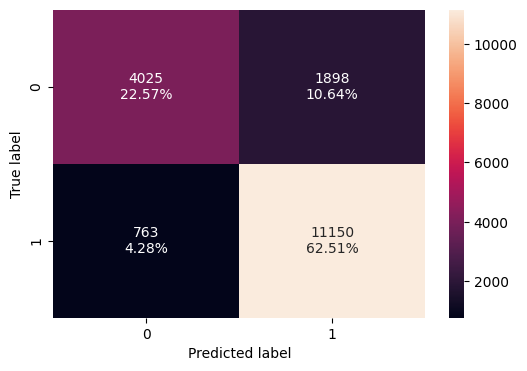

In [ ]:
#check model perfomance on train set

#create confusion matrix for train data
confusion_matrix_sklearn(xgb_classifier, X_train, y_train)

In [ ]:
#check performance on train data
xgb_classifier_model_train_perf = model_performance_classification_sklearn(xgb_classifier, X_train, y_train)
xgb_classifier_model_train_perf

Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394

These scores are very high. If test data can macth, this would be a very good model.

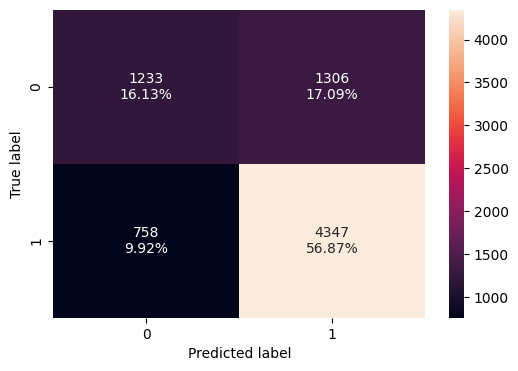

In [ ]:
#check perfomance on test data

#create confusion matrix for test data
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

In [ ]:
#check performance for test data
xgb_classifier_model_test_perf = model_performance_classification_sklearn(xgb_classifier, X_test, y_test)
xgb_classifier_model_test_perf

Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143

The test data does not match the train data scores very well.

#### Hyperparameter tuning XGBoost model

In [ ]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(50,110,25),
    "scale_pos_weight": [1,2,5],
    "subsample": [0.9, 1],
    "learning_rate": [0.01,0.1,0.05],
    "gamma": [1,3]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=acc_scorer, cv=5)
#fit
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

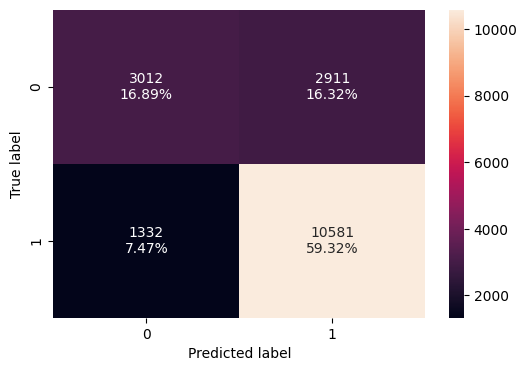

In [ ]:
#check tuned model performance on train data

#create confusion matrix for train data on tuned estimator
confusion_matrix_sklearn(xgb_tuned, X_train, y_train)

In [ ]:
#check performance for train data on tuned estimator
xgb_tuned_model_train_perf = model_performance_classification_sklearn(xgb_tuned, X_train, y_train)
xgb_tuned_model_train_perf

Accuracy    Recall  Precision        F1
0   0.76211  0.888189   0.784243  0.832986

Tuning made training data scores lower; could indicate no more overfitting.

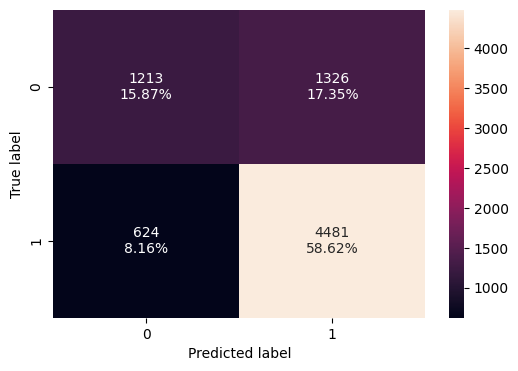

In [ ]:
#check tuned model perfomance on test data

#create confusion matrix for test data on tuned estimator
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

In [ ]:
#check performance for test data on tuned estimator
xgb_tuned_model_test_perf = model_performance_classification_sklearn(xgb_tuned, X_test, y_test)
xgb_tuned_model_test_perf

Accuracy    Recall  Precision        F1
0  0.744898  0.877767   0.771655  0.821298

Train and test scores do match better now. Hyperparameter tuning got rid of overfitting.

#### Stacking Classifier

In [ ]:
estimators = [
    ("AdaBoost", ab_classifier),
    ("Gradient Boosting", gbc_tuned),
    ("Random Forest", rf_tuned),
]

final_estimator = xgb_tuned

#define Stacking Classifier
stacking_classifier = StackingClassifier(estimators=estimators, final_estimator=final_estimator, cv=5)

#fit
stacking_classifier.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('Random Forest',
                                RandomForestClassifier(max_depth=10,
                                                       min_samples_split=7,
                                                       n_estimators=20,
                                                       oob_score=True,
                                                       random_state...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

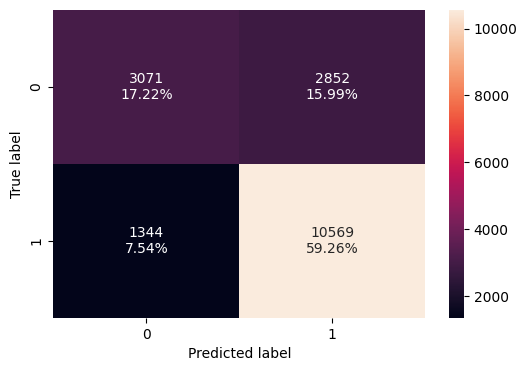

In [ ]:
#check model performance on train set

#create confusion matrix for train data
confusion_matrix_sklearn(stacking_classifier, X_train, y_train)

In [ ]:
#check performance on train data
stacking_classifier_model_train_perf = model_performance_classification_sklearn(stacking_classifier, X_train, y_train)
stacking_classifier_model_train_perf

Accuracy    Recall  Precision        F1
0  0.764745  0.887182   0.787497  0.834373

Good scores.

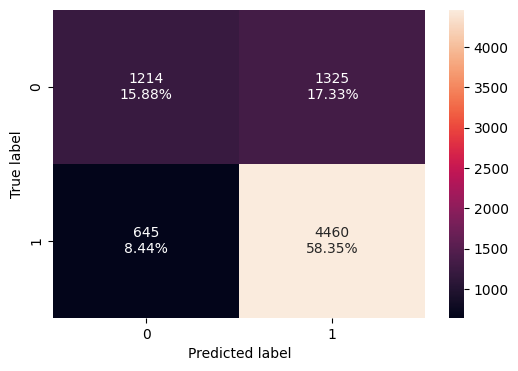

In [ ]:
#check perfomance on test set

#create confusion matrix for test data
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

In [ ]:
#check performance for test data
stacking_classifier_model_test_perf = model_performance_classification_sklearn(stacking_classifier, X_test, y_test)
stacking_classifier_model_test_perf

Accuracy    Recall  Precision      F1
0  0.742282  0.873653   0.770959  0.8191

Pretty similar scores between train and test set. Pretty good model.

## Model Performance Comparison and Conclusions

In [ ]:
#training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        dtree_estimator_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree  Tuned Decision Tree  Bagging Classifier  \
Accuracy             1.0             0.769119            0.985198   
Recall               1.0             0.918660            0.985982   
Precision            1.0             0.776556            0.991810   
F1                   1.0             0.841652            0.988887   

           Tuned Bagging Classifier  Random Forest  Tuned Random Forest  \
Accuracy                   0.996187            1.0             0.769119   
Recall                     0.999916            1.0             0.918660   
Precision                  0.994407            1.0             0.776556   
F1                         0.997154            1.0             0.841652   

           Adaboost Classifier  Tuned Adaboost Classifier  \
Accuracy              0.738226                   0.754429   
Recall                0.887182                   0.883908   
Precision             0.760688                   0.778443   
F1                    0.819080                   0.827830   

           Gradient Boost Classifier  Tuned Gradient Boost Classifier  \
Accuracy                    0.758802                         0.756167   
Recall                      0.883740                         0.885251   
Precision                   0.783042                         0.779568   
F1                          0.830349                         0.829055   

           XGBoost Classifier  XGBoost Classifier Tuned  Stacking Classifier  
Accuracy             0.850807                  0.762110             0.764745  
Recall               0.935952                  0.888189             0.887182  
Precision            0.854537                  0.784243             0.787497  
F1                   0.893394                  0.832986             0.834373

In [ ]:
# testing performance comparison

#check performance for test data
models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        dtree_estimator_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Tuned Decision Tree",
    "Bagging Classifier",
    "Tuned Bagging Classifier",
    "Random Forest",
    "Tuned Random Forest",
    "Adaboost Classifier",
    "Tuned Adaboost Classifier",
    "Gradient Boost Classifier",
    "Tuned Gradient Boost Classifier",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


Decision Tree  Tuned Decision Tree  Bagging Classifier  \
Accuracy        0.664835             0.738095            0.691523   
Recall          0.742801             0.898923            0.764153   
Precision       0.752232             0.755391            0.771711   
F1              0.747487             0.820930            0.767913   

           Tuned Bagging Classifier  Random Forest  Tuned Random Forest  \
Accuracy                   0.724228       0.727368             0.738095   
Recall                     0.895397       0.847209             0.898923   
Precision                  0.743857       0.768343             0.755391   
F1                         0.812622       0.805851             0.820930   

           Adaboost Classifier  Tuned Adaboost Classifier  \
Accuracy              0.734301                   0.741104   
Recall                0.885015                   0.876004   
Precision             0.757799                   0.768649   
F1                    0.816481                   0.818823   

           Gradient Boost Classifier  Tuned Gradient Boost Classifier  \
Accuracy                    0.744767                         0.743721   
Recall                      0.876004                         0.878746   
Precision                   0.772366                         0.769997   
F1                          0.820927                         0.820785   

           XGBoost Classifier  XGBoost Classifier Tuned  Stacking Classifier  
Accuracy             0.729984                  0.744898             0.742282  
Recall               0.851518                  0.877767             0.873653  
Precision            0.768972                  0.771655             0.770959  
F1                   0.808143                  0.821298             0.819100

There are many good models here, but I think the best for our purposes is the XGBoost Classifier Tuned model because we are most concerned with the f1 score, and for this model, it produces a relatively high f1 score with both training and testing data. And, for all the scores, it has very similar scores between the teat and train set, meaning it has good generalizability to predicting outside data.

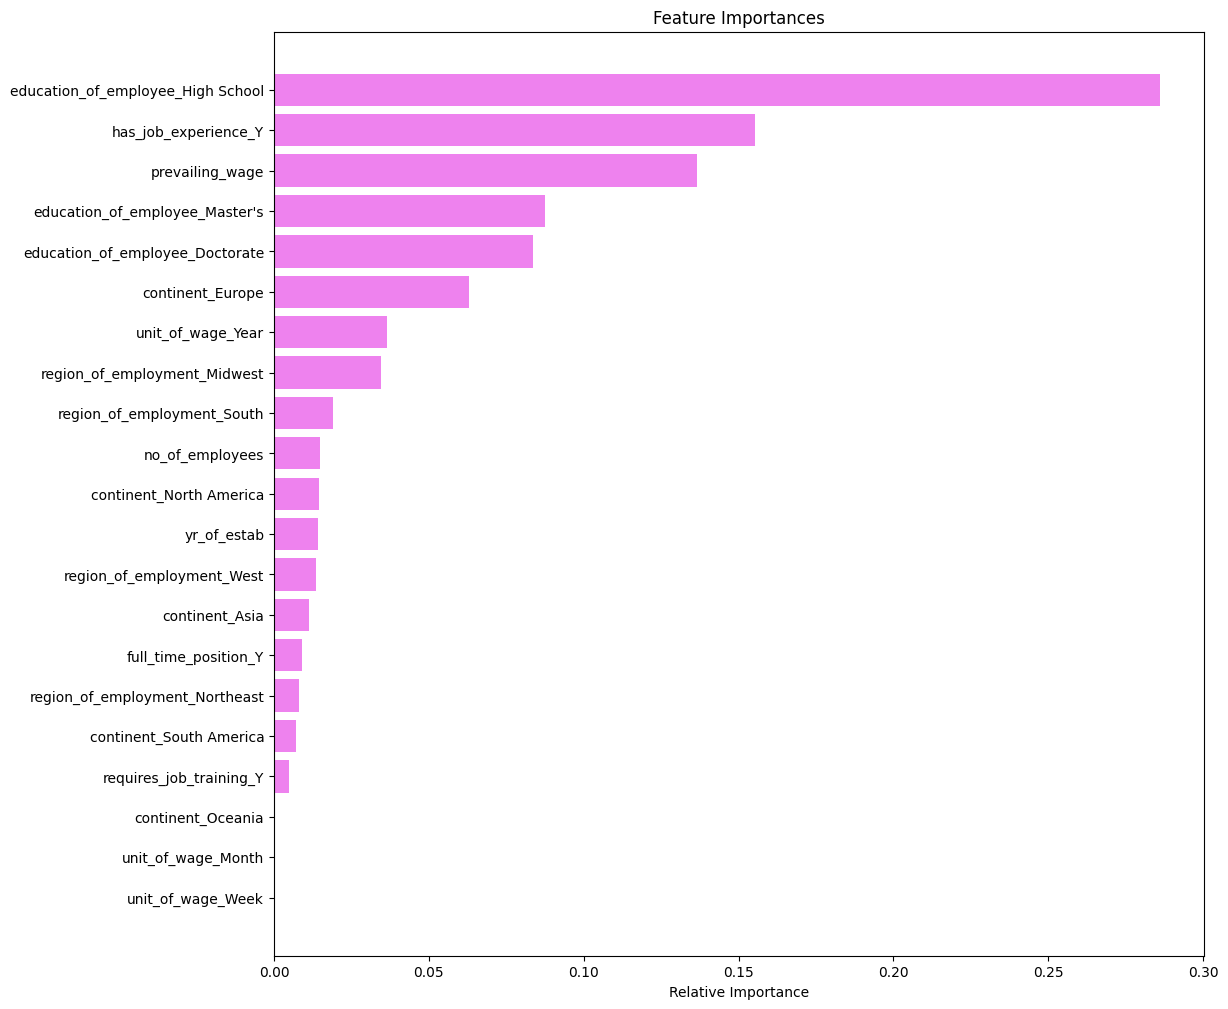

In [ ]:
#check important features
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

The most important features are whether or not the extent to their education was highschool, whether or not the employee has previous job experience, and the prevailing age of the position the employee is hoping to get.

## Actionable Insights and Recommendations

- I would suggest using the OFLC uses the XGBoost Classifier Tuned model because we are most concerned with the f1 score, and for this model, it produces a relatively high f1 score with both training and testing data. And, for all the scores, it has very similar scores between the teat and train set, meaning it has good generalizability to predicting outside data.
- I would also suggest that they pay attention to whether or not the employee has more than a high school degree, because it looks like that is a very important variable, and from the exploratory data analysis, we know that the less education a person has, the less likely they are to be certified. This means that if a person does not have more than a highschool degree this is the most certain predicting factor that indicated a person will be denied.
- If a person does not have job experience, they are very likley to be denied as well, so prioritize employees who do have previous experience.
- The higher the prevailing wage for the position the employee is hoping to occupy, the more likely they are to be certified, and because this is an important factor, I would advise against spending a lot of time assessing people applying for positions with a low prevailing wage. I do not think this is a direct causal relationship. Rather, I believe lower paying jobs do not necessarily require out-of-county expertise, so they are unlikekly to be approved.

In [ ]:
!jupyter nbconvert PROJECT5_fullcode2.ipynb --to html

[NbConvertApp] Converting notebook PROJECT5_fullcode2.ipynb to html
[NbConvertApp] Writing 6256569 bytes to PROJECT5_fullcode2.html
